In [ ]:
# %%

from collections import defaultdict
import os

os.environ["CUDA_VISIBLE_DEVICES"] = "1"

In [ ]:
# %%

import lightgbm as lgb
import polars as pl
from pathlib import Path
import pandas as pd
import numpy as np
import sklearn.linear_model
from sklearn.metrics import r2_score
import dataloader
import norm
import config
import torch
import tqdm
from eval import EvalLoader 

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# %%

cfg_loader = config.LoaderConfig()
cfg_data = config.get_data_config(cfg_loader)

In [ ]:
#%%

norm_x, norm_y = norm.get_stats(cfg_loader, cfg_data)

Using tanh
Zero mask: 75 of 368


In [ ]:
# %%

input_test = list(Path("model_preds/").glob("*test.pt"))
input_val = [
    fname.with_name(fname.name.replace("test.pt", "valid.pt")) for fname in input_test
]

In [ ]:
# %%

for fname in input_test:
    assert fname.exists()

In [ ]:
#%%

all_test = []
for fname in input_test:
    all_test.append(torch.load(fname)["reg"])

In [ ]:
# %%

all_val = []
for fname in input_val:
    all_val.append(torch.load(fname)["reg"])

In [ ]:
#%%

def get_dataset(dl):
    outputs = defaultdict(list)
    for batch in dl:
        for key, value in batch.items():
            outputs[key].append(value.numpy())
    outputs = {k: np.concatenate(v) for k, v in outputs.items()}
    return outputs

In [ ]:
# %%

_, val_dl = dataloader.setup_dataloaders(cfg_loader, cfg_data)

Using tanh
Zero mask: 75 of 368
Useing old dataloader!
x_p: torch.Size([256, 16])
x_p std: 0.5126318335533142
x_p max: 0.9807450771331787
x_p min: -0.9488726854324341
x_1d: torch.Size([256, 540])
x_1d std: 0.4539046585559845
x_1d max: 1.0
x_1d min: -1.0
x_1d_re: torch.Size([256, 60, 9])
x_1d_re std: 0.9851637482643127
x_1d_re max: 23.720691680908203
x_1d_re min: -6.049958229064941
y: torch.Size([256, 368])
y std: 0.8676786422729492
y max: 44.75080871582031
y min: -39.70399856567383


In [ ]:
# %%

test_df = pl.read_csv("/mnt/ssd/kaggle/new_data/test.csv")
test_df

sample_id,state_t_0,state_t_1,state_t_2,state_t_3,state_t_4,state_t_5,state_t_6,state_t_7,state_t_8,state_t_9,state_t_10,state_t_11,state_t_12,state_t_13,state_t_14,state_t_15,state_t_16,state_t_17,state_t_18,state_t_19,state_t_20,state_t_21,state_t_22,state_t_23,state_t_24,state_t_25,state_t_26,state_t_27,state_t_28,state_t_29,state_t_30,state_t_31,state_t_32,state_t_33,state_t_34,state_t_35,state_t_36,state_t_37,state_t_38,state_t_39,state_t_40,state_t_41,state_t_42,state_t_43,state_t_44,state_t_45,state_t_46,state_t_47,state_t_48,state_t_49,state_t_50,state_t_51,state_t_52,state_t_53,state_t_54,state_t_55,state_t_56,state_t_57,state_t_58,state_t_59,state_q0001_0,state_q0001_1,state_q0001_2,state_q0001_3,state_q0001_4,state_q0001_5,state_q0001_6,state_q0001_7,state_q0001_8,state_q0001_9,state_q0001_10,state_q0001_11,state_q0001_12,state_q0001_13,state_q0001_14,state_q0001_15,state_q0001_16,state_q0001_17,state_q0001_18,state_q0001_19,state_q0001_20,state_q0001_21,state_q0001_22,state_q0001_23,state_q0001_24,state_q0001_25,state_q0001_26,state_q0001_27,state_q0001_28,state_q0001_29,state_q0001_30,state_q0001_31,state_q0001_32,state_q0001_33,state_q0001_34,state_q0001_35,state_q0001_36,state_q0001_37,state_q0001_38,state_q0001_39,state_q0001_40,state_q0001_41,state_q0001_42,state_q0001_43,state_q0001_44,state_q0001_45,state_q0001_46,state_q0001_47,state_q0001_48,state_q0001_49,state_q0001_50,state_q0001_51,state_q0001_52,state_q0001_53,state_q0001_54,state_q0001_55,state_q0001_56,state_q0001_57,state_q0001_58,state_q0001_59,state_q0002_0,state_q0002_1,state_q0002_2,state_q0002_3,state_q0002_4,state_q0002_5,state_q0002_6,state_q0002_7,state_q0002_8,state_q0002_9,state_q0002_10,state_q0002_11,state_q0002_12,state_q0002_13,state_q0002_14,state_q0002_15,state_q0002_16,state_q0002_17,state_q0002_18,state_q0002_19,state_q0002_20,state_q0002_21,state_q0002_22,state_q0002_23,state_q0002_24,state_q0002_25,state_q0002_26,state_q0002_27,state_q0002_28,state_q0002_29,state_q0002_30,state_q0002_31,state_q0002_32,state_q0002_33,state_q0002_34,state_q0002_35,state_q0002_36,state_q0002_37,state_q0002_38,state_q0002_39,state_q0002_40,state_q0002_41,state_q0002_42,state_q0002_43,state_q0002_44,state_q0002_45,state_q0002_46,state_q0002_47,state_q0002_48,state_q0002_49,state_q0002_50,state_q0002_51,state_q0002_52,state_q0002_53,state_q0002_54,state_q0002_55,state_q0002_56,state_q0002_57,state_q0002_58,state_q0002_59,state_q0003_0,state_q0003_1,state_q0003_2,state_q0003_3,state_q0003_4,state_q0003_5,state_q0003_6,state_q0003_7,state_q0003_8,state_q0003_9,state_q0003_10,state_q0003_11,state_q0003_12,state_q0003_13,state_q0003_14,state_q0003_15,state_q0003_16,state_q0003_17,state_q0003_18,state_q0003_19,state_q0003_20,state_q0003_21,state_q0003_22,state_q0003_23,state_q0003_24,state_q0003_25,state_q0003_26,state_q0003_27,state_q0003_28,state_q0003_29,state_q0003_30,state_q0003_31,state_q0003_32,state_q0003_33,state_q0003_34,state_q0003_35,state_q0003_36,state_q0003_37,state_q0003_38,state_q0003_39,state_q0003_40,state_q0003_41,state_q0003_42,state_q0003_43,state_q0003_44,state_q0003_45,state_q0003_46,state_q0003_47,state_q0003_48,state_q0003_49,state_q0003_50,state_q0003_51,state_q0003_52,state_q0003_53,state_q0003_54,state_q0003_55,state_q0003_56,state_q0003_57,state_q0003_58,state_q0003_59,state_u_0,state_u_1,state_u_2,state_u_3,state_u_4,state_u_5,state_u_6,state_u_7,state_u_8,state_u_9,state_u_10,state_u_11,state_u_12,state_u_13,state_u_14,state_u_15,state_u_16,state_u_17,state_u_18,state_u_19,state_u_20,state_u_21,state_u_22,state_u_23,state_u_24,state_u_25,state_u_26,state_u_27,state_u_28,state_u_29,state_u_30,state_u_31,state_u_32,state_u_33,state_u_34,state_u_35,state_u_36,state_u_37,state_u_38,state_u_39,state_u_40,state_u_41,state_u_42,state_u_43,state_u_44,state_u_45,state_u_46,state_u_47,state_u_48,state_u_49,state_u_50,state_u_51,state_u_52,state_u_53,state_u_54,state_u_55,state_u_56,state_u_57,state_u_58,state_u_59,state_v_0,state_v_1,

In [ ]:
# %%

test_data = test_df[:, 1 :].to_numpy()
test_data.shape

(625000, 556)

In [ ]:
# %%

test_ds = EvalLoader({"x": test_data}, {"x": norm_x})

test_loader = torch.utils.data.DataLoader(
    test_ds,
    batch_size=384,
    drop_last=False,
    shuffle=False,
    num_workers=0,
    pin_memory=False,
)

In [ ]:
#%%

val_data_dict = get_dataset(val_dl)

In [ ]:
#%%

val_data_dict.keys(), {k: v.shape for k, v in val_data_dict.items()}

(dict_keys(['x_p', 'x_1d', 'x_1d_re', 'y']),
 {'x_p': (834048, 16),
  'x_1d': (834048, 540),
  'x_1d_re': (834048, 60, 9),
  'y': (834048, 368)})

In [ ]:
#%%

test_data_dict = get_dataset(test_loader)

In [ ]:
#%%

test_data_dict.keys(), {k: v.shape for k, v in test_data_dict.items()}

(dict_keys(['x_p', 'x_1d', 'x_1d_re']),
 {'x_p': (625000, 16), 'x_1d': (625000, 540), 'x_1d_re': (625000, 60, 9)})

In [ ]:
#%%

x_val_cat = np.concatenate([val_data_dict["x_1d"][0:360], val_data_dict["x_p"]], axis=0)
x_test_cat = np.concatenate([test_data_dict["x_1d"][0:360], test_data_dict["x_p"]], axis=0)

pca = PCA(n_components=n_components)

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 540 and the array at index 1 has size 16

In [ ]:
#%%

x_val_cat = np.concatenate([val_data_dict["x_1d"][0:360], val_data_dict["x_p"]], axis=1)
x_test_cat = np.concatenate([test_data_dict["x_1d"][0:360], test_data_dict["x_p"]], axis=1)

pca = PCA(n_components=n_components)

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 360 and the array at index 1 has size 834048

In [ ]:
#%%

x_val_cat = np.concatenate([val_data_dict["x_1d"][:, 0:360], val_data_dict["x_p"]], axis=1)

In [ ]:
#%%

x_test_cat = np.concatenate([test_data_dict["x_1d"][:, 0:360], test_data_dict["x_p"]], axis=1)

pca = PCA(n_components=n_components)

NameError: name 'PCA' is not defined

In [ ]:
#%%

from sklearn.decomposition import PCA

In [ ]:
#%%

x_test_cat = np.concatenate([test_data_dict["x_1d"][:, 0:360], test_data_dict["x_p"]], axis=1)

pca = PCA(n_components=n_components)

NameError: name 'n_components' is not defined

In [ ]:
#%%

n_components = 20

In [ ]:
#%%

pca = PCA(n_components=n_components)
pca.fit(x_val_cat)

PCA(n_components=20)

In [ ]:
#%%

pca.explained_variance_ratio_.cumsum()

array([0.44345626, 0.55826136, 0.64297362, 0.71372533, 0.75923684,
       0.79266138, 0.82260631, 0.84605572, 0.86105257, 0.87560705,
       0.88766278, 0.89717377, 0.90609104, 0.91414708, 0.92189927,
       0.92834231, 0.93343105, 0.93827259, 0.94266394, 0.94679095])

In [ ]:
#%%

x_val_pca = pca.transform(x_val_cat)
x_test_pca = pca.transform(x_test_cat)

In [ ]:
# %%

def run_xgb(i):
    y_val = val_data[x_val_mask, i] - all_val_av[x_val_mask, i]
    y_train = val_data[x_train_mask, i] - all_val_av[x_train_mask, i]

    x_val = np.stack(
        [a[x_val_mask, i] for a in all_val]
        + [x_val_cat[x_val_mask, i : i + 1]]
        + [x_val_pca[x_val_mask, :]],
        axis=1,
    )
    x_train = np.stack(
        [a[x_train_mask, i] for a in all_val]
        + [x_val_cat[x_train_mask, i : i + 1]]
        + [x_val_pca[x_train_mask, :]],
        axis=1,
    )

    x_test = np.stack(
        [a[:, i] for a in all_test] + [x_test_cat[:, i : i + 1]] + [x_test_pca], axis=1
    )

    # model = sklearn.linear_model.LinearRegression()
    # model.fit(x_train_cat, y_xgb)

    model = lgb.LGBMRegressor(**lgbm_params)

    model.fit(
        x_train,
        y_train,
        eval_set=[(x_val, y_val)],
        eval_metric="mean_squared_error",
        callbacks=[lgb.log_evaluation(10), lgb.early_stopping(10)],
    )
    preds_gbm = model.predict(x_test)

    mse_gb = ((y_val - model.predict(x_val)) ** 2).mean()
    mse_base = (y_val**2).mean()

    return {
        "model": model,
        "preds_gbm": preds_gbm,
        "mse_gb": mse_gb,
        "mse_base": mse_base,
    }

In [ ]:
# %%

preds_model = []
ratios = []

r2_base_lst = []
r2_gb_lst = []

for i, w in enumerate(norm_y.zero_mask):
    if w == False:
        out_dict = run_xgb(i)
        preds_gbm = out_dict["preds_gbm"]
        mse_gb = out_dict["mse_gb"]
        mse_base = out_dict["mse_base"]
    else:
        print(f"Skipping {i}")
        mse_base = 0  # r2_score(y_test[:, i], preds_test[:, i])
        mse_gb = 0
        preds_gbm = np.zeros(x_test.shape[0])

    r2_base_lst.append(mse_base)
    r2_gb_lst.append(mse_gb)
    # r2_ratio_lst.append(r2_ratio)
    preds_model.append(preds_gbm)
    print(f"Base: {mse_base:.5f}, GB: {mse_gb:.5f} diff: {mse_gb - mse_base:.5f} {i}")

NameError: name 'val_data' is not defined

In [ ]:
# %%

# Take average# %%
val_data_y = torch.load("val_data_y.pt")

In [ ]:
# %%

def r2_score(y_true, y_pred):
    return 1 - ((y_true - y_pred) ** 2).mean() / 0.886


# %
for fname, data in zip(input_val, all_val):
    print(fname)
    print(r2_score(val_data_y, data))

model_preds/daily-valley-425-step=140000-val_mse=0.189_valid.pt
0.7825373308922313
model_preds/valiant-hill-433-step=265056-val_mse=0.188_valid.pt
0.7852359379118237
model_preds/model-step=01080000_valid.pt


KeyboardInterrupt: 

In [ ]:
# %%

# test_df.write_parquet("/mnt/ssd/kaggle/new_data/test.parquet")

: 

In [ ]:
# %%

lgbm_params = {
    "boosting_type": "gbdt",
    "objective": "regression",
    "metric": ["l2"],
    "num_iterations": 100,
    # "reg_alpha": 0.1,
    # "reg_lambda": 3.25,
    "device": "gpu",
    "random_state": 42,
}

: 

In [ ]:
# %%

output_preds = []

: 

In [ ]:
# %%

import logging

: 

In [ ]:
# %%

# Take average# %%

In [ ]:
# %%

lgbm_params = {
    "boosting_type": "gbdt",
    "objective": "regression",
    "metric": ["l2"],
    "num_iterations": 100,
    # "reg_alpha": 0.1,
    # "reg_lambda": 3.25,
    "device": "gpu",
    "random_state": 42,
}

In [ ]:
# %%

output_preds = []

In [ ]:
# %%

import logging

In [ ]:
# %%

# logging.basicConfig(
#     level=logging.INFO,
# )
#

In [ ]:
# %%

# y_xgb = y[:, i] - preds[:, i]
# y_xgb_test = y_test[:, i] - preds_test[:, i]
# x_train_cat = np.concatenate([x, preds[:, i : i + 1]], axis=1)
# x_test_cat = np.concatenate([x_test, preds_test[:, i : i + 1]], axis=1)

val_data_y.shape
all_val[0].shape

(834048, 368)

In [ ]:
# %%

np.random.seed(42)
x_train_mask = np.random.sample(len(val_data_y)) < 0.8
x_val_mask = ~x_train_mask

In [ ]:
# %%

all_val_av = np.stack(all_val, axis=0).mean(axis=0)

In [ ]:
# %%

torch.save(x_train_mask, "x_train_mask.pt")

In [ ]:
# %%

r2_score(val_data_y, all_val_av)

0.7915150450529955

In [ ]:
# %%

def run_xgb(i):
    y_val = val_data_y[x_val_mask, i] - all_val_av[x_val_mask, i]
    y_train = val_data_y[x_train_mask, i] - all_val_av[x_train_mask, i]

    x_val = np.stack(
        [a[x_val_mask, i] for a in all_val]
        + [x_val_cat[x_val_mask, i : i + 1]]
        + [x_val_pca[x_val_mask, :]],
        axis=1,
    )
    x_train = np.stack(
        [a[x_train_mask, i] for a in all_val]
        + [x_val_cat[x_train_mask, i : i + 1]]
        + [x_val_pca[x_train_mask, :]],
        axis=1,
    )

    x_test = np.stack(
        [a[:, i] for a in all_test] + [x_test_cat[:, i : i + 1]] + [x_test_pca], axis=1
    )

    # model = sklearn.linear_model.LinearRegression()
    # model.fit(x_train_cat, y_xgb)

    model = lgb.LGBMRegressor(**lgbm_params)

    model.fit(
        x_train,
        y_train,
        eval_set=[(x_val, y_val)],
        eval_metric="mean_squared_error",
        callbacks=[lgb.log_evaluation(10), lgb.early_stopping(10)],
    )
    preds_gbm = model.predict(x_test)

    mse_gb = ((y_val - model.predict(x_val)) ** 2).mean()
    mse_base = (y_val**2).mean()

    return {
        "model": model,
        "preds_gbm": preds_gbm,
        "mse_gb": mse_gb,
        "mse_base": mse_base,
    }

In [ ]:
# %%

preds_model = []
ratios = []

r2_base_lst = []
r2_gb_lst = []

for i, w in enumerate(norm_y.zero_mask):
    if w == False:
        out_dict = run_xgb(i)
        preds_gbm = out_dict["preds_gbm"]
        mse_gb = out_dict["mse_gb"]
        mse_base = out_dict["mse_base"]
    else:
        print(f"Skipping {i}")
        mse_base = 0  # r2_score(y_test[:, i], preds_test[:, i])
        mse_gb = 0
        preds_gbm = np.zeros(x_test.shape[0])

    r2_base_lst.append(mse_base)
    r2_gb_lst.append(mse_gb)
    # r2_ratio_lst.append(r2_ratio)
    preds_model.append(preds_gbm)
    print(f"Base: {mse_base:.5f}, GB: {mse_gb:.5f} diff: {mse_gb - mse_base:.5f} {i}")

ValueError: all input arrays must have the same shape

In [ ]:
# %%

def run_xgb(i):
    y_val = val_data_y[x_val_mask, i] - all_val_av[x_val_mask, i]
    y_train = val_data_y[x_train_mask, i] - all_val_av[x_train_mask, i]

    x_val = np.concatenate(
        [a[x_val_mask, i : i + 1] for a in all_val]
        + [x_val_cat[x_val_mask, i : i + 1]]
        + [x_val_pca[x_val_mask, :]],
        axis=1,
    )
    x_train = np.concatenate(
        [a[x_train_mask, i : i + 1] for a in all_val]
        + [x_val_cat[x_train_mask, i : i + 1]]
        + [x_val_pca[x_train_mask, :]],
        axis=1,
    )

    x_test = np.concatenate(
        [a[:, i : i + 1] for a in all_test] + [x_test_cat[:, i : i + 1]] + [x_test_pca],
        axis=1,
    )

    # model = sklearn.linear_model.LinearRegression()
    # model.fit(x_train_cat, y_xgb)

    model = lgb.LGBMRegressor(**lgbm_params)

    model.fit(
        x_train,
        y_train,
        eval_set=[(x_val, y_val)],
        eval_metric="mean_squared_error",
        callbacks=[lgb.log_evaluation(10), lgb.early_stopping(10)],
    )
    preds_gbm = model.predict(x_test)

    mse_gb = ((y_val - model.predict(x_val)) ** 2).mean()
    mse_base = (y_val**2).mean()

    return {
        "model": model,
        "preds_gbm": preds_gbm,
        "mse_gb": mse_gb,
        "mse_base": mse_base,
    }

In [ ]:
# %%

preds_model = []
ratios = []

r2_base_lst = []
r2_gb_lst = []

for i, w in enumerate(norm_y.zero_mask):
    if w == False:
        out_dict = run_xgb(i)
        preds_gbm = out_dict["preds_gbm"]
        mse_gb = out_dict["mse_gb"]
        mse_base = out_dict["mse_base"]
    else:
        print(f"Skipping {i}")
        mse_base = 0  # r2_score(y_test[:, i], preds_test[:, i])
        mse_gb = 0
        preds_gbm = np.zeros(x_test.shape[0])

    r2_base_lst.append(mse_base)
    r2_gb_lst.append(mse_gb)
    # r2_ratio_lst.append(r2_ratio)
    preds_model.append(preds_gbm)
    print(f"Base: {mse_base:.5f}, GB: {mse_gb:.5f} diff: {mse_gb - mse_base:.5f} {i}")

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.016144 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.003918
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.00127782
[20]	valid_0's l2: 0.00111246
[30]	valid_0's l2: 0.00100819
[40]	valid_0's l2: 0.000954655
[50]	valid_0's l2: 0.000914208
[60]	valid_0's l2: 0.000892158
[70]	valid_0's l2: 0.000873876
[80]	valid_0's l2: 0.000858356
[90]	valid_0's l2: 0.000846225
[100]	valid_0's l2: 0.000836295
Did not meet early stopping. Best iteration is:
[

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014617 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.002849
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.00126478
[20]	valid_0's l2: 0.00110802
[30]	valid_0's l2: 0.0010568
[40]	valid_0's l2: 0.00102682
[50]	valid_0's l2: 0.00100857
[60]	valid_0's l2: 0.000996961
[70]	valid_0's l2: 0.000986813
[80]	valid_0's l2: 0.000976723
[90]	valid_0's l2: 0.000967825
[100]	valid_0's l2: 0.000959131
Did not meet early stopping. Best iteration is:
[100

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014530 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.002636
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.000474015
[20]	valid_0's l2: 0.000434621
[30]	valid_0's l2: 0.00041951
[40]	valid_0's l2: 0.000411414
[50]	valid_0's l2: 0.000405564
[60]	valid_0's l2: 0.000399519
[70]	valid_0's l2: 0.000395093
[80]	valid_0's l2: 0.000391159
[90]	valid_0's l2: 0.000387911
[100]	valid_0's l2: 0.000384371
Did not meet early stopping. Best iteration is:

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014728 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.002515
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.000207108
[20]	valid_0's l2: 0.000192243
[30]	valid_0's l2: 0.000184831
[40]	valid_0's l2: 0.000180291
[50]	valid_0's l2: 0.000177253
[60]	valid_0's l2: 0.000174866
[70]	valid_0's l2: 0.000172886
[80]	valid_0's l2: 0.000170945
[90]	valid_0's l2: 0.000169068
[100]	valid_0's l2: 0.000167414
Did not meet early stopping. Best iteration is

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014488 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.002286
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.000160282
[20]	valid_0's l2: 0.000145925
[30]	valid_0's l2: 0.000139753
[40]	valid_0's l2: 0.000135771
[50]	valid_0's l2: 0.000132826
[60]	valid_0's l2: 0.000130427
[70]	valid_0's l2: 0.00012848
[80]	valid_0's l2: 0.00012684
[90]	valid_0's l2: 0.000125185
[100]	valid_0's l2: 0.000123818
Did not meet early stopping. Best iteration is:


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014639 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.003099
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.000121089
[20]	valid_0's l2: 0.000110896
[30]	valid_0's l2: 0.00010546
[40]	valid_0's l2: 0.00010194
[50]	valid_0's l2: 9.94044e-05
[60]	valid_0's l2: 9.75148e-05
[70]	valid_0's l2: 9.5864e-05
[80]	valid_0's l2: 9.45874e-05
[90]	valid_0's l2: 9.35119e-05
[100]	valid_0's l2: 9.22771e-05
Did not meet early stopping. Best iteration is:
[

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014590 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.002217
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.000140349
[20]	valid_0's l2: 0.00013041
[30]	valid_0's l2: 0.000125279
[40]	valid_0's l2: 0.000121949
[50]	valid_0's l2: 0.000119567
[60]	valid_0's l2: 0.000117432
[70]	valid_0's l2: 0.00011572
[80]	valid_0's l2: 0.00011405
[90]	valid_0's l2: 0.000112713
[100]	valid_0's l2: 0.000111427
Did not meet early stopping. Best iteration is:
[

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014494 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.000421
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.000231594
[20]	valid_0's l2: 0.000220014
[30]	valid_0's l2: 0.000213948
[40]	valid_0's l2: 0.000209365
[50]	valid_0's l2: 0.000205395
[60]	valid_0's l2: 0.000202991
[70]	valid_0's l2: 0.000201099
[80]	valid_0's l2: 0.00019939
[90]	valid_0's l2: 0.000197225
[100]	valid_0's l2: 0.000195493
Did not meet early stopping. Best iteration is:

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014684 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.001166
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.000369992
[20]	valid_0's l2: 0.000354314
[30]	valid_0's l2: 0.000345702
[40]	valid_0's l2: 0.000340497
[50]	valid_0's l2: 0.000337009
[60]	valid_0's l2: 0.0003334
[70]	valid_0's l2: 0.000330727
[80]	valid_0's l2: 0.000328205
[90]	valid_0's l2: 0.00032564
[100]	valid_0's l2: 0.000323619
Did not meet early stopping. Best iteration is:
[

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014782 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.001786
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.000566455
[20]	valid_0's l2: 0.000551917
[30]	valid_0's l2: 0.000543138
[40]	valid_0's l2: 0.000537824
[50]	valid_0's l2: 0.000534042
[60]	valid_0's l2: 0.000530619
[70]	valid_0's l2: 0.000527678
[80]	valid_0's l2: 0.000525352
[90]	valid_0's l2: 0.000523149
[100]	valid_0's l2: 0.000520922
Did not meet early stopping. Best iteration is

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014771 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.000801
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.000819309
[20]	valid_0's l2: 0.000803739
[30]	valid_0's l2: 0.000795093
[40]	valid_0's l2: 0.000789378
[50]	valid_0's l2: 0.000784996
[60]	valid_0's l2: 0.000782028
[70]	valid_0's l2: 0.000778684
[80]	valid_0's l2: 0.000775855
[90]	valid_0's l2: 0.000773009
[100]	valid_0's l2: 0.000770607
Did not meet early stopping. Best iteration is

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.015420 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.000566
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.00103296
[20]	valid_0's l2: 0.00102162
[30]	valid_0's l2: 0.00101544
[40]	valid_0's l2: 0.00101044
[50]	valid_0's l2: 0.00100718
[60]	valid_0's l2: 0.00100377
[70]	valid_0's l2: 0.00100076
[80]	valid_0's l2: 0.000998551
[90]	valid_0's l2: 0.00099655
[100]	valid_0's l2: 0.000994423
Did not meet early stopping. Best iteration is:
[100]

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.015453 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.000388
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.00125718
[20]	valid_0's l2: 0.00124313
[30]	valid_0's l2: 0.00123574
[40]	valid_0's l2: 0.00123022
[50]	valid_0's l2: 0.00122624
[60]	valid_0's l2: 0.00122261
[70]	valid_0's l2: 0.00121964
[80]	valid_0's l2: 0.00121598
[90]	valid_0's l2: 0.00121319
[100]	valid_0's l2: 0.00121087
Did not meet early stopping. Best iteration is:
[100]	v

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.015159 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.000008
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.00150794
[20]	valid_0's l2: 0.00149152
[30]	valid_0's l2: 0.00148162
[40]	valid_0's l2: 0.00147531
[50]	valid_0's l2: 0.00147037
[60]	valid_0's l2: 0.00146626
[70]	valid_0's l2: 0.00146272
[80]	valid_0's l2: 0.00145948
[90]	valid_0's l2: 0.00145674
[100]	valid_0's l2: 0.0014543
Did not meet early stopping. Best iteration is:
[100]	va

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014509 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.002496
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.00182646
[20]	valid_0's l2: 0.00180435
[30]	valid_0's l2: 0.00178804
[40]	valid_0's l2: 0.00177729
[50]	valid_0's l2: 0.00176927
[60]	valid_0's l2: 0.00176226
[70]	valid_0's l2: 0.00175594
[80]	valid_0's l2: 0.00175008
[90]	valid_0's l2: 0.00174506
[100]	valid_0's l2: 0.00173908
Did not meet early stopping. Best iteration is:
[100]	v

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014392 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.002265
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.00384347
[20]	valid_0's l2: 0.00373121
[30]	valid_0's l2: 0.0036622
[40]	valid_0's l2: 0.00362571
[50]	valid_0's l2: 0.00358827
[60]	valid_0's l2: 0.00356342
[70]	valid_0's l2: 0.0035392
[80]	valid_0's l2: 0.00352155
[90]	valid_0's l2: 0.0035014
[100]	valid_0's l2: 0.00348924
Did not meet early stopping. Best iteration is:
[100]	vali

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014528 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.005188
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.0266826
[20]	valid_0's l2: 0.0239638
[30]	valid_0's l2: 0.0232117
[40]	valid_0's l2: 0.0227774
[50]	valid_0's l2: 0.0225549
[60]	valid_0's l2: 0.022316
[70]	valid_0's l2: 0.0220826
[80]	valid_0's l2: 0.0219289
[90]	valid_0's l2: 0.0218283
[100]	valid_0's l2: 0.0218787
Did not meet early stopping. Best iteration is:
[97]	valid_0's l2:

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014321 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.004778
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.103449
[20]	valid_0's l2: 0.100187
[30]	valid_0's l2: 0.0981669
[40]	valid_0's l2: 0.0968019
[50]	valid_0's l2: 0.095744
[60]	valid_0's l2: 0.0950393
[70]	valid_0's l2: 0.0944979
[80]	valid_0's l2: 0.0940401
[90]	valid_0's l2: 0.0936484
[100]	valid_0's l2: 0.0931378
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 0

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014624 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.004000
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.27698
[20]	valid_0's l2: 0.276411
[30]	valid_0's l2: 0.275524
[40]	valid_0's l2: 0.275019
[50]	valid_0's l2: 0.27488
[60]	valid_0's l2: 0.274713
[70]	valid_0's l2: 0.274928
Early stopping, best iteration is:
[63]	valid_0's l2: 0.274426
Base: 0.27915, GB: 0.27443 diff: -0.00472 18


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014516 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.003535
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.299104
[20]	valid_0's l2: 0.298435
[30]	valid_0's l2: 0.298183
[40]	valid_0's l2: 0.298122
Early stopping, best iteration is:
[31]	valid_0's l2: 0.298072
Base: 0.29953, GB: 0.29807 diff: -0.00145 19


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014787 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.000368
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.272834
[20]	valid_0's l2: 0.272618
[30]	valid_0's l2: 0.272238
[40]	valid_0's l2: 0.271741
[50]	valid_0's l2: 0.271366
[60]	valid_0's l2: 0.271262
[70]	valid_0's l2: 0.271033
[80]	valid_0's l2: 0.270904
[90]	valid_0's l2: 0.270706
[100]	valid_0's l2: 0.270807
Did not meet early stopping. Best iteration is:
[91]	valid_0's l2: 0.270674


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014586 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.001833
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.247122
[20]	valid_0's l2: 0.247054
Early stopping, best iteration is:
[13]	valid_0's l2: 0.246942
Base: 0.24822, GB: 0.24694 diff: -0.00128 21


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014695 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.000274
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.217622
[20]	valid_0's l2: 0.217519
Early stopping, best iteration is:
[13]	valid_0's l2: 0.217347
Base: 0.21883, GB: 0.21735 diff: -0.00148 22


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014742 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.001321
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.190785
[20]	valid_0's l2: 0.190754
[30]	valid_0's l2: 0.190913
Early stopping, best iteration is:
[20]	valid_0's l2: 0.190754
Base: 0.19131, GB: 0.19075 diff: -0.00056 23


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014770 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.002589
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.165033
Early stopping, best iteration is:
[4]	valid_0's l2: 0.164907
Base: 0.16495, GB: 0.16491 diff: -0.00005 24


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014678 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.001097
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.144397
Early stopping, best iteration is:
[9]	valid_0's l2: 0.144362
Base: 0.14443, GB: 0.14436 diff: -0.00007 25


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014736 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.000099
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.118226
Early stopping, best iteration is:
[1]	valid_0's l2: 0.116805
Base: 0.11665, GB: 0.11680 diff: 0.00015 26


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014679 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.000929
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.0941424
Early stopping, best iteration is:
[1]	valid_0's l2: 0.0937619
Base: 0.09369, GB: 0.09376 diff: 0.00007 27


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014732 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.000767
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.079914
Early stopping, best iteration is:
[1]	valid_0's l2: 0.0798221
Base: 0.07984, GB: 0.07982 diff: -0.00002 28


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014660 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.001116
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.0731828
Early stopping, best iteration is:
[2]	valid_0's l2: 0.0727659
Base: 0.07277, GB: 0.07277 diff: -0.00000 29


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014681 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.000814
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.0661863
[20]	valid_0's l2: 0.0662577
Early stopping, best iteration is:
[14]	valid_0's l2: 0.0661547
Base: 0.06645, GB: 0.06615 diff: -0.00030 30


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014698 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.001775
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.06646
[20]	valid_0's l2: 0.0664553
Early stopping, best iteration is:
[17]	valid_0's l2: 0.0663883
Base: 0.06675, GB: 0.06639 diff: -0.00036 31


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014672 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.002248
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.0681791
[20]	valid_0's l2: 0.0680725
[30]	valid_0's l2: 0.0680055
[40]	valid_0's l2: 0.067973
Early stopping, best iteration is:
[36]	valid_0's l2: 0.067931
Base: 0.06868, GB: 0.06793 diff: -0.00075 32


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014765 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.002691
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.0713146
[20]	valid_0's l2: 0.0711585
[30]	valid_0's l2: 0.071047
[40]	valid_0's l2: 0.0709123
[50]	valid_0's l2: 0.0708792
[60]	valid_0's l2: 0.0707982
[70]	valid_0's l2: 0.0707451
[80]	valid_0's l2: 0.0707012
[90]	valid_0's l2: 0.0705925
[100]	valid_0's l2: 0.0705628
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014658 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.003166
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.0819645
[20]	valid_0's l2: 0.0816
[30]	valid_0's l2: 0.0814335
[40]	valid_0's l2: 0.0813701
[50]	valid_0's l2: 0.0813461
Early stopping, best iteration is:
[47]	valid_0's l2: 0.0813306
Base: 0.08243, GB: 0.08133 diff: -0.00110 34


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014654 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.003971
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.0970473
[20]	valid_0's l2: 0.0966987
[30]	valid_0's l2: 0.0961934
[40]	valid_0's l2: 0.0960961
[50]	valid_0's l2: 0.0959677
[60]	valid_0's l2: 0.0959246
[70]	valid_0's l2: 0.0958976
[80]	valid_0's l2: 0.0958354
[90]	valid_0's l2: 0.0957909
[100]	valid_0's l2: 0.0957251
Did not meet early stopping. Best iteration is:
[99]	valid_0's l2

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014652 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.003061
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.11543
[20]	valid_0's l2: 0.115066
[30]	valid_0's l2: 0.114849
[40]	valid_0's l2: 0.114624
[50]	valid_0's l2: 0.114595
[60]	valid_0's l2: 0.114546
[70]	valid_0's l2: 0.114378
[80]	valid_0's l2: 0.114257
[90]	valid_0's l2: 0.114197
[100]	valid_0's l2: 0.114057
Did not meet early stopping. Best iteration is:
[98]	valid_0's l2: 0.114027


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014753 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.004679
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.139087
[20]	valid_0's l2: 0.138557
[30]	valid_0's l2: 0.138079
[40]	valid_0's l2: 0.13785
[50]	valid_0's l2: 0.137559
[60]	valid_0's l2: 0.137454
[70]	valid_0's l2: 0.137343
[80]	valid_0's l2: 0.137195
[90]	valid_0's l2: 0.137154
[100]	valid_0's l2: 0.137004
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 0.137004

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014760 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.003641
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.168339
[20]	valid_0's l2: 0.167702
[30]	valid_0's l2: 0.167221
[40]	valid_0's l2: 0.166932
[50]	valid_0's l2: 0.166589
[60]	valid_0's l2: 0.166397
[70]	valid_0's l2: 0.166003
[80]	valid_0's l2: 0.165766
[90]	valid_0's l2: 0.165565
[100]	valid_0's l2: 0.165283
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 0.16528

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014697 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.002364
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.198607
[20]	valid_0's l2: 0.197739
[30]	valid_0's l2: 0.197141
[40]	valid_0's l2: 0.196681
[50]	valid_0's l2: 0.196443
[60]	valid_0's l2: 0.196226
[70]	valid_0's l2: 0.196046
[80]	valid_0's l2: 0.195855
[90]	valid_0's l2: 0.195509
[100]	valid_0's l2: 0.195424
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 0.19542

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014666 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.004025
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.231885
[20]	valid_0's l2: 0.231319
[30]	valid_0's l2: 0.230827
[40]	valid_0's l2: 0.230385
[50]	valid_0's l2: 0.229987
[60]	valid_0's l2: 0.229708
[70]	valid_0's l2: 0.229383
[80]	valid_0's l2: 0.229063
[90]	valid_0's l2: 0.228823
[100]	valid_0's l2: 0.228569
Did not meet early stopping. Best iteration is:
[99]	valid_0's l2: 0.228538

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014693 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.003134
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.261033
[20]	valid_0's l2: 0.260377
[30]	valid_0's l2: 0.259803
[40]	valid_0's l2: 0.259511
[50]	valid_0's l2: 0.25918
[60]	valid_0's l2: 0.258777
[70]	valid_0's l2: 0.258435
[80]	valid_0's l2: 0.25815
[90]	valid_0's l2: 0.25787
[100]	valid_0's l2: 0.257704
Did not meet early stopping. Best iteration is:
[99]	valid_0's l2: 0.257687
Ba

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014646 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.004051
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.295333
[20]	valid_0's l2: 0.294907
[30]	valid_0's l2: 0.294388
[40]	valid_0's l2: 0.29402
[50]	valid_0's l2: 0.293634
[60]	valid_0's l2: 0.293262
[70]	valid_0's l2: 0.292976
[80]	valid_0's l2: 0.292742
[90]	valid_0's l2: 0.292553
[100]	valid_0's l2: 0.292331
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 0.292331

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014594 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.004417
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.32603
[20]	valid_0's l2: 0.325479
[30]	valid_0's l2: 0.325013
[40]	valid_0's l2: 0.324763
[50]	valid_0's l2: 0.324612
[60]	valid_0's l2: 0.324379
[70]	valid_0's l2: 0.323947
[80]	valid_0's l2: 0.323742
[90]	valid_0's l2: 0.32355
[100]	valid_0's l2: 0.323533
Did not meet early stopping. Best iteration is:
[96]	valid_0's l2: 0.323503
B

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014731 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.006450
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.352478
[20]	valid_0's l2: 0.352073
[30]	valid_0's l2: 0.351771
[40]	valid_0's l2: 0.351574
[50]	valid_0's l2: 0.351377
[60]	valid_0's l2: 0.351122
[70]	valid_0's l2: 0.35113
[80]	valid_0's l2: 0.350966
[90]	valid_0's l2: 0.350744
[100]	valid_0's l2: 0.350585
Did not meet early stopping. Best iteration is:
[98]	valid_0's l2: 0.350582


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014585 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.006666
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.370937
[20]	valid_0's l2: 0.370461
[30]	valid_0's l2: 0.370053
[40]	valid_0's l2: 0.369912
[50]	valid_0's l2: 0.369723
[60]	valid_0's l2: 0.369419
[70]	valid_0's l2: 0.369286
[80]	valid_0's l2: 0.369056
[90]	valid_0's l2: 0.368873
[100]	valid_0's l2: 0.3688
Did not meet early stopping. Best iteration is:
[93]	valid_0's l2: 0.368767
B

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014688 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.006820
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.387013
[20]	valid_0's l2: 0.386548
[30]	valid_0's l2: 0.386252
[40]	valid_0's l2: 0.386016
[50]	valid_0's l2: 0.38578
[60]	valid_0's l2: 0.385679
[70]	valid_0's l2: 0.385494
[80]	valid_0's l2: 0.385364
[90]	valid_0's l2: 0.385311
[100]	valid_0's l2: 0.385126
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 0.385126

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014639 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.007887
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.4049
[20]	valid_0's l2: 0.404495
[30]	valid_0's l2: 0.404288
[40]	valid_0's l2: 0.404166
[50]	valid_0's l2: 0.404061
[60]	valid_0's l2: 0.403969
[70]	valid_0's l2: 0.403735
[80]	valid_0's l2: 0.403678
[90]	valid_0's l2: 0.403642
[100]	valid_0's l2: 0.403534
Did not meet early stopping. Best iteration is:
[98]	valid_0's l2: 0.403534
B

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014699 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.006873
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.426743
[20]	valid_0's l2: 0.426447
[30]	valid_0's l2: 0.426248
[40]	valid_0's l2: 0.426068
[50]	valid_0's l2: 0.425853
[60]	valid_0's l2: 0.425778
[70]	valid_0's l2: 0.425617
[80]	valid_0's l2: 0.425485
[90]	valid_0's l2: 0.4254
[100]	valid_0's l2: 0.425204
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 0.425204


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014645 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.009562
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.437442
[20]	valid_0's l2: 0.437133
[30]	valid_0's l2: 0.436977
[40]	valid_0's l2: 0.436758
[50]	valid_0's l2: 0.436634
[60]	valid_0's l2: 0.436497
[70]	valid_0's l2: 0.436367
[80]	valid_0's l2: 0.436117
[90]	valid_0's l2: 0.43605
[100]	valid_0's l2: 0.435834
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 0.435834

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014616 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.009910
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.451676
[20]	valid_0's l2: 0.451304
[30]	valid_0's l2: 0.451168
[40]	valid_0's l2: 0.451081
Early stopping, best iteration is:
[35]	valid_0's l2: 0.451056
Base: 0.45247, GB: 0.45106 diff: -0.00141 50


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014672 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.009885
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.453421
[20]	valid_0's l2: 0.453214
[30]	valid_0's l2: 0.45293
[40]	valid_0's l2: 0.452883
[50]	valid_0's l2: 0.452841
[60]	valid_0's l2: 0.452746
[70]	valid_0's l2: 0.452658
[80]	valid_0's l2: 0.452461
[90]	valid_0's l2: 0.452393
[100]	valid_0's l2: 0.452307
Did not meet early stopping. Best iteration is:
[97]	valid_0's l2: 0.452301


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014703 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.010078
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.44801
[20]	valid_0's l2: 0.447791
[30]	valid_0's l2: 0.447652
[40]	valid_0's l2: 0.447457
[50]	valid_0's l2: 0.447364
[60]	valid_0's l2: 0.447293
[70]	valid_0's l2: 0.447198
[80]	valid_0's l2: 0.447133
[90]	valid_0's l2: 0.447058
[100]	valid_0's l2: 0.447077
Did not meet early stopping. Best iteration is:
[91]	valid_0's l2: 0.44704
B

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014924 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.010005
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.437951
[20]	valid_0's l2: 0.437705
[30]	valid_0's l2: 0.437711
Early stopping, best iteration is:
[23]	valid_0's l2: 0.437665
Base: 0.43875, GB: 0.43767 diff: -0.00108 53


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014972 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.008955
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.427961
[20]	valid_0's l2: 0.427562
[30]	valid_0's l2: 0.427488
[40]	valid_0's l2: 0.427466
[50]	valid_0's l2: 0.427313
[60]	valid_0's l2: 0.427347
Early stopping, best iteration is:
[58]	valid_0's l2: 0.427288
Base: 0.42877, GB: 0.42729 diff: -0.00148 54


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014864 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.010432
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.411492
[20]	valid_0's l2: 0.411238
[30]	valid_0's l2: 0.411262
Early stopping, best iteration is:
[24]	valid_0's l2: 0.411189
Base: 0.41202, GB: 0.41119 diff: -0.00084 55


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014980 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.011251
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.382725
Early stopping, best iteration is:
[8]	valid_0's l2: 0.382614
Base: 0.38348, GB: 0.38261 diff: -0.00086 56


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.015018 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.011601
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.361025
[20]	valid_0's l2: 0.360932
[30]	valid_0's l2: 0.360686
[40]	valid_0's l2: 0.360452
[50]	valid_0's l2: 0.360358
[60]	valid_0's l2: 0.360199
[70]	valid_0's l2: 0.360174
Early stopping, best iteration is:
[66]	valid_0's l2: 0.360162
Base: 0.36196, GB: 0.36016 diff: -0.00180 57


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.016114 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.008648
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.303873
[20]	valid_0's l2: 0.303285
[30]	valid_0's l2: 0.302881
[40]	valid_0's l2: 0.30282
[50]	valid_0's l2: 0.302668
[60]	valid_0's l2: 0.302678
[70]	valid_0's l2: 0.302499
[80]	valid_0's l2: 0.302502
Early stopping, best iteration is:
[74]	valid_0's l2: 0.302489
Base: 0.30468, GB: 0.30249 diff: -0.00219 58


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.015030 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.002943
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.153918
[20]	valid_0's l2: 0.153655
[30]	valid_0's l2: 0.153487
[40]	valid_0's l2: 0.153311
[50]	valid_0's l2: 0.153214
[60]	valid_0's l2: 0.153122
[70]	valid_0's l2: 0.152932
[80]	valid_0's l2: 0.152849
[90]	valid_0's l2: 0.152689
[100]	valid_0's l2: 0.15259
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 0.15259


NameError: name 'x_test' is not defined

In [ ]:
#%%

all_val_av.shape

(834048, 368)

In [ ]:
# %%

preds_model = []
ratios = []

r2_base_lst = []
r2_gb_lst = []

for i, w in enumerate(norm_y.zero_mask):
    if w == False:
        out_dict = run_xgb(i)
        preds_gbm = out_dict["preds_gbm"]
        mse_gb = out_dict["mse_gb"]
        mse_base = out_dict["mse_base"]
    else:
        print(f"Skipping {i}")
        mse_base = 0  # r2_score(y_test[:, i], preds_test[:, i])
        mse_gb = 0
        preds_gbm = np.zeros(all_val_av.shape[0])

    r2_base_lst.append(mse_base)
    r2_gb_lst.append(mse_gb)
    # r2_ratio_lst.append(r2_ratio)
    preds_model.append(preds_gbm)
    print(f"Base: {mse_base:.5f}, GB: {mse_gb:.5f} diff: {mse_gb - mse_base:.5f} {i}")

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014253 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.003918
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.00127782
[20]	valid_0's l2: 0.00111246
[30]	valid_0's l2: 0.00100819
[40]	valid_0's l2: 0.000954655
[50]	valid_0's l2: 0.000914208
[60]	valid_0's l2: 0.000892158
[70]	valid_0's l2: 0.000873876
[80]	valid_0's l2: 0.000858356
[90]	valid_0's l2: 0.000846225
[100]	valid_0's l2: 0.000836295
Did not meet early stopping. Best iteration is:
[

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.015598 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.002849
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.00126478
[20]	valid_0's l2: 0.00110802
[30]	valid_0's l2: 0.00105679
[40]	valid_0's l2: 0.00102681
[50]	valid_0's l2: 0.00100857
[60]	valid_0's l2: 0.000996954
[70]	valid_0's l2: 0.000986805
[80]	valid_0's l2: 0.000976716
[90]	valid_0's l2: 0.00096782
[100]	valid_0's l2: 0.000959128
Did not meet early stopping. Best iteration is:
[100

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014392 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.002636
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.000474015
[20]	valid_0's l2: 0.000434621
[30]	valid_0's l2: 0.00041951
[40]	valid_0's l2: 0.000411414
[50]	valid_0's l2: 0.000405564
[60]	valid_0's l2: 0.000399519
[70]	valid_0's l2: 0.000395093
[80]	valid_0's l2: 0.000391159
[90]	valid_0's l2: 0.000387911
[100]	valid_0's l2: 0.000384371
Did not meet early stopping. Best iteration is:

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014510 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.002515
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.000207108
[20]	valid_0's l2: 0.000192243
[30]	valid_0's l2: 0.000184831
[40]	valid_0's l2: 0.000180291
[50]	valid_0's l2: 0.000177253
[60]	valid_0's l2: 0.000174866
[70]	valid_0's l2: 0.000172886
[80]	valid_0's l2: 0.000170945
[90]	valid_0's l2: 0.000169068
[100]	valid_0's l2: 0.000167414
Did not meet early stopping. Best iteration is

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014537 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.002286
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.000160282
[20]	valid_0's l2: 0.000145925
[30]	valid_0's l2: 0.000139755
[40]	valid_0's l2: 0.000135773
[50]	valid_0's l2: 0.000132828
[60]	valid_0's l2: 0.00013043
[70]	valid_0's l2: 0.000128482
[80]	valid_0's l2: 0.000126841
[90]	valid_0's l2: 0.000125186
[100]	valid_0's l2: 0.000123818
Did not meet early stopping. Best iteration is:

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014443 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.003099
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.000121089
[20]	valid_0's l2: 0.000110896
[30]	valid_0's l2: 0.00010546
[40]	valid_0's l2: 0.00010194
[50]	valid_0's l2: 9.94044e-05
[60]	valid_0's l2: 9.75148e-05
[70]	valid_0's l2: 9.58644e-05
[80]	valid_0's l2: 9.45879e-05
[90]	valid_0's l2: 9.35123e-05
[100]	valid_0's l2: 9.22776e-05
Did not meet early stopping. Best iteration is:


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014397 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.002217
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.000140349
[20]	valid_0's l2: 0.00013041
[30]	valid_0's l2: 0.000125279
[40]	valid_0's l2: 0.000121949
[50]	valid_0's l2: 0.000119567
[60]	valid_0's l2: 0.000117432
[70]	valid_0's l2: 0.00011572
[80]	valid_0's l2: 0.00011405
[90]	valid_0's l2: 0.000112713
[100]	valid_0's l2: 0.000111428
Did not meet early stopping. Best iteration is:
[

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014464 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.000421
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.000231594
[20]	valid_0's l2: 0.000220014
[30]	valid_0's l2: 0.000213948
[40]	valid_0's l2: 0.000209365
[50]	valid_0's l2: 0.000205395
[60]	valid_0's l2: 0.000202991
[70]	valid_0's l2: 0.000201099
[80]	valid_0's l2: 0.00019939
[90]	valid_0's l2: 0.000197225
[100]	valid_0's l2: 0.000195493
Did not meet early stopping. Best iteration is:

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014688 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.001166
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.000369992
[20]	valid_0's l2: 0.000354314
[30]	valid_0's l2: 0.000345702
[40]	valid_0's l2: 0.000340497
[50]	valid_0's l2: 0.000337009
[60]	valid_0's l2: 0.0003334
[70]	valid_0's l2: 0.000330727
[80]	valid_0's l2: 0.000328205
[90]	valid_0's l2: 0.00032564
[100]	valid_0's l2: 0.000323619
Did not meet early stopping. Best iteration is:
[

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014330 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.001786
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.000566455
[20]	valid_0's l2: 0.000551917
[30]	valid_0's l2: 0.000543138
[40]	valid_0's l2: 0.000537824
[50]	valid_0's l2: 0.000534042
[60]	valid_0's l2: 0.000530619
[70]	valid_0's l2: 0.000527678
[80]	valid_0's l2: 0.000525352
[90]	valid_0's l2: 0.00052315
[100]	valid_0's l2: 0.000520922
Did not meet early stopping. Best iteration is:

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014282 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.000801
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.000819309
[20]	valid_0's l2: 0.000803739
[30]	valid_0's l2: 0.000795093
[40]	valid_0's l2: 0.000789378
[50]	valid_0's l2: 0.000784996
[60]	valid_0's l2: 0.000782028
[70]	valid_0's l2: 0.000778684
[80]	valid_0's l2: 0.000775855
[90]	valid_0's l2: 0.000773009
[100]	valid_0's l2: 0.000770607
Did not meet early stopping. Best iteration is

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014136 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.000566
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.00103296
[20]	valid_0's l2: 0.00102162
[30]	valid_0's l2: 0.00101544
[40]	valid_0's l2: 0.00101044
[50]	valid_0's l2: 0.00100718
[60]	valid_0's l2: 0.00100377
[70]	valid_0's l2: 0.00100076
[80]	valid_0's l2: 0.000998551
[90]	valid_0's l2: 0.000996542
[100]	valid_0's l2: 0.000994415
Did not meet early stopping. Best iteration is:
[100

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014255 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.000388
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.00125718
[20]	valid_0's l2: 0.00124313
[30]	valid_0's l2: 0.00123574
[40]	valid_0's l2: 0.00123022
[50]	valid_0's l2: 0.00122624
[60]	valid_0's l2: 0.00122262
[70]	valid_0's l2: 0.00121964
[80]	valid_0's l2: 0.00121598
[90]	valid_0's l2: 0.00121321
[100]	valid_0's l2: 0.00121088
Did not meet early stopping. Best iteration is:
[100]	v

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014141 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.000008
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.00150794
[20]	valid_0's l2: 0.0014915
[30]	valid_0's l2: 0.0014816
[40]	valid_0's l2: 0.00147529
[50]	valid_0's l2: 0.00147035
[60]	valid_0's l2: 0.00146624
[70]	valid_0's l2: 0.0014627
[80]	valid_0's l2: 0.00145946
[90]	valid_0's l2: 0.00145671
[100]	valid_0's l2: 0.00145428
Did not meet early stopping. Best iteration is:
[100]	vali

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.015651 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.002496
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.00182646
[20]	valid_0's l2: 0.00180435
[30]	valid_0's l2: 0.00178804
[40]	valid_0's l2: 0.00177729
[50]	valid_0's l2: 0.00176927
[60]	valid_0's l2: 0.00176226
[70]	valid_0's l2: 0.00175594
[80]	valid_0's l2: 0.00175008
[90]	valid_0's l2: 0.00174506
[100]	valid_0's l2: 0.00173908
Did not meet early stopping. Best iteration is:
[100]	v

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014297 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.002265
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.00384347
[20]	valid_0's l2: 0.00373121
[30]	valid_0's l2: 0.0036622
[40]	valid_0's l2: 0.00362555
[50]	valid_0's l2: 0.0035881
[60]	valid_0's l2: 0.00356325
[70]	valid_0's l2: 0.00353903
[80]	valid_0's l2: 0.00352138
[90]	valid_0's l2: 0.00350115
[100]	valid_0's l2: 0.00348899
Did not meet early stopping. Best iteration is:
[100]	val

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014195 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.005188
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.0266908
[20]	valid_0's l2: 0.0239681
[30]	valid_0's l2: 0.0232159
[40]	valid_0's l2: 0.0227812
[50]	valid_0's l2: 0.0225586
[60]	valid_0's l2: 0.022319
[70]	valid_0's l2: 0.0220857
[80]	valid_0's l2: 0.0219322
[90]	valid_0's l2: 0.0218317
[100]	valid_0's l2: 0.0218816
Did not meet early stopping. Best iteration is:
[97]	valid_0's l2:

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014155 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.004778
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.103449
[20]	valid_0's l2: 0.100187
[30]	valid_0's l2: 0.0981669
[40]	valid_0's l2: 0.0968016
[50]	valid_0's l2: 0.0957436
[60]	valid_0's l2: 0.0950389
[70]	valid_0's l2: 0.0944975
[80]	valid_0's l2: 0.0940396
[90]	valid_0's l2: 0.093648
[100]	valid_0's l2: 0.0931369
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 0

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014391 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.004000
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.27698
[20]	valid_0's l2: 0.276411
[30]	valid_0's l2: 0.275524
[40]	valid_0's l2: 0.275019
[50]	valid_0's l2: 0.27488
[60]	valid_0's l2: 0.274712
[70]	valid_0's l2: 0.274928
Early stopping, best iteration is:
[63]	valid_0's l2: 0.274425
Base: 0.27915, GB: 0.27442 diff: -0.00472 18


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014494 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.003535
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.299104
[20]	valid_0's l2: 0.298435
[30]	valid_0's l2: 0.298183
[40]	valid_0's l2: 0.298122
Early stopping, best iteration is:
[31]	valid_0's l2: 0.298072
Base: 0.29953, GB: 0.29807 diff: -0.00145 19


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014255 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.000368
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.272834
[20]	valid_0's l2: 0.272618
[30]	valid_0's l2: 0.272238
[40]	valid_0's l2: 0.271741
[50]	valid_0's l2: 0.271366
[60]	valid_0's l2: 0.271262
[70]	valid_0's l2: 0.271033
[80]	valid_0's l2: 0.270904
[90]	valid_0's l2: 0.270706
[100]	valid_0's l2: 0.270807
Did not meet early stopping. Best iteration is:
[91]	valid_0's l2: 0.270674


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014192 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.001833
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.247122
[20]	valid_0's l2: 0.247054
Early stopping, best iteration is:
[13]	valid_0's l2: 0.246942
Base: 0.24822, GB: 0.24694 diff: -0.00128 21


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014296 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.000274
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.217622
[20]	valid_0's l2: 0.217519
Early stopping, best iteration is:
[13]	valid_0's l2: 0.217347
Base: 0.21883, GB: 0.21735 diff: -0.00148 22


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014325 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.001321
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.190785
[20]	valid_0's l2: 0.190754
[30]	valid_0's l2: 0.190913
Early stopping, best iteration is:
[20]	valid_0's l2: 0.190754
Base: 0.19131, GB: 0.19075 diff: -0.00056 23


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014371 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.002589
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.165033
Early stopping, best iteration is:
[4]	valid_0's l2: 0.164907
Base: 0.16495, GB: 0.16491 diff: -0.00005 24


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014693 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.001097
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.144397
Early stopping, best iteration is:
[9]	valid_0's l2: 0.144362
Base: 0.14443, GB: 0.14436 diff: -0.00007 25


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014842 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.000099
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.118226
Early stopping, best iteration is:
[1]	valid_0's l2: 0.116805
Base: 0.11665, GB: 0.11680 diff: 0.00015 26


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014944 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.000929
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.0941424
Early stopping, best iteration is:
[1]	valid_0's l2: 0.0937619
Base: 0.09369, GB: 0.09376 diff: 0.00007 27


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014836 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.000767
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.079914
Early stopping, best iteration is:
[1]	valid_0's l2: 0.0798221
Base: 0.07984, GB: 0.07982 diff: -0.00002 28


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014853 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.001116
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.073181
Early stopping, best iteration is:
[2]	valid_0's l2: 0.0727659
Base: 0.07277, GB: 0.07277 diff: -0.00000 29


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014818 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.000814
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.0661863
[20]	valid_0's l2: 0.0662645
Early stopping, best iteration is:
[14]	valid_0's l2: 0.0661616
Base: 0.06645, GB: 0.06616 diff: -0.00029 30


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014787 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.001775
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.06646
[20]	valid_0's l2: 0.0664553
Early stopping, best iteration is:
[17]	valid_0's l2: 0.0663883
Base: 0.06675, GB: 0.06639 diff: -0.00036 31


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014764 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.002248
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.0681791
[20]	valid_0's l2: 0.0680726
[30]	valid_0's l2: 0.068004
[40]	valid_0's l2: 0.0679714
Early stopping, best iteration is:
[36]	valid_0's l2: 0.0679294
Base: 0.06868, GB: 0.06793 diff: -0.00075 32


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014765 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.002691
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.0713146
[20]	valid_0's l2: 0.0711585
[30]	valid_0's l2: 0.071047
[40]	valid_0's l2: 0.0709123
[50]	valid_0's l2: 0.0708789
[60]	valid_0's l2: 0.0707986
[70]	valid_0's l2: 0.070746
[80]	valid_0's l2: 0.0707022
[90]	valid_0's l2: 0.0705934
[100]	valid_0's l2: 0.0705636
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2:

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014365 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.003166
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.0819645
[20]	valid_0's l2: 0.0816
[30]	valid_0's l2: 0.0814335
[40]	valid_0's l2: 0.0813701
[50]	valid_0's l2: 0.0813456
Early stopping, best iteration is:
[47]	valid_0's l2: 0.0813301
Base: 0.08243, GB: 0.08133 diff: -0.00110 34


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014425 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.003971
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.0970473
[20]	valid_0's l2: 0.0966991
[30]	valid_0's l2: 0.096194
[40]	valid_0's l2: 0.096097
[50]	valid_0's l2: 0.0959684
[60]	valid_0's l2: 0.0959253
[70]	valid_0's l2: 0.0958982
[80]	valid_0's l2: 0.095836
[90]	valid_0's l2: 0.0957915
[100]	valid_0's l2: 0.0957257
Did not meet early stopping. Best iteration is:
[99]	valid_0's l2: 0

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014442 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.003061
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.11543
[20]	valid_0's l2: 0.115067
[30]	valid_0's l2: 0.11485
[40]	valid_0's l2: 0.114625
[50]	valid_0's l2: 0.114596
[60]	valid_0's l2: 0.114546
[70]	valid_0's l2: 0.114379
[80]	valid_0's l2: 0.114258
[90]	valid_0's l2: 0.114198
[100]	valid_0's l2: 0.114058
Did not meet early stopping. Best iteration is:
[98]	valid_0's l2: 0.114027
B

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014396 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.004679
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.139087
[20]	valid_0's l2: 0.138557
[30]	valid_0's l2: 0.138079
[40]	valid_0's l2: 0.137854
[50]	valid_0's l2: 0.137559
[60]	valid_0's l2: 0.137454
[70]	valid_0's l2: 0.137343
[80]	valid_0's l2: 0.137194
[90]	valid_0's l2: 0.137153
[100]	valid_0's l2: 0.137003
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 0.13700

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014340 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.003641
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.168339
[20]	valid_0's l2: 0.167702
[30]	valid_0's l2: 0.167221
[40]	valid_0's l2: 0.166932
[50]	valid_0's l2: 0.166589
[60]	valid_0's l2: 0.166397
[70]	valid_0's l2: 0.166003
[80]	valid_0's l2: 0.165766
[90]	valid_0's l2: 0.165565
[100]	valid_0's l2: 0.165283
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 0.16528

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014398 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.002364
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.198607
[20]	valid_0's l2: 0.197739
[30]	valid_0's l2: 0.19714
[40]	valid_0's l2: 0.196681
[50]	valid_0's l2: 0.196442
[60]	valid_0's l2: 0.196226
[70]	valid_0's l2: 0.196045
[80]	valid_0's l2: 0.195854
[90]	valid_0's l2: 0.195509
[100]	valid_0's l2: 0.195424
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 0.195424

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014271 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.004025
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.231885
[20]	valid_0's l2: 0.231319
[30]	valid_0's l2: 0.230827
[40]	valid_0's l2: 0.230385
[50]	valid_0's l2: 0.229987
[60]	valid_0's l2: 0.229708
[70]	valid_0's l2: 0.229383
[80]	valid_0's l2: 0.229063
[90]	valid_0's l2: 0.228823
[100]	valid_0's l2: 0.228569
Did not meet early stopping. Best iteration is:
[99]	valid_0's l2: 0.228538

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014758 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.003134
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.261033
[20]	valid_0's l2: 0.260377
[30]	valid_0's l2: 0.259803
[40]	valid_0's l2: 0.259507
[50]	valid_0's l2: 0.259176
[60]	valid_0's l2: 0.258773
[70]	valid_0's l2: 0.258431
[80]	valid_0's l2: 0.258147
[90]	valid_0's l2: 0.257867
[100]	valid_0's l2: 0.257701
Did not meet early stopping. Best iteration is:
[99]	valid_0's l2: 0.257684

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014797 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.004051
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.295333
[20]	valid_0's l2: 0.294907
[30]	valid_0's l2: 0.294388
[40]	valid_0's l2: 0.29402
[50]	valid_0's l2: 0.293637
[60]	valid_0's l2: 0.293266
[70]	valid_0's l2: 0.29298
[80]	valid_0's l2: 0.292745
[90]	valid_0's l2: 0.292556
[100]	valid_0's l2: 0.292335
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 0.292335


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014769 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.004417
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.32603
[20]	valid_0's l2: 0.325479
[30]	valid_0's l2: 0.325013
[40]	valid_0's l2: 0.324763
[50]	valid_0's l2: 0.324612
[60]	valid_0's l2: 0.324379
[70]	valid_0's l2: 0.323947
[80]	valid_0's l2: 0.323742
[90]	valid_0's l2: 0.32355
[100]	valid_0's l2: 0.323533
Did not meet early stopping. Best iteration is:
[96]	valid_0's l2: 0.323503
B

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014843 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.006450
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.352478
[20]	valid_0's l2: 0.352073
[30]	valid_0's l2: 0.351771
[40]	valid_0's l2: 0.351574
[50]	valid_0's l2: 0.351377
[60]	valid_0's l2: 0.351122
[70]	valid_0's l2: 0.35113
[80]	valid_0's l2: 0.350966
[90]	valid_0's l2: 0.350744
[100]	valid_0's l2: 0.350586
Did not meet early stopping. Best iteration is:
[98]	valid_0's l2: 0.350583


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014876 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.006666
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.370937
[20]	valid_0's l2: 0.370461
[30]	valid_0's l2: 0.370053
[40]	valid_0's l2: 0.369912
[50]	valid_0's l2: 0.369723
[60]	valid_0's l2: 0.369419
[70]	valid_0's l2: 0.369285
[80]	valid_0's l2: 0.369055
[90]	valid_0's l2: 0.36887
[100]	valid_0's l2: 0.368798
Did not meet early stopping. Best iteration is:
[93]	valid_0's l2: 0.368764


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014811 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.006820
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.387013
[20]	valid_0's l2: 0.386548
[30]	valid_0's l2: 0.386252
[40]	valid_0's l2: 0.386016
[50]	valid_0's l2: 0.385779
[60]	valid_0's l2: 0.385678
[70]	valid_0's l2: 0.385493
[80]	valid_0's l2: 0.385363
[90]	valid_0's l2: 0.38531
[100]	valid_0's l2: 0.385125
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 0.385125

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.015162 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.007887
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.4049
[20]	valid_0's l2: 0.404495
[30]	valid_0's l2: 0.404288
[40]	valid_0's l2: 0.404171
[50]	valid_0's l2: 0.404066
[60]	valid_0's l2: 0.403974
[70]	valid_0's l2: 0.40374
[80]	valid_0's l2: 0.403682
[90]	valid_0's l2: 0.403646
[100]	valid_0's l2: 0.403539
Did not meet early stopping. Best iteration is:
[98]	valid_0's l2: 0.403538
Ba

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.015187 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.006873
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.426743
[20]	valid_0's l2: 0.426447
[30]	valid_0's l2: 0.426248
[40]	valid_0's l2: 0.426068
[50]	valid_0's l2: 0.425853
[60]	valid_0's l2: 0.425778
[70]	valid_0's l2: 0.425617
[80]	valid_0's l2: 0.425485
[90]	valid_0's l2: 0.425398
[100]	valid_0's l2: 0.425202
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 0.42520

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.015352 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.009562
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.437442
[20]	valid_0's l2: 0.437133
[30]	valid_0's l2: 0.436977
[40]	valid_0's l2: 0.436758
[50]	valid_0's l2: 0.436634
[60]	valid_0's l2: 0.436497
[70]	valid_0's l2: 0.436367
[80]	valid_0's l2: 0.436117
[90]	valid_0's l2: 0.436049
[100]	valid_0's l2: 0.435833
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 0.43583

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.015535 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.009910
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.451676
[20]	valid_0's l2: 0.451304
[30]	valid_0's l2: 0.451168
[40]	valid_0's l2: 0.451081
Early stopping, best iteration is:
[35]	valid_0's l2: 0.451056
Base: 0.45247, GB: 0.45106 diff: -0.00141 50


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.015306 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.009885
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.453421
[20]	valid_0's l2: 0.453214
[30]	valid_0's l2: 0.45293
[40]	valid_0's l2: 0.452883
[50]	valid_0's l2: 0.452841
[60]	valid_0's l2: 0.452746
[70]	valid_0's l2: 0.452658
[80]	valid_0's l2: 0.452461
[90]	valid_0's l2: 0.452393
[100]	valid_0's l2: 0.452307
Did not meet early stopping. Best iteration is:
[97]	valid_0's l2: 0.452301


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.015396 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.010078
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.44801
[20]	valid_0's l2: 0.447791
[30]	valid_0's l2: 0.447652
[40]	valid_0's l2: 0.447457
[50]	valid_0's l2: 0.447364
[60]	valid_0's l2: 0.447293
[70]	valid_0's l2: 0.447198
[80]	valid_0's l2: 0.447133
[90]	valid_0's l2: 0.447062
[100]	valid_0's l2: 0.447081
Did not meet early stopping. Best iteration is:
[91]	valid_0's l2: 0.447044


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.015473 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.010005
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.437951
[20]	valid_0's l2: 0.437705
[30]	valid_0's l2: 0.437711
Early stopping, best iteration is:
[23]	valid_0's l2: 0.437665
Base: 0.43875, GB: 0.43767 diff: -0.00108 53


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014754 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.008955
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.427961
[20]	valid_0's l2: 0.427562
[30]	valid_0's l2: 0.427488
[40]	valid_0's l2: 0.427466
[50]	valid_0's l2: 0.427315
[60]	valid_0's l2: 0.427345
Early stopping, best iteration is:
[58]	valid_0's l2: 0.427286
Base: 0.42877, GB: 0.42729 diff: -0.00149 54


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014686 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.010432
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.411492
[20]	valid_0's l2: 0.411236
[30]	valid_0's l2: 0.411261
Early stopping, best iteration is:
[24]	valid_0's l2: 0.411187
Base: 0.41202, GB: 0.41119 diff: -0.00084 55


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014681 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.011251
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.382727
Early stopping, best iteration is:
[8]	valid_0's l2: 0.382614
Base: 0.38348, GB: 0.38261 diff: -0.00086 56


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014869 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.011601
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.361025
[20]	valid_0's l2: 0.360932
[30]	valid_0's l2: 0.360686
[40]	valid_0's l2: 0.360452
[50]	valid_0's l2: 0.360367
[60]	valid_0's l2: 0.360206
[70]	valid_0's l2: 0.360181
Early stopping, best iteration is:
[66]	valid_0's l2: 0.360169
Base: 0.36196, GB: 0.36017 diff: -0.00179 57


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014774 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.008648
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.303873
[20]	valid_0's l2: 0.303285
[30]	valid_0's l2: 0.302881
[40]	valid_0's l2: 0.302819
[50]	valid_0's l2: 0.302666
[60]	valid_0's l2: 0.302676
[70]	valid_0's l2: 0.302497
[80]	valid_0's l2: 0.3025
Early stopping, best iteration is:
[74]	valid_0's l2: 0.302487
Base: 0.30468, GB: 0.30249 diff: -0.00219 58


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014751 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.002943
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.153918
[20]	valid_0's l2: 0.153655
[30]	valid_0's l2: 0.153487
[40]	valid_0's l2: 0.153311
[50]	valid_0's l2: 0.153215
[60]	valid_0's l2: 0.153122
[70]	valid_0's l2: 0.152932
[80]	valid_0's l2: 0.152849
[90]	valid_0's l2: 0.152689
[100]	valid_0's l2: 0.15259
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 0.15259


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014733 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.001362
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.00049629
[20]	valid_0's l2: 0.000435343
[30]	valid_0's l2: 0.000403305
[40]	valid_0's l2: 0.000375834
[50]	valid_0's l2: 0.000359343
[60]	valid_0's l2: 0.000338035
[70]	valid_0's l2: 0.000325874
[80]	valid_0's l2: 0.000311777
[90]	valid_0's l2: 0.00030197
[100]	valid_0's l2: 0.000292443
Did not meet early stopping. Best iteration is:

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014656 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.002011
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.00605061
[20]	valid_0's l2: 0.00492096
[30]	valid_0's l2: 0.00447583
[40]	valid_0's l2: 0.00419814
[50]	valid_0's l2: 0.00393411
[60]	valid_0's l2: 0.0036957
[70]	valid_0's l2: 0.00351508
[80]	valid_0's l2: 0.0033685
[90]	valid_0's l2: 0.00323726
[100]	valid_0's l2: 0.0031302
Did not meet early stopping. Best iteration is:
[100]	valid

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014851 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.000296
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.00128826
Early stopping, best iteration is:
[4]	valid_0's l2: 0.00127924
Base: 0.00133, GB: 0.00128 diff: -0.00005 74


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014696 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.000699
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.00188072
[20]	valid_0's l2: 0.00206634
Early stopping, best iteration is:
[11]	valid_0's l2: 0.00183948
Base: 0.00206, GB: 0.00184 diff: -0.00022 75


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014661 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.000917
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.0201523
Early stopping, best iteration is:
[9]	valid_0's l2: 0.0200211
Base: 0.02162, GB: 0.02002 diff: -0.00160 76


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014772 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.007299
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.155221
Early stopping, best iteration is:
[7]	valid_0's l2: 0.154939
Base: 0.15590, GB: 0.15494 diff: -0.00096 77


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014800 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.005098
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.143526
Early stopping, best iteration is:
[2]	valid_0's l2: 0.142628
Base: 0.14372, GB: 0.14263 diff: -0.00109 78


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014675 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.003364
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.267351
[20]	valid_0's l2: 0.268031
Early stopping, best iteration is:
[12]	valid_0's l2: 0.267211
Base: 0.27717, GB: 0.26721 diff: -0.00996 79


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014791 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.000650
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.175901
[20]	valid_0's l2: 0.174299
[30]	valid_0's l2: 0.174771
Early stopping, best iteration is:
[21]	valid_0's l2: 0.174211
Base: 0.17746, GB: 0.17421 diff: -0.00325 80


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014719 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.000286
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.178048
Early stopping, best iteration is:
[5]	valid_0's l2: 0.177638
Base: 0.17744, GB: 0.17764 diff: 0.00020 81


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014696 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.001328
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.127061
[20]	valid_0's l2: 0.127001
Early stopping, best iteration is:
[18]	valid_0's l2: 0.126912
Base: 0.12773, GB: 0.12691 diff: -0.00082 82


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014742 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.002205
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.115397
[20]	valid_0's l2: 0.115166
[30]	valid_0's l2: 0.115083
Early stopping, best iteration is:
[29]	valid_0's l2: 0.114946
Base: 0.11591, GB: 0.11495 diff: -0.00097 83


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014770 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.003267
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.104717
Early stopping, best iteration is:
[2]	valid_0's l2: 0.104536
Base: 0.10451, GB: 0.10454 diff: 0.00002 84


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014213 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.002102
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.0933769
[20]	valid_0's l2: 0.0934345
Early stopping, best iteration is:
[10]	valid_0's l2: 0.0933769
Base: 0.09354, GB: 0.09338 diff: -0.00017 85


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014201 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.000857
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.0834882
[20]	valid_0's l2: 0.0831258
[30]	valid_0's l2: 0.0828214
[40]	valid_0's l2: 0.0826242
[50]	valid_0's l2: 0.0823949
[60]	valid_0's l2: 0.0821334
[70]	valid_0's l2: 0.081904
[80]	valid_0's l2: 0.0818412
[90]	valid_0's l2: 0.0817406
[100]	valid_0's l2: 0.0816627
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014316 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.000708
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.0854362
Early stopping, best iteration is:
[2]	valid_0's l2: 0.0853688
Base: 0.08542, GB: 0.08537 diff: -0.00005 87


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014176 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.001104
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.0858222
[20]	valid_0's l2: 0.0854495
[30]	valid_0's l2: 0.0854504
Early stopping, best iteration is:
[22]	valid_0's l2: 0.085384
Base: 0.08592, GB: 0.08538 diff: -0.00054 88


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014165 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.001839
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.0928903
[20]	valid_0's l2: 0.0926087
[30]	valid_0's l2: 0.0926696
Early stopping, best iteration is:
[22]	valid_0's l2: 0.0925271
Base: 0.09288, GB: 0.09253 diff: -0.00035 89


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014252 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.001999
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.0994353
[20]	valid_0's l2: 0.0992018
[30]	valid_0's l2: 0.0990731
[40]	valid_0's l2: 0.0991793
Early stopping, best iteration is:
[30]	valid_0's l2: 0.0990731
Base: 0.09958, GB: 0.09907 diff: -0.00051 90


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014342 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.002011
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.115661
Early stopping, best iteration is:
[1]	valid_0's l2: 0.115551
Base: 0.11558, GB: 0.11555 diff: -0.00003 91


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014213 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.002675
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.146674
Early stopping, best iteration is:
[8]	valid_0's l2: 0.146618
Base: 0.14700, GB: 0.14662 diff: -0.00038 92


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014341 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.002456
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.179491
[20]	valid_0's l2: 0.179465
[30]	valid_0's l2: 0.179368
[40]	valid_0's l2: 0.17915
Early stopping, best iteration is:
[37]	valid_0's l2: 0.179078
Base: 0.18015, GB: 0.17908 diff: -0.00107 93


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014252 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.000942
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.226259
[20]	valid_0's l2: 0.225843
[30]	valid_0's l2: 0.225742
[40]	valid_0's l2: 0.225735
[50]	valid_0's l2: 0.225426
Early stopping, best iteration is:
[49]	valid_0's l2: 0.22541
Base: 0.22647, GB: 0.22541 diff: -0.00106 94


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014246 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.004430
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.269766
[20]	valid_0's l2: 0.269647
[30]	valid_0's l2: 0.269661
Early stopping, best iteration is:
[22]	valid_0's l2: 0.269614
Base: 0.27014, GB: 0.26961 diff: -0.00053 95


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014215 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.004237
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.308409
[20]	valid_0's l2: 0.308434
Early stopping, best iteration is:
[10]	valid_0's l2: 0.308409
Base: 0.30865, GB: 0.30841 diff: -0.00025 96


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014211 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.006246
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.357995
[20]	valid_0's l2: 0.357922
Early stopping, best iteration is:
[13]	valid_0's l2: 0.357752
Base: 0.35935, GB: 0.35775 diff: -0.00160 97


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014243 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.005279
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.40521
[20]	valid_0's l2: 0.404746
Early stopping, best iteration is:
[14]	valid_0's l2: 0.404609
Base: 0.40678, GB: 0.40461 diff: -0.00217 98


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014215 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.001921
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.428949
[20]	valid_0's l2: 0.428438
[30]	valid_0's l2: 0.428124
Early stopping, best iteration is:
[29]	valid_0's l2: 0.428123
Base: 0.43059, GB: 0.42812 diff: -0.00246 99


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014270 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.004792
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.462681
[20]	valid_0's l2: 0.461914
[30]	valid_0's l2: 0.461222
[40]	valid_0's l2: 0.460853
[50]	valid_0's l2: 0.460658
[60]	valid_0's l2: 0.460597
[70]	valid_0's l2: 0.46038
[80]	valid_0's l2: 0.460335
Early stopping, best iteration is:
[71]	valid_0's l2: 0.460294
Base: 0.46338, GB: 0.46029 diff: -0.00308 100


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.015313 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.004325
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.486718
[20]	valid_0's l2: 0.486391
[30]	valid_0's l2: 0.485978
[40]	valid_0's l2: 0.485714
[50]	valid_0's l2: 0.485604
[60]	valid_0's l2: 0.485226
[70]	valid_0's l2: 0.485166
[80]	valid_0's l2: 0.485083
[90]	valid_0's l2: 0.484849
[100]	valid_0's l2: 0.484603
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 0.484603

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014364 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.007201
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.515062
[20]	valid_0's l2: 0.514473
[30]	valid_0's l2: 0.514189
[40]	valid_0's l2: 0.514252
Early stopping, best iteration is:
[30]	valid_0's l2: 0.514189
Base: 0.51587, GB: 0.51419 diff: -0.00168 102


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014330 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.007650
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.539508
[20]	valid_0's l2: 0.539024
[30]	valid_0's l2: 0.538802
[40]	valid_0's l2: 0.538522
[50]	valid_0's l2: 0.538458
[60]	valid_0's l2: 0.538131
[70]	valid_0's l2: 0.538026
[80]	valid_0's l2: 0.537853
Early stopping, best iteration is:
[74]	valid_0's l2: 0.537851
Base: 0.54034, GB: 0.53785 diff: -0.00249 103


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014291 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.007037
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.557322
[20]	valid_0's l2: 0.556898
[30]	valid_0's l2: 0.556532
[40]	valid_0's l2: 0.556235
[50]	valid_0's l2: 0.556018
[60]	valid_0's l2: 0.555828
[70]	valid_0's l2: 0.555604
Early stopping, best iteration is:
[64]	valid_0's l2: 0.555536
Base: 0.55798, GB: 0.55554 diff: -0.00244 104


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014211 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.004801
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.559824
[20]	valid_0's l2: 0.559363
[30]	valid_0's l2: 0.559251
[40]	valid_0's l2: 0.558864
[50]	valid_0's l2: 0.558733
[60]	valid_0's l2: 0.55853
[70]	valid_0's l2: 0.558118
[80]	valid_0's l2: 0.557824
[90]	valid_0's l2: 0.557492
[100]	valid_0's l2: 0.557408
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 0.557408


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014217 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.003432
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.556504
[20]	valid_0's l2: 0.556132
[30]	valid_0's l2: 0.555802
[40]	valid_0's l2: 0.555428
[50]	valid_0's l2: 0.555216
[60]	valid_0's l2: 0.554952
[70]	valid_0's l2: 0.554774
[80]	valid_0's l2: 0.55453
[90]	valid_0's l2: 0.554378
[100]	valid_0's l2: 0.554172
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 0.554172


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014289 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.005762
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.565274
[20]	valid_0's l2: 0.564964
[30]	valid_0's l2: 0.564654
[40]	valid_0's l2: 0.564351
[50]	valid_0's l2: 0.564141
[60]	valid_0's l2: 0.564113
[70]	valid_0's l2: 0.563843
[80]	valid_0's l2: 0.563589
[90]	valid_0's l2: 0.563323
[100]	valid_0's l2: 0.563244
Did not meet early stopping. Best iteration is:
[96]	valid_0's l2: 0.563208


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014305 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.005354
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.578357
[20]	valid_0's l2: 0.578069
[30]	valid_0's l2: 0.577853
[40]	valid_0's l2: 0.577599
[50]	valid_0's l2: 0.577434
[60]	valid_0's l2: 0.577299
[70]	valid_0's l2: 0.577214
[80]	valid_0's l2: 0.577114
Early stopping, best iteration is:
[76]	valid_0's l2: 0.577059
Base: 0.57889, GB: 0.57706 diff: -0.00183 108


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014232 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.009476
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.579313
[20]	valid_0's l2: 0.579087
[30]	valid_0's l2: 0.578906
[40]	valid_0's l2: 0.578797
[50]	valid_0's l2: 0.578544
[60]	valid_0's l2: 0.57845
[70]	valid_0's l2: 0.578369
Early stopping, best iteration is:
[65]	valid_0's l2: 0.578353
Base: 0.57981, GB: 0.57835 diff: -0.00146 109


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014249 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.010017
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.587015
[20]	valid_0's l2: 0.586785
[30]	valid_0's l2: 0.586426
[40]	valid_0's l2: 0.586209
[50]	valid_0's l2: 0.586054
[60]	valid_0's l2: 0.585887
[70]	valid_0's l2: 0.58574
[80]	valid_0's l2: 0.585586
[90]	valid_0's l2: 0.585581
Early stopping, best iteration is:
[87]	valid_0's l2: 0.585487
Base: 0.58744, GB: 0.58549 diff: -0.00195 1

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014655 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.009597
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.580203
[20]	valid_0's l2: 0.580236
[30]	valid_0's l2: 0.580082
[40]	valid_0's l2: 0.579936
[50]	valid_0's l2: 0.579713
[60]	valid_0's l2: 0.579608
[70]	valid_0's l2: 0.57943
[80]	valid_0's l2: 0.579341
[90]	valid_0's l2: 0.57924
[100]	valid_0's l2: 0.578916
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 0.578916
B

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014728 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.006712
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.56491
[20]	valid_0's l2: 0.564722
[30]	valid_0's l2: 0.564428
[40]	valid_0's l2: 0.564215
[50]	valid_0's l2: 0.564136
[60]	valid_0's l2: 0.564141
[70]	valid_0's l2: 0.564145
Early stopping, best iteration is:
[64]	valid_0's l2: 0.564122
Base: 0.56549, GB: 0.56412 diff: -0.00137 112


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014851 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.005423
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.529765
[20]	valid_0's l2: 0.529677
[30]	valid_0's l2: 0.529514
[40]	valid_0's l2: 0.529466
[50]	valid_0's l2: 0.529327
[60]	valid_0's l2: 0.529204
[70]	valid_0's l2: 0.529167
[80]	valid_0's l2: 0.528969
[90]	valid_0's l2: 0.528978
[100]	valid_0's l2: 0.528829
Did not meet early stopping. Best iteration is:
[98]	valid_0's l2: 0.528829


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014731 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.004928
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.506326
[20]	valid_0's l2: 0.506045
[30]	valid_0's l2: 0.505788
[40]	valid_0's l2: 0.505632
[50]	valid_0's l2: 0.505412
[60]	valid_0's l2: 0.505214
[70]	valid_0's l2: 0.505121
[80]	valid_0's l2: 0.504946
[90]	valid_0's l2: 0.504866
[100]	valid_0's l2: 0.504673
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 0.504673

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.016310 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.005428
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.488243
[20]	valid_0's l2: 0.487991
[30]	valid_0's l2: 0.487626
[40]	valid_0's l2: 0.487554
[50]	valid_0's l2: 0.487309
[60]	valid_0's l2: 0.487155
[70]	valid_0's l2: 0.487141
[80]	valid_0's l2: 0.487002
[90]	valid_0's l2: 0.486866
[100]	valid_0's l2: 0.486789
Did not meet early stopping. Best iteration is:
[96]	valid_0's l2: 0.486775


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014768 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.007080
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.43527
[20]	valid_0's l2: 0.435017
[30]	valid_0's l2: 0.434923
[40]	valid_0's l2: 0.4348
[50]	valid_0's l2: 0.434652
[60]	valid_0's l2: 0.434545
[70]	valid_0's l2: 0.434476
[80]	valid_0's l2: 0.434363
[90]	valid_0's l2: 0.43419
[100]	valid_0's l2: 0.434147
Did not meet early stopping. Best iteration is:
[98]	valid_0's l2: 0.434105
Base

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014751 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.007133
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.400681
[20]	valid_0's l2: 0.400357
[30]	valid_0's l2: 0.400057
[40]	valid_0's l2: 0.399838
[50]	valid_0's l2: 0.39971
[60]	valid_0's l2: 0.399599
[70]	valid_0's l2: 0.399486
[80]	valid_0's l2: 0.399294
[90]	valid_0's l2: 0.399152
[100]	valid_0's l2: 0.399233
Did not meet early stopping. Best iteration is:
[93]	valid_0's l2: 0.399122
B

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014761 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.006622
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.330716
[20]	valid_0's l2: 0.330287
[30]	valid_0's l2: 0.329958
[40]	valid_0's l2: 0.329664
[50]	valid_0's l2: 0.329436
[60]	valid_0's l2: 0.329183
[70]	valid_0's l2: 0.328971
[80]	valid_0's l2: 0.328765
[90]	valid_0's l2: 0.328662
[100]	valid_0's l2: 0.328541
Did not meet early stopping. Best iteration is:
[99]	valid_0's l2: 0.328541


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014221 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.001925
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.300207
[20]	valid_0's l2: 0.299194
[30]	valid_0's l2: 0.298439
[40]	valid_0's l2: 0.297594
[50]	valid_0's l2: 0.296991
[60]	valid_0's l2: 0.296316
[70]	valid_0's l2: 0.295703
[80]	valid_0's l2: 0.295299
[90]	valid_0's l2: 0.294707
[100]	valid_0's l2: 0.29418
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 0.29418


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 29 dense feature groups (20.36 MB) transferred to GPU in 0.014221 secs. 1 sparse feature groups
[LightGBM] [Info] Start training from score 0.000431
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 4.4096e-05
[20]	valid_0's l2: 2.28049e-05
[30]	valid_0's l2: 1.46886e-05
[40]	valid_0's l2: 1.14527e-05
[50]	valid_0's l2: 1.007e-05
[60]	valid_0's l2: 9.30691e-06
[70]	valid_0's l2: 8.86779e-06
[80]	valid_0's l2: 8.63153e-06
[90]	valid_0's l2: 8.44146e-06
[100]	valid_0's l2: 8.27891e-06
Did not meet early stopping. Best iteration is:
[

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 29 dense feature groups (20.36 MB) transferred to GPU in 0.014230 secs. 1 sparse feature groups
[LightGBM] [Info] Start training from score 0.000462
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.000117768
[20]	valid_0's l2: 8.38041e-05
[30]	valid_0's l2: 6.69485e-05
[40]	valid_0's l2: 5.72932e-05
[50]	valid_0's l2: 5.22348e-05
[60]	valid_0's l2: 4.90251e-05
[70]	valid_0's l2: 4.64524e-05
[80]	valid_0's l2: 4.47838e-05
[90]	valid_0's l2: 4.37895e-05
[100]	valid_0's l2: 4.26769e-05
Did not meet early stopping. Best iteration is

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014388 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.002304
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.0248923
[20]	valid_0's l2: 0.0246462
[30]	valid_0's l2: 0.0243491
[40]	valid_0's l2: 0.0241692
[50]	valid_0's l2: 0.0241266
Early stopping, best iteration is:
[47]	valid_0's l2: 0.0240569
Base: 0.02643, GB: 0.02406 diff: -0.00237 149


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014286 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.006605
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.133674
[20]	valid_0's l2: 0.133699
Early stopping, best iteration is:
[14]	valid_0's l2: 0.13326
Base: 0.13693, GB: 0.13326 diff: -0.00367 150


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014491 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.006737
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.334903
[20]	valid_0's l2: 0.333998
[30]	valid_0's l2: 0.333889
Early stopping, best iteration is:
[22]	valid_0's l2: 0.333481
Base: 0.33847, GB: 0.33348 diff: -0.00498 151


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014297 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.004910
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.400615
[20]	valid_0's l2: 0.399415
[30]	valid_0's l2: 0.399778
Early stopping, best iteration is:
[20]	valid_0's l2: 0.399415
Base: 0.40199, GB: 0.39942 diff: -0.00257 152


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.015866 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.003014
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.403501
[20]	valid_0's l2: 0.403409
[30]	valid_0's l2: 0.403878
Early stopping, best iteration is:
[23]	valid_0's l2: 0.403206
Base: 0.40485, GB: 0.40321 diff: -0.00164 153


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014303 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.003530
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.427459
[20]	valid_0's l2: 0.426713
[30]	valid_0's l2: 0.425964
[40]	valid_0's l2: 0.42514
[50]	valid_0's l2: 0.424462
[60]	valid_0's l2: 0.424084
[70]	valid_0's l2: 0.424223
[80]	valid_0's l2: 0.42381
Early stopping, best iteration is:
[75]	valid_0's l2: 0.423805
Base: 0.42866, GB: 0.42381 diff: -0.00486 154


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014305 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.006613
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.442965
[20]	valid_0's l2: 0.443339
Early stopping, best iteration is:
[16]	valid_0's l2: 0.442844
Base: 0.44566, GB: 0.44284 diff: -0.00282 155


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014214 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.009311
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.48226
[20]	valid_0's l2: 0.480725
[30]	valid_0's l2: 0.479865
[40]	valid_0's l2: 0.479288
[50]	valid_0's l2: 0.478533
[60]	valid_0's l2: 0.47869
[70]	valid_0's l2: 0.47794
[80]	valid_0's l2: 0.477997
Early stopping, best iteration is:
[75]	valid_0's l2: 0.477645
Base: 0.48527, GB: 0.47765 diff: -0.00763 156


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014198 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.011441
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.500503
[20]	valid_0's l2: 0.49939
[30]	valid_0's l2: 0.499312
[40]	valid_0's l2: 0.49898
[50]	valid_0's l2: 0.498581
[60]	valid_0's l2: 0.498383
Early stopping, best iteration is:
[55]	valid_0's l2: 0.498077
Base: 0.50348, GB: 0.49808 diff: -0.00540 157


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014279 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.011935
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.525738
[20]	valid_0's l2: 0.52433
[30]	valid_0's l2: 0.523636
[40]	valid_0's l2: 0.523043
Early stopping, best iteration is:
[39]	valid_0's l2: 0.522933
Base: 0.52865, GB: 0.52293 diff: -0.00572 158


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014308 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.011537
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.53009
[20]	valid_0's l2: 0.528939
[30]	valid_0's l2: 0.528681
[40]	valid_0's l2: 0.528117
Early stopping, best iteration is:
[38]	valid_0's l2: 0.527957
Base: 0.53225, GB: 0.52796 diff: -0.00429 159


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014474 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.013435
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.538431
[20]	valid_0's l2: 0.537753
[30]	valid_0's l2: 0.537544
[40]	valid_0's l2: 0.536991
[50]	valid_0's l2: 0.536665
[60]	valid_0's l2: 0.535967
[70]	valid_0's l2: 0.535827
[80]	valid_0's l2: 0.53548
[90]	valid_0's l2: 0.535125
[100]	valid_0's l2: 0.535009
Did not meet early stopping. Best iteration is:
[97]	valid_0's l2: 0.534994
B

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014617 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.012976
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.534887
[20]	valid_0's l2: 0.53422
[30]	valid_0's l2: 0.533416
[40]	valid_0's l2: 0.533083
[50]	valid_0's l2: 0.532615
[60]	valid_0's l2: 0.532212
[70]	valid_0's l2: 0.531853
[80]	valid_0's l2: 0.53171
[90]	valid_0's l2: 0.53166
Early stopping, best iteration is:
[83]	valid_0's l2: 0.531621
Base: 0.53689, GB: 0.53162 diff: -0.00526 161

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014364 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.010710
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.543152
[20]	valid_0's l2: 0.542953
[30]	valid_0's l2: 0.542567
[40]	valid_0's l2: 0.542608
[50]	valid_0's l2: 0.542301
[60]	valid_0's l2: 0.54214
[70]	valid_0's l2: 0.541709
[80]	valid_0's l2: 0.541505
[90]	valid_0's l2: 0.541128
[100]	valid_0's l2: 0.540829
Did not meet early stopping. Best iteration is:
[99]	valid_0's l2: 0.540822
B

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014192 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.010622
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.543532
[20]	valid_0's l2: 0.542875
[30]	valid_0's l2: 0.542355
[40]	valid_0's l2: 0.542059
[50]	valid_0's l2: 0.54168
[60]	valid_0's l2: 0.541417
[70]	valid_0's l2: 0.541206
[80]	valid_0's l2: 0.54113
[90]	valid_0's l2: 0.540587
[100]	valid_0's l2: 0.540384
Did not meet early stopping. Best iteration is:
[99]	valid_0's l2: 0.540305
Ba

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014259 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.010441
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.567466
[20]	valid_0's l2: 0.567068
[30]	valid_0's l2: 0.566592
[40]	valid_0's l2: 0.566168
[50]	valid_0's l2: 0.565608
[60]	valid_0's l2: 0.565239
[70]	valid_0's l2: 0.564918
[80]	valid_0's l2: 0.564674
[90]	valid_0's l2: 0.564543
[100]	valid_0's l2: 0.564095
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 0.564095

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014349 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.010543
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.583991
[20]	valid_0's l2: 0.58334
[30]	valid_0's l2: 0.582863
[40]	valid_0's l2: 0.582513
[50]	valid_0's l2: 0.582146
[60]	valid_0's l2: 0.581586
[70]	valid_0's l2: 0.581337
[80]	valid_0's l2: 0.580802
[90]	valid_0's l2: 0.580511
[100]	valid_0's l2: 0.579996
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 0.579996


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.015757 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.007107
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.577497
[20]	valid_0's l2: 0.576707
[30]	valid_0's l2: 0.576027
[40]	valid_0's l2: 0.575527
[50]	valid_0's l2: 0.57496
[60]	valid_0's l2: 0.574549
[70]	valid_0's l2: 0.574162
[80]	valid_0's l2: 0.573591
[90]	valid_0's l2: 0.573459
[100]	valid_0's l2: 0.57316
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 0.57316
Ba

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014335 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.007459
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.565587
[20]	valid_0's l2: 0.565022
[30]	valid_0's l2: 0.564485
[40]	valid_0's l2: 0.564043
[50]	valid_0's l2: 0.563485
[60]	valid_0's l2: 0.563046
[70]	valid_0's l2: 0.562506
[80]	valid_0's l2: 0.56221
[90]	valid_0's l2: 0.561822
[100]	valid_0's l2: 0.561418
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 0.561418


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014393 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.006105
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.559795
[20]	valid_0's l2: 0.559158
[30]	valid_0's l2: 0.558592
[40]	valid_0's l2: 0.558135
[50]	valid_0's l2: 0.557709
[60]	valid_0's l2: 0.557296
[70]	valid_0's l2: 0.557003
[80]	valid_0's l2: 0.556607
[90]	valid_0's l2: 0.556156
[100]	valid_0's l2: 0.556027
Did not meet early stopping. Best iteration is:
[98]	valid_0's l2: 0.556009


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014262 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.003156
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.569564
[20]	valid_0's l2: 0.568769
[30]	valid_0's l2: 0.567982
[40]	valid_0's l2: 0.567406
[50]	valid_0's l2: 0.566973
[60]	valid_0's l2: 0.566491
[70]	valid_0's l2: 0.566173
[80]	valid_0's l2: 0.565901
[90]	valid_0's l2: 0.565707
[100]	valid_0's l2: 0.56541
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 0.56541
B

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014241 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.003773
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.572849
[20]	valid_0's l2: 0.572012
[30]	valid_0's l2: 0.571528
[40]	valid_0's l2: 0.571021
[50]	valid_0's l2: 0.570617
[60]	valid_0's l2: 0.570134
[70]	valid_0's l2: 0.569637
[80]	valid_0's l2: 0.569195
[90]	valid_0's l2: 0.568657
[100]	valid_0's l2: 0.568403
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 0.568403

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014358 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.004431
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.568536
[20]	valid_0's l2: 0.56813
[30]	valid_0's l2: 0.567792
[40]	valid_0's l2: 0.567315
[50]	valid_0's l2: 0.566976
[60]	valid_0's l2: 0.566494
[70]	valid_0's l2: 0.566106
[80]	valid_0's l2: 0.565624
[90]	valid_0's l2: 0.56529
[100]	valid_0's l2: 0.564938
Did not meet early stopping. Best iteration is:
[99]	valid_0's l2: 0.564928
Ba

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014483 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.002699
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.561601
[20]	valid_0's l2: 0.560807
[30]	valid_0's l2: 0.560024
[40]	valid_0's l2: 0.559474
[50]	valid_0's l2: 0.558801
[60]	valid_0's l2: 0.558024
[70]	valid_0's l2: 0.557453
[80]	valid_0's l2: 0.556869
[90]	valid_0's l2: 0.556332
[100]	valid_0's l2: 0.555869
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 0.555869

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014199 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.002151
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.548699
[20]	valid_0's l2: 0.547739
[30]	valid_0's l2: 0.547051
[40]	valid_0's l2: 0.546138
[50]	valid_0's l2: 0.54542
[60]	valid_0's l2: 0.544929
[70]	valid_0's l2: 0.544367
[80]	valid_0's l2: 0.543661
[90]	valid_0's l2: 0.543016
[100]	valid_0's l2: 0.542582
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 0.542582


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014178 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.001748
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.500699
[20]	valid_0's l2: 0.499508
[30]	valid_0's l2: 0.498855
[40]	valid_0's l2: 0.497973
[50]	valid_0's l2: 0.497124
[60]	valid_0's l2: 0.496383
[70]	valid_0's l2: 0.495686
[80]	valid_0's l2: 0.495277
[90]	valid_0's l2: 0.494619
[100]	valid_0's l2: 0.494148
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 0.494148

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014152 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.001012
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.401083
[20]	valid_0's l2: 0.39876
[30]	valid_0's l2: 0.397496
[40]	valid_0's l2: 0.39674
[50]	valid_0's l2: 0.395741
[60]	valid_0's l2: 0.39478
[70]	valid_0's l2: 0.394011
[80]	valid_0's l2: 0.393278
[90]	valid_0's l2: 0.392723
[100]	valid_0's l2: 0.39214
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 0.39214
Base

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014297 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.002887
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.295999
[20]	valid_0's l2: 0.293798
[30]	valid_0's l2: 0.29235
[40]	valid_0's l2: 0.290964
[50]	valid_0's l2: 0.289723
[60]	valid_0's l2: 0.28859
[70]	valid_0's l2: 0.287475
[80]	valid_0's l2: 0.286817
[90]	valid_0's l2: 0.286023
[100]	valid_0's l2: 0.28537
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 0.28537
Bas

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014485 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.001022
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.182654
[20]	valid_0's l2: 0.180041
[30]	valid_0's l2: 0.177889
[40]	valid_0's l2: 0.176298
[50]	valid_0's l2: 0.175029
[60]	valid_0's l2: 0.173782
[70]	valid_0's l2: 0.172726
[80]	valid_0's l2: 0.171384
[90]	valid_0's l2: 0.170567
[100]	valid_0's l2: 0.169928
Did not meet early stopping. Best iteration is:
[99]	valid_0's l2: 0.169925


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014276 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.002532
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.100863
[20]	valid_0's l2: 0.0981853
[30]	valid_0's l2: 0.0962636
[40]	valid_0's l2: 0.0945252
[50]	valid_0's l2: 0.093319
[60]	valid_0's l2: 0.0922174
[70]	valid_0's l2: 0.0914004
[80]	valid_0's l2: 0.0905948
[90]	valid_0's l2: 0.0898915
[100]	valid_0's l2: 0.089245
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 0

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014918 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.003148
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.0686802
[20]	valid_0's l2: 0.0653798
[30]	valid_0's l2: 0.063068
[40]	valid_0's l2: 0.0616262
[50]	valid_0's l2: 0.0604231
[60]	valid_0's l2: 0.0591759
[70]	valid_0's l2: 0.0580447
[80]	valid_0's l2: 0.0568243
[90]	valid_0's l2: 0.0560243
[100]	valid_0's l2: 0.0551488
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2:

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014358 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.000926
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 1.25918e-05
[20]	valid_0's l2: 5.48584e-06
[30]	valid_0's l2: 2.78575e-06
[40]	valid_0's l2: 1.69408e-06
[50]	valid_0's l2: 1.25107e-06
[60]	valid_0's l2: 1.06834e-06
[70]	valid_0's l2: 9.81496e-07
[80]	valid_0's l2: 9.31399e-07
[90]	valid_0's l2: 8.96847e-07
[100]	valid_0's l2: 8.70988e-07
Did not meet early stopping. Best iteration i

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7409
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 29 dense feature groups (20.36 MB) transferred to GPU in 0.014612 secs. 1 sparse feature groups
[LightGBM] [Info] Start training from score -0.000785
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 9.88766e-06
[20]	valid_0's l2: 4.32381e-06
[30]	valid_0's l2: 2.24655e-06
[40]	valid_0's l2: 1.43313e-06
[50]	valid_0's l2: 1.10939e-06
[60]	valid_0's l2: 9.66637e-07
[70]	valid_0's l2: 8.93061e-07
[80]	valid_0's l2: 8.43474e-07
[90]	valid_0's l2: 8.08104e-07
[100]	valid_0's l2: 7.77618e-07
Did not meet early stopping. Best iteration i

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 29 dense feature groups (20.36 MB) transferred to GPU in 0.014341 secs. 1 sparse feature groups
[LightGBM] [Info] Start training from score -0.000176
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.000140102
Early stopping, best iteration is:
[2]	valid_0's l2: 9.00353e-05
Base: 0.00011, GB: 0.00009 diff: -0.00002 194


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 29 dense feature groups (20.36 MB) transferred to GPU in 0.015004 secs. 1 sparse feature groups
[LightGBM] [Info] Start training from score -0.001269
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.0012799
Early stopping, best iteration is:
[1]	valid_0's l2: 0.00040803
Base: 0.00037, GB: 0.00041 diff: 0.00004 195


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014656 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.000142
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.00716797
Early stopping, best iteration is:
[1]	valid_0's l2: 0.00653609
Base: 0.00639, GB: 0.00654 diff: 0.00015 196


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014649 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.000956
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.0198107
Early stopping, best iteration is:
[3]	valid_0's l2: 0.0193757
Base: 0.01970, GB: 0.01938 diff: -0.00033 197


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014904 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.000841
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.189437
Early stopping, best iteration is:
[7]	valid_0's l2: 0.187756
Base: 0.18893, GB: 0.18776 diff: -0.00117 198


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014699 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.002180
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.187737
[20]	valid_0's l2: 0.184765
[30]	valid_0's l2: 0.185408
Early stopping, best iteration is:
[21]	valid_0's l2: 0.184373
Base: 0.19405, GB: 0.18437 diff: -0.00968 199


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014950 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.003274
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.201871
Early stopping, best iteration is:
[1]	valid_0's l2: 0.200817
Base: 0.20151, GB: 0.20082 diff: -0.00069 200


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.015038 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.003107
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.244434
[20]	valid_0's l2: 0.240842
[30]	valid_0's l2: 0.240712
Early stopping, best iteration is:
[27]	valid_0's l2: 0.240192
Base: 0.24595, GB: 0.24019 diff: -0.00575 201


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014860 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.004629
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.279031
[20]	valid_0's l2: 0.278214
Early stopping, best iteration is:
[18]	valid_0's l2: 0.278168
Base: 0.28338, GB: 0.27817 diff: -0.00521 202


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014825 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.006180
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.309486
[20]	valid_0's l2: 0.308917
Early stopping, best iteration is:
[13]	valid_0's l2: 0.307955
Base: 0.31689, GB: 0.30796 diff: -0.00894 203


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014636 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.005290
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.318424
[20]	valid_0's l2: 0.316142
[30]	valid_0's l2: 0.313631
[40]	valid_0's l2: 0.312013
[50]	valid_0's l2: 0.31058
[60]	valid_0's l2: 0.310502
Early stopping, best iteration is:
[57]	valid_0's l2: 0.310249
Base: 0.32689, GB: 0.31025 diff: -0.01664 204


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014649 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.004223
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.293434
[20]	valid_0's l2: 0.289953
[30]	valid_0's l2: 0.289206
[40]	valid_0's l2: 0.288311
[50]	valid_0's l2: 0.287913
[60]	valid_0's l2: 0.288778
Early stopping, best iteration is:
[50]	valid_0's l2: 0.287913
Base: 0.30028, GB: 0.28791 diff: -0.01237 205


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.015636 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.004738
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.324356
[20]	valid_0's l2: 0.322026
[30]	valid_0's l2: 0.321714
Early stopping, best iteration is:
[26]	valid_0's l2: 0.321444
Base: 0.33005, GB: 0.32144 diff: -0.00860 206


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014209 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.002981
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.330786
[20]	valid_0's l2: 0.326948
[30]	valid_0's l2: 0.32584
[40]	valid_0's l2: 0.324497
[50]	valid_0's l2: 0.324061
[60]	valid_0's l2: 0.322227
[70]	valid_0's l2: 0.321491
Early stopping, best iteration is:
[65]	valid_0's l2: 0.321109
Base: 0.33516, GB: 0.32111 diff: -0.01405 207


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014321 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.001730
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.324198
[20]	valid_0's l2: 0.322864
[30]	valid_0's l2: 0.322252
[40]	valid_0's l2: 0.321773
[50]	valid_0's l2: 0.321773
Early stopping, best iteration is:
[43]	valid_0's l2: 0.321413
Base: 0.32853, GB: 0.32141 diff: -0.00712 208


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014793 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.000678
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.324924
[20]	valid_0's l2: 0.324212
[30]	valid_0's l2: 0.323085
[40]	valid_0's l2: 0.323368
Early stopping, best iteration is:
[33]	valid_0's l2: 0.322964
Base: 0.32708, GB: 0.32296 diff: -0.00412 209


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014707 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.000283
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.292525
[20]	valid_0's l2: 0.292116
[30]	valid_0's l2: 0.291991
Early stopping, best iteration is:
[23]	valid_0's l2: 0.29197
Base: 0.29394, GB: 0.29197 diff: -0.00197 210


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014939 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.001625
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.281397
[20]	valid_0's l2: 0.28121
[30]	valid_0's l2: 0.280845
[40]	valid_0's l2: 0.280706
[50]	valid_0's l2: 0.280641
Early stopping, best iteration is:
[46]	valid_0's l2: 0.280457
Base: 0.28246, GB: 0.28046 diff: -0.00200 211


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014890 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.003955
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.263527
[20]	valid_0's l2: 0.262721
[30]	valid_0's l2: 0.262421
[40]	valid_0's l2: 0.262183
[50]	valid_0's l2: 0.262188
[60]	valid_0's l2: 0.261659
[70]	valid_0's l2: 0.261971
Early stopping, best iteration is:
[60]	valid_0's l2: 0.261659
Base: 0.26474, GB: 0.26166 diff: -0.00308 212


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014898 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.003001
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.243342
[20]	valid_0's l2: 0.242403
[30]	valid_0's l2: 0.241874
[40]	valid_0's l2: 0.24148
[50]	valid_0's l2: 0.24147
[60]	valid_0's l2: 0.241115
[70]	valid_0's l2: 0.24103
[80]	valid_0's l2: 0.240864
Early stopping, best iteration is:
[72]	valid_0's l2: 0.240836
Base: 0.24472, GB: 0.24084 diff: -0.00389 213


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014792 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.002650
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.229566
[20]	valid_0's l2: 0.228023
[30]	valid_0's l2: 0.227452
[40]	valid_0's l2: 0.227079
[50]	valid_0's l2: 0.227056
[60]	valid_0's l2: 0.226861
[70]	valid_0's l2: 0.226614
[80]	valid_0's l2: 0.226513
[90]	valid_0's l2: 0.226486
Early stopping, best iteration is:
[82]	valid_0's l2: 0.226416
Base: 0.23145, GB: 0.22642 diff: -0.00504

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014760 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.000948
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.226939
[20]	valid_0's l2: 0.225351
[30]	valid_0's l2: 0.224229
[40]	valid_0's l2: 0.223521
[50]	valid_0's l2: 0.222998
[60]	valid_0's l2: 0.222616
[70]	valid_0's l2: 0.222034
[80]	valid_0's l2: 0.222057
[90]	valid_0's l2: 0.221826
[100]	valid_0's l2: 0.221594
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 0.22159

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014836 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.000306
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.231077
[20]	valid_0's l2: 0.230051
[30]	valid_0's l2: 0.229401
[40]	valid_0's l2: 0.228794
[50]	valid_0's l2: 0.228778
[60]	valid_0's l2: 0.228121
[70]	valid_0's l2: 0.227914
[80]	valid_0's l2: 0.22777
[90]	valid_0's l2: 0.227373
[100]	valid_0's l2: 0.227258
Did not meet early stopping. Best iteration is:
[97]	valid_0's l2: 0.227173


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014877 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.000642
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.24803
[20]	valid_0's l2: 0.246202
[30]	valid_0's l2: 0.246097
[40]	valid_0's l2: 0.245498
[50]	valid_0's l2: 0.245542
Early stopping, best iteration is:
[42]	valid_0's l2: 0.245284
Base: 0.25076, GB: 0.24528 diff: -0.00548 217


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014750 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.000536
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.288375
[20]	valid_0's l2: 0.28664
[30]	valid_0's l2: 0.285553
[40]	valid_0's l2: 0.284992
[50]	valid_0's l2: 0.284281
[60]	valid_0's l2: 0.282629
[70]	valid_0's l2: 0.2825
[80]	valid_0's l2: 0.282006
[90]	valid_0's l2: 0.281966
[100]	valid_0's l2: 0.281657
Did not meet early stopping. Best iteration is:
[98]	valid_0's l2: 0.281567
Bas

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014829 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.000594
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.321026
[20]	valid_0's l2: 0.318911
[30]	valid_0's l2: 0.318721
[40]	valid_0's l2: 0.318522
[50]	valid_0's l2: 0.318442
[60]	valid_0's l2: 0.318212
[70]	valid_0's l2: 0.317799
[80]	valid_0's l2: 0.318798
Early stopping, best iteration is:
[70]	valid_0's l2: 0.317799
Base: 0.32309, GB: 0.31780 diff: -0.00529 219


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014173 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.001374
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.337538
[20]	valid_0's l2: 0.336765
Early stopping, best iteration is:
[17]	valid_0's l2: 0.336707
Base: 0.34031, GB: 0.33671 diff: -0.00361 220


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014177 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.002515
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.365224
[20]	valid_0's l2: 0.364691
[30]	valid_0's l2: 0.363583
[40]	valid_0's l2: 0.362693
[50]	valid_0's l2: 0.362654
Early stopping, best iteration is:
[48]	valid_0's l2: 0.362432
Base: 0.36771, GB: 0.36243 diff: -0.00528 221


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014684 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.001802
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.381133
[20]	valid_0's l2: 0.380947
[30]	valid_0's l2: 0.380435
[40]	valid_0's l2: 0.380138
[50]	valid_0's l2: 0.379701
Early stopping, best iteration is:
[49]	valid_0's l2: 0.379604
Base: 0.38233, GB: 0.37960 diff: -0.00273 222


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014188 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.001214
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.406391
[20]	valid_0's l2: 0.404529
[30]	valid_0's l2: 0.404533
[40]	valid_0's l2: 0.40294
[50]	valid_0's l2: 0.402661
[60]	valid_0's l2: 0.401978
[70]	valid_0's l2: 0.401784
[80]	valid_0's l2: 0.401262
Early stopping, best iteration is:
[79]	valid_0's l2: 0.401248
Base: 0.40792, GB: 0.40125 diff: -0.00667 223


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.015003 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.000382
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.421404
[20]	valid_0's l2: 0.419833
[30]	valid_0's l2: 0.419035
[40]	valid_0's l2: 0.418194
[50]	valid_0's l2: 0.418299
[60]	valid_0's l2: 0.41843
Early stopping, best iteration is:
[52]	valid_0's l2: 0.418152
Base: 0.42279, GB: 0.41815 diff: -0.00464 224


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014855 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.001088
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.436616
[20]	valid_0's l2: 0.435853
[30]	valid_0's l2: 0.434925
[40]	valid_0's l2: 0.434242
[50]	valid_0's l2: 0.433937
[60]	valid_0's l2: 0.433631
[70]	valid_0's l2: 0.433169
[80]	valid_0's l2: 0.432846
Early stopping, best iteration is:
[79]	valid_0's l2: 0.432817
Base: 0.43777, GB: 0.43282 diff: -0.00495 225


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014932 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.000615
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.4262
[20]	valid_0's l2: 0.424539
[30]	valid_0's l2: 0.423753
[40]	valid_0's l2: 0.423777
Early stopping, best iteration is:
[30]	valid_0's l2: 0.423753
Base: 0.42790, GB: 0.42375 diff: -0.00415 226


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014804 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.000750
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.404778
[20]	valid_0's l2: 0.403535
[30]	valid_0's l2: 0.402726
[40]	valid_0's l2: 0.40218
[50]	valid_0's l2: 0.401241
[60]	valid_0's l2: 0.400781
[70]	valid_0's l2: 0.400138
[80]	valid_0's l2: 0.399805
[90]	valid_0's l2: 0.399439
[100]	valid_0's l2: 0.398651
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 0.398651


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014753 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.000298
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.395082
[20]	valid_0's l2: 0.393319
[30]	valid_0's l2: 0.392192
[40]	valid_0's l2: 0.392028
[50]	valid_0's l2: 0.391151
[60]	valid_0's l2: 0.390962
[70]	valid_0's l2: 0.390685
[80]	valid_0's l2: 0.390453
[90]	valid_0's l2: 0.390312
[100]	valid_0's l2: 0.389971
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 0.38997

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014725 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.001182
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.380991
[20]	valid_0's l2: 0.380461
[30]	valid_0's l2: 0.379304
[40]	valid_0's l2: 0.379074
[50]	valid_0's l2: 0.378376
[60]	valid_0's l2: 0.378147
[70]	valid_0's l2: 0.377985
[80]	valid_0's l2: 0.377738
[90]	valid_0's l2: 0.377642
Early stopping, best iteration is:
[84]	valid_0's l2: 0.377427
Base: 0.38323, GB: 0.37743 diff: -0.00580

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014789 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.002356
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.349217
[20]	valid_0's l2: 0.347971
[30]	valid_0's l2: 0.346815
[40]	valid_0's l2: 0.345274
[50]	valid_0's l2: 0.344776
[60]	valid_0's l2: 0.344548
[70]	valid_0's l2: 0.344301
[80]	valid_0's l2: 0.343979
[90]	valid_0's l2: 0.343397
[100]	valid_0's l2: 0.343096
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 0.34309

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014861 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.002905
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.31383
[20]	valid_0's l2: 0.311614
[30]	valid_0's l2: 0.309639
[40]	valid_0's l2: 0.308451
[50]	valid_0's l2: 0.307524
[60]	valid_0's l2: 0.307068
[70]	valid_0's l2: 0.306554
[80]	valid_0's l2: 0.306188
[90]	valid_0's l2: 0.305747
[100]	valid_0's l2: 0.30532
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 0.30532
B

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014865 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.004316
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.281269
[20]	valid_0's l2: 0.278886
[30]	valid_0's l2: 0.276862
[40]	valid_0's l2: 0.275936
[50]	valid_0's l2: 0.275047
[60]	valid_0's l2: 0.274093
[70]	valid_0's l2: 0.273176
[80]	valid_0's l2: 0.272622
[90]	valid_0's l2: 0.272194
[100]	valid_0's l2: 0.271848
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 0.27184

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014747 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.003857
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.240595
[20]	valid_0's l2: 0.23773
[30]	valid_0's l2: 0.235434
[40]	valid_0's l2: 0.233863
[50]	valid_0's l2: 0.232376
[60]	valid_0's l2: 0.231475
[70]	valid_0's l2: 0.230511
[80]	valid_0's l2: 0.229814
[90]	valid_0's l2: 0.229165
[100]	valid_0's l2: 0.228542
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 0.228542

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014935 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.004172
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.211939
[20]	valid_0's l2: 0.208148
[30]	valid_0's l2: 0.205483
[40]	valid_0's l2: 0.202912
[50]	valid_0's l2: 0.201165
[60]	valid_0's l2: 0.19979
[70]	valid_0's l2: 0.198731
[80]	valid_0's l2: 0.197644
[90]	valid_0's l2: 0.197081
[100]	valid_0's l2: 0.196575
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 0.196575

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014773 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.003686
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.176649
[20]	valid_0's l2: 0.171713
[30]	valid_0's l2: 0.169011
[40]	valid_0's l2: 0.166197
[50]	valid_0's l2: 0.164303
[60]	valid_0's l2: 0.162982
[70]	valid_0's l2: 0.161977
[80]	valid_0's l2: 0.161046
[90]	valid_0's l2: 0.160115
[100]	valid_0's l2: 0.15947
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 0.15947


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014944 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.001413
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.137736
[20]	valid_0's l2: 0.133872
[30]	valid_0's l2: 0.131334
[40]	valid_0's l2: 0.128905
[50]	valid_0's l2: 0.127391
[60]	valid_0's l2: 0.126085
[70]	valid_0's l2: 0.124768
[80]	valid_0's l2: 0.123955
[90]	valid_0's l2: 0.123074
[100]	valid_0's l2: 0.122283
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 0.12228

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014937 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.001653
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.103686
[20]	valid_0's l2: 0.0995391
[30]	valid_0's l2: 0.0968247
[40]	valid_0's l2: 0.0946858
[50]	valid_0's l2: 0.0932456
[60]	valid_0's l2: 0.0917248
[70]	valid_0's l2: 0.0904117
[80]	valid_0's l2: 0.0894975
[90]	valid_0's l2: 0.0885791
[100]	valid_0's l2: 0.0878212
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014784 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.000129
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.0756633
[20]	valid_0's l2: 0.0715458
[30]	valid_0's l2: 0.068992
[40]	valid_0's l2: 0.0670389
[50]	valid_0's l2: 0.0655194
[60]	valid_0's l2: 0.0643197
[70]	valid_0's l2: 0.0632832
[80]	valid_0's l2: 0.0623586
[90]	valid_0's l2: 0.0614982
[100]	valid_0's l2: 0.0607353
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014790 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.000181
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.0506217
[20]	valid_0's l2: 0.0469735
[30]	valid_0's l2: 0.0445511
[40]	valid_0's l2: 0.0429982
[50]	valid_0's l2: 0.0420257
[60]	valid_0's l2: 0.0411497
[70]	valid_0's l2: 0.0405592
[80]	valid_0's l2: 0.0397428
[90]	valid_0's l2: 0.0390083
[100]	valid_0's l2: 0.0384738
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014869 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.000821
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.0547979
[20]	valid_0's l2: 0.0510909
[30]	valid_0's l2: 0.0486511
[40]	valid_0's l2: 0.0472784
[50]	valid_0's l2: 0.0461831
[60]	valid_0's l2: 0.0453853
[70]	valid_0's l2: 0.0447625
[80]	valid_0's l2: 0.0437128
[90]	valid_0's l2: 0.043175
[100]	valid_0's l2: 0.042252
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014797 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.000909
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.0375508
[20]	valid_0's l2: 0.0350505
[30]	valid_0's l2: 0.0328183
[40]	valid_0's l2: 0.0315111
[50]	valid_0's l2: 0.0306836
[60]	valid_0's l2: 0.0300479
[70]	valid_0's l2: 0.0295299
[80]	valid_0's l2: 0.0289578
[90]	valid_0's l2: 0.0285179
[100]	valid_0's l2: 0.0281073
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014852 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.000314
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.0424148
[20]	valid_0's l2: 0.0395434
[30]	valid_0's l2: 0.0374793
[40]	valid_0's l2: 0.0363599
[50]	valid_0's l2: 0.035569
[60]	valid_0's l2: 0.034768
[70]	valid_0's l2: 0.0341707
[80]	valid_0's l2: 0.0336452
[90]	valid_0's l2: 0.0330297
[100]	valid_0's l2: 0.0324457
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2:

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014725 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.000570
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.0393027
[20]	valid_0's l2: 0.0364468
[30]	valid_0's l2: 0.034332
[40]	valid_0's l2: 0.0331804
[50]	valid_0's l2: 0.0324745
[60]	valid_0's l2: 0.0318669
[70]	valid_0's l2: 0.0313435
[80]	valid_0's l2: 0.0308481
[90]	valid_0's l2: 0.030498
[100]	valid_0's l2: 0.030068
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.015257 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.002739
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.0535729
[20]	valid_0's l2: 0.0506561
[30]	valid_0's l2: 0.0479058
[40]	valid_0's l2: 0.0457977
[50]	valid_0's l2: 0.0441119
[60]	valid_0's l2: 0.0429231
[70]	valid_0's l2: 0.0420477
[80]	valid_0's l2: 0.0414525
[90]	valid_0's l2: 0.0407587
[100]	valid_0's l2: 0.0402013
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.015420 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.001455
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.0509046
[20]	valid_0's l2: 0.0479653
[30]	valid_0's l2: 0.0464891
[40]	valid_0's l2: 0.0453264
[50]	valid_0's l2: 0.0445559
[60]	valid_0's l2: 0.0440046
[70]	valid_0's l2: 0.0435131
[80]	valid_0's l2: 0.0430202
[90]	valid_0's l2: 0.0427213
[100]	valid_0's l2: 0.0423821
Did not meet early stopping. Best iteration is:
[100]	valid_0's l

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.015265 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.002090
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.0577098
[20]	valid_0's l2: 0.0561766
[30]	valid_0's l2: 0.0550774
[40]	valid_0's l2: 0.0543335
[50]	valid_0's l2: 0.0537653
[60]	valid_0's l2: 0.0531519
[70]	valid_0's l2: 0.052561
[80]	valid_0's l2: 0.0522541
[90]	valid_0's l2: 0.0519807
[100]	valid_0's l2: 0.0517104
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.015045 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.001146
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.0762262
[20]	valid_0's l2: 0.0726707
[30]	valid_0's l2: 0.0702811
[40]	valid_0's l2: 0.0689901
[50]	valid_0's l2: 0.0674485
[60]	valid_0's l2: 0.0658504
[70]	valid_0's l2: 0.065283
[80]	valid_0's l2: 0.0647984
[90]	valid_0's l2: 0.0643589
[100]	valid_0's l2: 0.0635655
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.015073 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.000584
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.103193
[20]	valid_0's l2: 0.0991465
[30]	valid_0's l2: 0.0967608
[40]	valid_0's l2: 0.095214
[50]	valid_0's l2: 0.0940751
[60]	valid_0's l2: 0.0931465
[70]	valid_0's l2: 0.0923283
[80]	valid_0's l2: 0.0916242
[90]	valid_0's l2: 0.0907716
[100]	valid_0's l2: 0.0899439
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.015090 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.000500
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.125606
[20]	valid_0's l2: 0.124033
[30]	valid_0's l2: 0.122633
[40]	valid_0's l2: 0.121157
[50]	valid_0's l2: 0.120063
[60]	valid_0's l2: 0.119317
[70]	valid_0's l2: 0.118508
[80]	valid_0's l2: 0.117742
[90]	valid_0's l2: 0.117075
[100]	valid_0's l2: 0.116639
Did not meet early stopping. Best iteration is:
[99]	valid_0's l2: 0.116638

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.015090 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.000571
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.158495
[20]	valid_0's l2: 0.155489
[30]	valid_0's l2: 0.153717
[40]	valid_0's l2: 0.152403
[50]	valid_0's l2: 0.151233
[60]	valid_0's l2: 0.150484
[70]	valid_0's l2: 0.150121
[80]	valid_0's l2: 0.149273
[90]	valid_0's l2: 0.148564
[100]	valid_0's l2: 0.14802
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 0.14802
B

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014201 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.000971
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.185419
[20]	valid_0's l2: 0.18194
[30]	valid_0's l2: 0.180295
[40]	valid_0's l2: 0.178502
[50]	valid_0's l2: 0.177418
[60]	valid_0's l2: 0.177084
[70]	valid_0's l2: 0.175767
[80]	valid_0's l2: 0.175176
[90]	valid_0's l2: 0.174544
[100]	valid_0's l2: 0.174233
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 0.174233

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014234 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.000232
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.198424
[20]	valid_0's l2: 0.196117
[30]	valid_0's l2: 0.193532
[40]	valid_0's l2: 0.191803
[50]	valid_0's l2: 0.190894
[60]	valid_0's l2: 0.19057
[70]	valid_0's l2: 0.189385
[80]	valid_0's l2: 0.189204
[90]	valid_0's l2: 0.188542
[100]	valid_0's l2: 0.187902
Did not meet early stopping. Best iteration is:
[97]	valid_0's l2: 0.187862


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014264 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.002364
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.220083
[20]	valid_0's l2: 0.21679
[30]	valid_0's l2: 0.214591
[40]	valid_0's l2: 0.212808
[50]	valid_0's l2: 0.211934
[60]	valid_0's l2: 0.211226
[70]	valid_0's l2: 0.210601
[80]	valid_0's l2: 0.21016
[90]	valid_0's l2: 0.209997
[100]	valid_0's l2: 0.209677
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 0.209677


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014213 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.002184
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.255063
[20]	valid_0's l2: 0.24823
[30]	valid_0's l2: 0.245191
[40]	valid_0's l2: 0.243974
[50]	valid_0's l2: 0.243457
[60]	valid_0's l2: 0.243009
Early stopping, best iteration is:
[57]	valid_0's l2: 0.242675
Base: 0.26485, GB: 0.24267 diff: -0.02217 266


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014802 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.006054
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.258702
[20]	valid_0's l2: 0.25527
[30]	valid_0's l2: 0.252499
[40]	valid_0's l2: 0.250749
[50]	valid_0's l2: 0.24791
[60]	valid_0's l2: 0.246382
[70]	valid_0's l2: 0.244905
[80]	valid_0's l2: 0.24415
[90]	valid_0's l2: 0.243854
[100]	valid_0's l2: 0.243654
Did not meet early stopping. Best iteration is:
[99]	valid_0's l2: 0.243485
Ba

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014256 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.001424
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.241441
[20]	valid_0's l2: 0.240045
[30]	valid_0's l2: 0.239653
[40]	valid_0's l2: 0.238948
[50]	valid_0's l2: 0.23895
[60]	valid_0's l2: 0.238767
[70]	valid_0's l2: 0.238746
Early stopping, best iteration is:
[65]	valid_0's l2: 0.238448
Base: 0.24495, GB: 0.23845 diff: -0.00650 268


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014231 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.001631
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.240909
[20]	valid_0's l2: 0.240064
[30]	valid_0's l2: 0.239128
[40]	valid_0's l2: 0.23866
[50]	valid_0's l2: 0.238223
Early stopping, best iteration is:
[49]	valid_0's l2: 0.238216
Base: 0.24490, GB: 0.23822 diff: -0.00668 269


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014407 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.002064
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.219201
[20]	valid_0's l2: 0.218492
[30]	valid_0's l2: 0.218274
Early stopping, best iteration is:
[26]	valid_0's l2: 0.217938
Base: 0.22131, GB: 0.21794 diff: -0.00337 270


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014258 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.001033
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.235599
Early stopping, best iteration is:
[1]	valid_0's l2: 0.235104
Base: 0.23499, GB: 0.23510 diff: 0.00011 271


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014222 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.001357
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.272501
[20]	valid_0's l2: 0.272428
[30]	valid_0's l2: 0.271582
[40]	valid_0's l2: 0.27109
[50]	valid_0's l2: 0.271403
Early stopping, best iteration is:
[40]	valid_0's l2: 0.27109
Base: 0.27471, GB: 0.27109 diff: -0.00362 272


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014103 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.004114
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.277678
[20]	valid_0's l2: 0.277703
Early stopping, best iteration is:
[13]	valid_0's l2: 0.277646
Base: 0.28021, GB: 0.27765 diff: -0.00256 273


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014194 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.002494
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.272851
[20]	valid_0's l2: 0.27348
Early stopping, best iteration is:
[15]	valid_0's l2: 0.272653
Base: 0.27398, GB: 0.27265 diff: -0.00132 274


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014226 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.004944
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.277122
[20]	valid_0's l2: 0.276073
[30]	valid_0's l2: 0.275763
[40]	valid_0's l2: 0.275748
[50]	valid_0's l2: 0.275707
Early stopping, best iteration is:
[43]	valid_0's l2: 0.275163
Base: 0.27933, GB: 0.27516 diff: -0.00417 275


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014316 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.005213
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.273574
[20]	valid_0's l2: 0.272367
[30]	valid_0's l2: 0.272027
Early stopping, best iteration is:
[27]	valid_0's l2: 0.271802
Base: 0.27715, GB: 0.27180 diff: -0.00535 276


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014251 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.005856
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.261379
Early stopping, best iteration is:
[7]	valid_0's l2: 0.261038
Base: 0.26251, GB: 0.26104 diff: -0.00147 277


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014324 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.006077
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.304265
[20]	valid_0's l2: 0.302848
[30]	valid_0's l2: 0.301661
[40]	valid_0's l2: 0.301113
[50]	valid_0's l2: 0.30075
[60]	valid_0's l2: 0.300485
Early stopping, best iteration is:
[58]	valid_0's l2: 0.30044
Base: 0.30820, GB: 0.30044 diff: -0.00776 278


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014272 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.005940
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.307586
[20]	valid_0's l2: 0.305293
[30]	valid_0's l2: 0.304783
Early stopping, best iteration is:
[26]	valid_0's l2: 0.304735
Base: 0.31701, GB: 0.30473 diff: -0.01227 279


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014245 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.005855
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.345492
[20]	valid_0's l2: 0.344249
[30]	valid_0's l2: 0.343563
[40]	valid_0's l2: 0.343108
[50]	valid_0's l2: 0.342968
[60]	valid_0's l2: 0.342034
[70]	valid_0's l2: 0.34156
[80]	valid_0's l2: 0.341061
Early stopping, best iteration is:
[76]	valid_0's l2: 0.341014
Base: 0.34913, GB: 0.34101 diff: -0.00811 280


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014195 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.007445
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.361606
[20]	valid_0's l2: 0.360188
[30]	valid_0's l2: 0.359563
[40]	valid_0's l2: 0.359721
Early stopping, best iteration is:
[33]	valid_0's l2: 0.359279
Base: 0.36487, GB: 0.35928 diff: -0.00559 281


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014213 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.006087
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.388904
[20]	valid_0's l2: 0.388982
Early stopping, best iteration is:
[13]	valid_0's l2: 0.388628
Base: 0.39060, GB: 0.38863 diff: -0.00197 282


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014466 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.005538
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.38986
[20]	valid_0's l2: 0.389714
[30]	valid_0's l2: 0.389351
[40]	valid_0's l2: 0.389592
Early stopping, best iteration is:
[30]	valid_0's l2: 0.389351
Base: 0.39135, GB: 0.38935 diff: -0.00200 283


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014237 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.004797
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.384429
[20]	valid_0's l2: 0.384052
[30]	valid_0's l2: 0.38374
[40]	valid_0's l2: 0.383497
Early stopping, best iteration is:
[38]	valid_0's l2: 0.383472
Base: 0.38519, GB: 0.38347 diff: -0.00171 284


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014298 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.004994
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.361992
[20]	valid_0's l2: 0.361368
[30]	valid_0's l2: 0.360561
[40]	valid_0's l2: 0.359921
[50]	valid_0's l2: 0.359381
[60]	valid_0's l2: 0.358979
[70]	valid_0's l2: 0.358686
[80]	valid_0's l2: 0.358392
[90]	valid_0's l2: 0.35813
[100]	valid_0's l2: 0.357953
Did not meet early stopping. Best iteration is:
[97]	valid_0's l2: 0.3579
Ba

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014210 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.003370
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.319118
[20]	valid_0's l2: 0.318707
[30]	valid_0's l2: 0.318577
[40]	valid_0's l2: 0.318636
Early stopping, best iteration is:
[34]	valid_0's l2: 0.31847
Base: 0.32049, GB: 0.31847 diff: -0.00202 286


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014266 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.001083
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.274057
[20]	valid_0's l2: 0.273659
[30]	valid_0's l2: 0.273038
[40]	valid_0's l2: 0.272688
[50]	valid_0's l2: 0.272372
[60]	valid_0's l2: 0.27218
[70]	valid_0's l2: 0.272058
[80]	valid_0's l2: 0.271768
[90]	valid_0's l2: 0.271707
[100]	valid_0's l2: 0.271656
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 0.271656

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014566 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.000439
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.223644
[20]	valid_0's l2: 0.223182
[30]	valid_0's l2: 0.222623
[40]	valid_0's l2: 0.222288
[50]	valid_0's l2: 0.222065
[60]	valid_0's l2: 0.221768
[70]	valid_0's l2: 0.221492
[80]	valid_0's l2: 0.221459
[90]	valid_0's l2: 0.221241
[100]	valid_0's l2: 0.221005
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 0.22100

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014204 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.000380
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.177334
[20]	valid_0's l2: 0.176544
[30]	valid_0's l2: 0.176133
[40]	valid_0's l2: 0.175806
[50]	valid_0's l2: 0.175588
[60]	valid_0's l2: 0.17539
[70]	valid_0's l2: 0.175229
[80]	valid_0's l2: 0.175076
[90]	valid_0's l2: 0.174883
[100]	valid_0's l2: 0.174735
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 0.174735


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014175 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.000171
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.138304
[20]	valid_0's l2: 0.137774
[30]	valid_0's l2: 0.137396
[40]	valid_0's l2: 0.136988
[50]	valid_0's l2: 0.136624
[60]	valid_0's l2: 0.136284
[70]	valid_0's l2: 0.13603
[80]	valid_0's l2: 0.135837
[90]	valid_0's l2: 0.135616
[100]	valid_0's l2: 0.13539
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 0.13539
Ba

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014439 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.000965
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.104541
[20]	valid_0's l2: 0.10406
[30]	valid_0's l2: 0.103631
[40]	valid_0's l2: 0.103321
[50]	valid_0's l2: 0.103045
[60]	valid_0's l2: 0.102836
[70]	valid_0's l2: 0.102633
[80]	valid_0's l2: 0.102451
[90]	valid_0's l2: 0.102243
[100]	valid_0's l2: 0.102091
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 0.102091

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014298 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.001893
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.0863981
[20]	valid_0's l2: 0.0857053
[30]	valid_0's l2: 0.0853644
[40]	valid_0's l2: 0.0850691
[50]	valid_0's l2: 0.0847623
[60]	valid_0's l2: 0.084529
[70]	valid_0's l2: 0.0843655
[80]	valid_0's l2: 0.0842022
[90]	valid_0's l2: 0.0840048
[100]	valid_0's l2: 0.0838612
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014169 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.000702
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.0818574
[20]	valid_0's l2: 0.0810652
[30]	valid_0's l2: 0.0806339
[40]	valid_0's l2: 0.0802447
[50]	valid_0's l2: 0.0798502
[60]	valid_0's l2: 0.0795515
[70]	valid_0's l2: 0.0793305
[80]	valid_0's l2: 0.0790567
[90]	valid_0's l2: 0.0788719
[100]	valid_0's l2: 0.078694
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2:

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014220 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.003032
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.0770902
[20]	valid_0's l2: 0.0762631
[30]	valid_0's l2: 0.0757353
[40]	valid_0's l2: 0.0751383
[50]	valid_0's l2: 0.0747591
[60]	valid_0's l2: 0.0742684
[70]	valid_0's l2: 0.073851
[80]	valid_0's l2: 0.0735018
[90]	valid_0's l2: 0.073115
[100]	valid_0's l2: 0.0728768
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2:

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014255 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.001918
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.0703613
[20]	valid_0's l2: 0.0695769
[30]	valid_0's l2: 0.0689688
[40]	valid_0's l2: 0.0685565
[50]	valid_0's l2: 0.0681777
[60]	valid_0's l2: 0.0678934
[70]	valid_0's l2: 0.0675877
[80]	valid_0's l2: 0.0673055
[90]	valid_0's l2: 0.0669841
[100]	valid_0's l2: 0.066714
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014220 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.000272
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.0561824
[20]	valid_0's l2: 0.0555496
[30]	valid_0's l2: 0.0551191
[40]	valid_0's l2: 0.0547574
[50]	valid_0's l2: 0.0544655
[60]	valid_0's l2: 0.0541256
[70]	valid_0's l2: 0.0538146
[80]	valid_0's l2: 0.0535601
[90]	valid_0's l2: 0.0533914
[100]	valid_0's l2: 0.0531655
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014186 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.002409
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.0588565
[20]	valid_0's l2: 0.0582174
[30]	valid_0's l2: 0.0578049
[40]	valid_0's l2: 0.0574137
[50]	valid_0's l2: 0.0570335
[60]	valid_0's l2: 0.0567055
[70]	valid_0's l2: 0.0563474
[80]	valid_0's l2: 0.0560776
[90]	valid_0's l2: 0.0558286
[100]	valid_0's l2: 0.0556195
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014270 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.004601
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.0706156
[20]	valid_0's l2: 0.0695553
[30]	valid_0's l2: 0.06885
[40]	valid_0's l2: 0.0682642
[50]	valid_0's l2: 0.0677855
[60]	valid_0's l2: 0.0674268
[70]	valid_0's l2: 0.0670794
[80]	valid_0's l2: 0.066776
[90]	valid_0's l2: 0.0664415
[100]	valid_0's l2: 0.0661098
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 0

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014271 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.001555
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.0226834
[20]	valid_0's l2: 0.0221645
[30]	valid_0's l2: 0.0217992
[40]	valid_0's l2: 0.0215494
[50]	valid_0's l2: 0.0212925
[60]	valid_0's l2: 0.0211125
[70]	valid_0's l2: 0.0209406
[80]	valid_0's l2: 0.0207771
[90]	valid_0's l2: 0.0206054
[100]	valid_0's l2: 0.0204348
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014215 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.001915
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.0509587
[20]	valid_0's l2: 0.0487723
[30]	valid_0's l2: 0.047277
[40]	valid_0's l2: 0.0458325
[50]	valid_0's l2: 0.0446823
[60]	valid_0's l2: 0.0437836
[70]	valid_0's l2: 0.0430293
[80]	valid_0's l2: 0.0423395
[90]	valid_0's l2: 0.0418864
[100]	valid_0's l2: 0.0414117
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.015793 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.000542
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.0511018
[20]	valid_0's l2: 0.0487089
[30]	valid_0's l2: 0.0462859
[40]	valid_0's l2: 0.0445571
[50]	valid_0's l2: 0.0432716
[60]	valid_0's l2: 0.0424816
[70]	valid_0's l2: 0.0417276
[80]	valid_0's l2: 0.0410448
[90]	valid_0's l2: 0.040516
[100]	valid_0's l2: 0.0399595
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014297 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.001637
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.0489074
[20]	valid_0's l2: 0.0467448
[30]	valid_0's l2: 0.0452978
[40]	valid_0's l2: 0.0441003
[50]	valid_0's l2: 0.0432494
[60]	valid_0's l2: 0.0425043
[70]	valid_0's l2: 0.0418598
[80]	valid_0's l2: 0.0411631
[90]	valid_0's l2: 0.0405935
[100]	valid_0's l2: 0.0400346
Did not meet early stopping. Best iteration is:
[100]	valid_0's l

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014283 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.000238
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.0583686
[20]	valid_0's l2: 0.0541681
[30]	valid_0's l2: 0.0511041
[40]	valid_0's l2: 0.0492079
[50]	valid_0's l2: 0.0475152
[60]	valid_0's l2: 0.0462123
[70]	valid_0's l2: 0.0451533
[80]	valid_0's l2: 0.0443435
[90]	valid_0's l2: 0.0436297
[100]	valid_0's l2: 0.0430862
Did not meet early stopping. Best iteration is:
[100]	valid_0's l

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014590 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.000527
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.0447802
[20]	valid_0's l2: 0.0415581
[30]	valid_0's l2: 0.0395916
[40]	valid_0's l2: 0.0382851
[50]	valid_0's l2: 0.0371758
[60]	valid_0's l2: 0.0365477
[70]	valid_0's l2: 0.0359711
[80]	valid_0's l2: 0.0353364
[90]	valid_0's l2: 0.0348908
[100]	valid_0's l2: 0.0344522
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014568 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.002161
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.0364545
[20]	valid_0's l2: 0.034791
[30]	valid_0's l2: 0.0333661
[40]	valid_0's l2: 0.0323709
[50]	valid_0's l2: 0.0317152
[60]	valid_0's l2: 0.0312909
[70]	valid_0's l2: 0.0307721
[80]	valid_0's l2: 0.0304299
[90]	valid_0's l2: 0.0299664
[100]	valid_0's l2: 0.0297321
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014538 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.002360
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.0498332
[20]	valid_0's l2: 0.0471714
[30]	valid_0's l2: 0.0451314
[40]	valid_0's l2: 0.0440512
[50]	valid_0's l2: 0.0433463
[60]	valid_0's l2: 0.0422661
[70]	valid_0's l2: 0.0415228
[80]	valid_0's l2: 0.0408154
[90]	valid_0's l2: 0.040341
[100]	valid_0's l2: 0.039983
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2:

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014803 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.000732
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.0704158
[20]	valid_0's l2: 0.0673144
[30]	valid_0's l2: 0.0653937
[40]	valid_0's l2: 0.0644371
[50]	valid_0's l2: 0.0637155
[60]	valid_0's l2: 0.0631733
[70]	valid_0's l2: 0.0623256
[80]	valid_0's l2: 0.0617927
[90]	valid_0's l2: 0.0609801
[100]	valid_0's l2: 0.0607271
Did not meet early stopping. Best iteration is:
[100]	valid_0's l

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.015002 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.003367
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.0730617
[20]	valid_0's l2: 0.0699436
[30]	valid_0's l2: 0.0684194
[40]	valid_0's l2: 0.0671701
[50]	valid_0's l2: 0.0658136
[60]	valid_0's l2: 0.0645723
[70]	valid_0's l2: 0.0637727
[80]	valid_0's l2: 0.0628955
[90]	valid_0's l2: 0.0621563
[100]	valid_0's l2: 0.0616143
Did not meet early stopping. Best iteration is:
[100]	valid_0's l

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014959 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.001195
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.107827
[20]	valid_0's l2: 0.0990628
[30]	valid_0's l2: 0.0946726
[40]	valid_0's l2: 0.0907061
[50]	valid_0's l2: 0.0886613
[60]	valid_0's l2: 0.0872634
[70]	valid_0's l2: 0.0856365
[80]	valid_0's l2: 0.0842944
[90]	valid_0's l2: 0.0831266
[100]	valid_0's l2: 0.0823744
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.015205 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.002656
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.163622
[20]	valid_0's l2: 0.155484
[30]	valid_0's l2: 0.150526
[40]	valid_0's l2: 0.147026
[50]	valid_0's l2: 0.144802
[60]	valid_0's l2: 0.143539
[70]	valid_0's l2: 0.142496
[80]	valid_0's l2: 0.140744
[90]	valid_0's l2: 0.138874
[100]	valid_0's l2: 0.137591
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 0.13759

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014246 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.002429
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.164529
[20]	valid_0's l2: 0.153821
[30]	valid_0's l2: 0.148689
[40]	valid_0's l2: 0.145422
[50]	valid_0's l2: 0.14153
[60]	valid_0's l2: 0.13973
[70]	valid_0's l2: 0.138331
[80]	valid_0's l2: 0.136883
[90]	valid_0's l2: 0.13495
[100]	valid_0's l2: 0.133921
Did not meet early stopping. Best iteration is:
[99]	valid_0's l2: 0.133892
Ba

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014313 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.000172
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.193216
[20]	valid_0's l2: 0.183458
[30]	valid_0's l2: 0.17756
[40]	valid_0's l2: 0.172353
[50]	valid_0's l2: 0.170682
[60]	valid_0's l2: 0.167679
[70]	valid_0's l2: 0.165955
[80]	valid_0's l2: 0.164307
[90]	valid_0's l2: 0.16318
[100]	valid_0's l2: 0.161749
Did not meet early stopping. Best iteration is:
[99]	valid_0's l2: 0.161741
Ba

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014442 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.002180
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.216095
[20]	valid_0's l2: 0.205534
[30]	valid_0's l2: 0.198338
[40]	valid_0's l2: 0.194599
[50]	valid_0's l2: 0.19249
[60]	valid_0's l2: 0.190403
[70]	valid_0's l2: 0.187674
[80]	valid_0's l2: 0.186253
[90]	valid_0's l2: 0.184724
[100]	valid_0's l2: 0.183983
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 0.183983


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014398 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.002194
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.245823
[20]	valid_0's l2: 0.236323
[30]	valid_0's l2: 0.232133
[40]	valid_0's l2: 0.228443
[50]	valid_0's l2: 0.225747
[60]	valid_0's l2: 0.223553
[70]	valid_0's l2: 0.221251
[80]	valid_0's l2: 0.219973
[90]	valid_0's l2: 0.218045
[100]	valid_0's l2: 0.217059
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 0.217059

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014461 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.004115
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.237866
[20]	valid_0's l2: 0.228821
[30]	valid_0's l2: 0.223526
[40]	valid_0's l2: 0.220851
[50]	valid_0's l2: 0.218622
[60]	valid_0's l2: 0.216746
[70]	valid_0's l2: 0.214719
[80]	valid_0's l2: 0.21402
[90]	valid_0's l2: 0.21292
[100]	valid_0's l2: 0.21198
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 0.21198
Bas

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014437 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.005048
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.198309
[20]	valid_0's l2: 0.190269
[30]	valid_0's l2: 0.186993
[40]	valid_0's l2: 0.185259
[50]	valid_0's l2: 0.184001
[60]	valid_0's l2: 0.183166
[70]	valid_0's l2: 0.182194
[80]	valid_0's l2: 0.181311
[90]	valid_0's l2: 0.180541
[100]	valid_0's l2: 0.179794
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 0.179794

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014332 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.000274
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.184661
[20]	valid_0's l2: 0.181523
[30]	valid_0's l2: 0.179566
[40]	valid_0's l2: 0.178633
[50]	valid_0's l2: 0.177569
[60]	valid_0's l2: 0.177038
[70]	valid_0's l2: 0.176076
[80]	valid_0's l2: 0.175441
[90]	valid_0's l2: 0.175095
[100]	valid_0's l2: 0.174692
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 0.174692

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014335 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.000283
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.17072
[20]	valid_0's l2: 0.168078
[30]	valid_0's l2: 0.166579
[40]	valid_0's l2: 0.165215
[50]	valid_0's l2: 0.164053
[60]	valid_0's l2: 0.163382
[70]	valid_0's l2: 0.162854
[80]	valid_0's l2: 0.162432
[90]	valid_0's l2: 0.16211
[100]	valid_0's l2: 0.161451
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 0.161451
B

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014576 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.000513
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.170306
[20]	valid_0's l2: 0.168368
[30]	valid_0's l2: 0.167285
[40]	valid_0's l2: 0.16634
[50]	valid_0's l2: 0.165592
[60]	valid_0's l2: 0.165178
[70]	valid_0's l2: 0.164719
[80]	valid_0's l2: 0.164351
[90]	valid_0's l2: 0.164153
[100]	valid_0's l2: 0.163906
Did not meet early stopping. Best iteration is:
[99]	valid_0's l2: 0.163861
B

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014516 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.002669
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.179189
[20]	valid_0's l2: 0.177891
[30]	valid_0's l2: 0.17722
[40]	valid_0's l2: 0.176979
[50]	valid_0's l2: 0.176436
[60]	valid_0's l2: 0.176271
Early stopping, best iteration is:
[58]	valid_0's l2: 0.176233
Base: 0.18419, GB: 0.17623 diff: -0.00796 332


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014354 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.004575
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.185858
[20]	valid_0's l2: 0.183849
[30]	valid_0's l2: 0.182865
[40]	valid_0's l2: 0.182241
[50]	valid_0's l2: 0.181632
[60]	valid_0's l2: 0.181185
[70]	valid_0's l2: 0.18061
[80]	valid_0's l2: 0.180196
[90]	valid_0's l2: 0.179814
[100]	valid_0's l2: 0.179488
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 0.179488

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014272 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.004072
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.196511
[20]	valid_0's l2: 0.195581
[30]	valid_0's l2: 0.194516
[40]	valid_0's l2: 0.193769
[50]	valid_0's l2: 0.193592
[60]	valid_0's l2: 0.193267
[70]	valid_0's l2: 0.193055
[80]	valid_0's l2: 0.192795
[90]	valid_0's l2: 0.192652
Early stopping, best iteration is:
[85]	valid_0's l2: 0.192556
Base: 0.19982, GB: 0.19256 diff: -0.00726

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014299 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.005229
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.199987
[20]	valid_0's l2: 0.199183
[30]	valid_0's l2: 0.198763
[40]	valid_0's l2: 0.198253
[50]	valid_0's l2: 0.197646
[60]	valid_0's l2: 0.197071
[70]	valid_0's l2: 0.196681
[80]	valid_0's l2: 0.196392
[90]	valid_0's l2: 0.196153
Early stopping, best iteration is:
[89]	valid_0's l2: 0.19611
Base: 0.20416, GB: 0.19611 diff: -0.00805 

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014281 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.003173
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.209778
[20]	valid_0's l2: 0.208865
[30]	valid_0's l2: 0.208491
[40]	valid_0's l2: 0.207877
[50]	valid_0's l2: 0.20715
[60]	valid_0's l2: 0.206965
[70]	valid_0's l2: 0.20676
[80]	valid_0's l2: 0.206365
[90]	valid_0's l2: 0.206207
[100]	valid_0's l2: 0.205597
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 0.205597


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014188 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.003591
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.20638
[20]	valid_0's l2: 0.204509
[30]	valid_0's l2: 0.203848
[40]	valid_0's l2: 0.203543
[50]	valid_0's l2: 0.203047
[60]	valid_0's l2: 0.202955
[70]	valid_0's l2: 0.202679
[80]	valid_0's l2: 0.202466
[90]	valid_0's l2: 0.202597
Early stopping, best iteration is:
[80]	valid_0's l2: 0.202466
Base: 0.20993, GB: 0.20247 diff: -0.00746 

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014386 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.002764
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.213103
[20]	valid_0's l2: 0.211085
[30]	valid_0's l2: 0.210335
[40]	valid_0's l2: 0.209841
[50]	valid_0's l2: 0.209724
Early stopping, best iteration is:
[47]	valid_0's l2: 0.209551
Base: 0.21813, GB: 0.20955 diff: -0.00858 338


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014239 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.003994
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.223211
[20]	valid_0's l2: 0.222014
[30]	valid_0's l2: 0.221349
[40]	valid_0's l2: 0.220796
[50]	valid_0's l2: 0.22053
[60]	valid_0's l2: 0.22077
Early stopping, best iteration is:
[56]	valid_0's l2: 0.220465
Base: 0.22813, GB: 0.22047 diff: -0.00766 339


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014349 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.005142
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.232603
[20]	valid_0's l2: 0.231914
[30]	valid_0's l2: 0.231446
[40]	valid_0's l2: 0.231276
[50]	valid_0's l2: 0.230902
[60]	valid_0's l2: 0.230593
[70]	valid_0's l2: 0.230402
[80]	valid_0's l2: 0.230116
[90]	valid_0's l2: 0.23014
Early stopping, best iteration is:
[80]	valid_0's l2: 0.230116
Base: 0.23624, GB: 0.23012 diff: -0.00613 

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014360 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.007008
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.233929
[20]	valid_0's l2: 0.233369
[30]	valid_0's l2: 0.233094
[40]	valid_0's l2: 0.233019
[50]	valid_0's l2: 0.233187
Early stopping, best iteration is:
[43]	valid_0's l2: 0.23285
Base: 0.23619, GB: 0.23285 diff: -0.00334 341


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014244 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.006528
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.245202
[20]	valid_0's l2: 0.24487
[30]	valid_0's l2: 0.244916
Early stopping, best iteration is:
[27]	valid_0's l2: 0.244731
Base: 0.24775, GB: 0.24473 diff: -0.00302 342


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014207 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.003333
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.259555
Early stopping, best iteration is:
[8]	valid_0's l2: 0.259426
Base: 0.26000, GB: 0.25943 diff: -0.00058 343


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014286 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.004248
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.256962
[20]	valid_0's l2: 0.256346
[30]	valid_0's l2: 0.256038
[40]	valid_0's l2: 0.255929
[50]	valid_0's l2: 0.255549
[60]	valid_0's l2: 0.255658
Early stopping, best iteration is:
[52]	valid_0's l2: 0.255473
Base: 0.25828, GB: 0.25547 diff: -0.00281 344


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014279 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.005290
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.251427
[20]	valid_0's l2: 0.250538
[30]	valid_0's l2: 0.25023
[40]	valid_0's l2: 0.250054
[50]	valid_0's l2: 0.249808
[60]	valid_0's l2: 0.249384
[70]	valid_0's l2: 0.249314
Early stopping, best iteration is:
[64]	valid_0's l2: 0.249194
Base: 0.25359, GB: 0.24919 diff: -0.00440 345


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014373 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.003704
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.246347
[20]	valid_0's l2: 0.245842
[30]	valid_0's l2: 0.245467
[40]	valid_0's l2: 0.244899
[50]	valid_0's l2: 0.24446
[60]	valid_0's l2: 0.244197
[70]	valid_0's l2: 0.243927
[80]	valid_0's l2: 0.243883
[90]	valid_0's l2: 0.243543
[100]	valid_0's l2: 0.243396
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 0.243396

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014523 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.000088
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.228299
[20]	valid_0's l2: 0.227629
[30]	valid_0's l2: 0.227275
[40]	valid_0's l2: 0.226826
[50]	valid_0's l2: 0.226468
[60]	valid_0's l2: 0.22629
[70]	valid_0's l2: 0.225994
[80]	valid_0's l2: 0.225768
[90]	valid_0's l2: 0.225554
[100]	valid_0's l2: 0.22541
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 0.22541
Ba

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014359 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.000831
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.202582
[20]	valid_0's l2: 0.202284
[30]	valid_0's l2: 0.201957
[40]	valid_0's l2: 0.201424
[50]	valid_0's l2: 0.201211
[60]	valid_0's l2: 0.20088
[70]	valid_0's l2: 0.200728
[80]	valid_0's l2: 0.200431
[90]	valid_0's l2: 0.200039
[100]	valid_0's l2: 0.199787
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 0.199787


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014340 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.001966
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.177592
[20]	valid_0's l2: 0.176948
[30]	valid_0's l2: 0.17671
[40]	valid_0's l2: 0.176419
[50]	valid_0's l2: 0.176039
[60]	valid_0's l2: 0.1757
[70]	valid_0's l2: 0.175431
[80]	valid_0's l2: 0.175194
[90]	valid_0's l2: 0.175074
[100]	valid_0's l2: 0.174865
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 0.174865
Ba

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014315 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.001399
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.153521
[20]	valid_0's l2: 0.153039
[30]	valid_0's l2: 0.152742
[40]	valid_0's l2: 0.152393
[50]	valid_0's l2: 0.152035
[60]	valid_0's l2: 0.151743
[70]	valid_0's l2: 0.151484
[80]	valid_0's l2: 0.151297
[90]	valid_0's l2: 0.151113
[100]	valid_0's l2: 0.150982
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 0.150982

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014406 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.000526
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.124868
[20]	valid_0's l2: 0.124156
[30]	valid_0's l2: 0.123824
[40]	valid_0's l2: 0.123493
[50]	valid_0's l2: 0.123213
[60]	valid_0's l2: 0.122919
[70]	valid_0's l2: 0.122739
[80]	valid_0's l2: 0.122437
[90]	valid_0's l2: 0.122189
[100]	valid_0's l2: 0.121953
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 0.121953

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014390 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.000758
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.094848
[20]	valid_0's l2: 0.0942997
[30]	valid_0's l2: 0.0939294
[40]	valid_0's l2: 0.0936125
[50]	valid_0's l2: 0.0932261
[60]	valid_0's l2: 0.0929916
[70]	valid_0's l2: 0.0927189
[80]	valid_0's l2: 0.0924924
[90]	valid_0's l2: 0.0923227
[100]	valid_0's l2: 0.0920979
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2:

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014433 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.000186
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.0727264
[20]	valid_0's l2: 0.0721954
[30]	valid_0's l2: 0.0717407
[40]	valid_0's l2: 0.0714639
[50]	valid_0's l2: 0.0711788
[60]	valid_0's l2: 0.0709413
[70]	valid_0's l2: 0.0706737
[80]	valid_0's l2: 0.0704909
[90]	valid_0's l2: 0.070229
[100]	valid_0's l2: 0.0700423
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014351 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.000672
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.0603373
[20]	valid_0's l2: 0.059727
[30]	valid_0's l2: 0.0593329
[40]	valid_0's l2: 0.0589936
[50]	valid_0's l2: 0.05873
[60]	valid_0's l2: 0.0584688
[70]	valid_0's l2: 0.0582551
[80]	valid_0's l2: 0.0581005
[90]	valid_0's l2: 0.0579251
[100]	valid_0's l2: 0.0577698
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 0

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014195 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.000546
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.0569954
[20]	valid_0's l2: 0.0565117
[30]	valid_0's l2: 0.0560304
[40]	valid_0's l2: 0.0556719
[50]	valid_0's l2: 0.0553491
[60]	valid_0's l2: 0.0550574
[70]	valid_0's l2: 0.0547998
[80]	valid_0's l2: 0.054538
[90]	valid_0's l2: 0.0543319
[100]	valid_0's l2: 0.0541356
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2:

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014271 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.000712
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.0546395
[20]	valid_0's l2: 0.0540236
[30]	valid_0's l2: 0.0537221
[40]	valid_0's l2: 0.0533296
[50]	valid_0's l2: 0.0530189
[60]	valid_0's l2: 0.052772
[70]	valid_0's l2: 0.0525563
[80]	valid_0's l2: 0.0523119
[90]	valid_0's l2: 0.0520783
[100]	valid_0's l2: 0.0518915
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014322 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.001689
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.0563135
[20]	valid_0's l2: 0.055641
[30]	valid_0's l2: 0.0552118
[40]	valid_0's l2: 0.0548152
[50]	valid_0's l2: 0.0544507
[60]	valid_0's l2: 0.0540872
[70]	valid_0's l2: 0.053698
[80]	valid_0's l2: 0.0532984
[90]	valid_0's l2: 0.0531063
[100]	valid_0's l2: 0.0528325
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2:

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014470 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.003404
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.0560649
[20]	valid_0's l2: 0.0553701
[30]	valid_0's l2: 0.0548985
[40]	valid_0's l2: 0.0543849
[50]	valid_0's l2: 0.0540435
[60]	valid_0's l2: 0.0536761
[70]	valid_0's l2: 0.0533712
[80]	valid_0's l2: 0.0530755
[90]	valid_0's l2: 0.0527738
[100]	valid_0's l2: 0.0524554
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014413 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.001054
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.022701
[20]	valid_0's l2: 0.0220694
[30]	valid_0's l2: 0.021619
[40]	valid_0's l2: 0.0212555
[50]	valid_0's l2: 0.0209625
[60]	valid_0's l2: 0.0206434
[70]	valid_0's l2: 0.0203877
[80]	valid_0's l2: 0.0201433
[90]	valid_0's l2: 0.0199386
[100]	valid_0's l2: 0.019735
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 0

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014256 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.003707
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.00537885
[20]	valid_0's l2: 0.00531505
[30]	valid_0's l2: 0.00526057
[40]	valid_0's l2: 0.00522491
[50]	valid_0's l2: 0.00519461
[60]	valid_0's l2: 0.00517143
[70]	valid_0's l2: 0.00515188
[80]	valid_0's l2: 0.00513101
[90]	valid_0's l2: 0.00511428
[100]	valid_0's l2: 0.00509945
Did not meet early stopping. Best iteration is:
[100]	va

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014833 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.000033
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.00498988
[20]	valid_0's l2: 0.00496809
[30]	valid_0's l2: 0.00495454
[40]	valid_0's l2: 0.00494578
[50]	valid_0's l2: 0.0049384
[60]	valid_0's l2: 0.00493111
[70]	valid_0's l2: 0.00492349
[80]	valid_0's l2: 0.00491531
[90]	valid_0's l2: 0.00490918
[100]	valid_0's l2: 0.00490415
Did not meet early stopping. Best iteration is:
[100]	va

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014675 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.003971
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.0438789
[20]	valid_0's l2: 0.0423243
[30]	valid_0's l2: 0.0412511
[40]	valid_0's l2: 0.040491
[50]	valid_0's l2: 0.0398524
[60]	valid_0's l2: 0.0392895
[70]	valid_0's l2: 0.0387549
[80]	valid_0's l2: 0.0382894
[90]	valid_0's l2: 0.0379616
[100]	valid_0's l2: 0.0375919
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014683 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.000922
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.0652336
[20]	valid_0's l2: 0.0643045
[30]	valid_0's l2: 0.0636775
[40]	valid_0's l2: 0.0631639
[50]	valid_0's l2: 0.0626771
[60]	valid_0's l2: 0.062333
[70]	valid_0's l2: 0.0620548
[80]	valid_0's l2: 0.061666
[90]	valid_0's l2: 0.0614753
[100]	valid_0's l2: 0.0612325
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2:

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014734 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.004263
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.0129325
[20]	valid_0's l2: 0.0128506
[30]	valid_0's l2: 0.012802
[40]	valid_0's l2: 0.0127547
[50]	valid_0's l2: 0.0127183
[60]	valid_0's l2: 0.0126849
[70]	valid_0's l2: 0.0126544
[80]	valid_0's l2: 0.0126308
[90]	valid_0's l2: 0.0126031
[100]	valid_0's l2: 0.0125861
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2:

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014790 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.005250
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.0232393
[20]	valid_0's l2: 0.0231662
[30]	valid_0's l2: 0.0231264
[40]	valid_0's l2: 0.0230937
[50]	valid_0's l2: 0.0230618
[60]	valid_0's l2: 0.023038
[70]	valid_0's l2: 0.023019
[80]	valid_0's l2: 0.0229993
[90]	valid_0's l2: 0.0229758
[100]	valid_0's l2: 0.0229584
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014784 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.000145
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.0185726
[20]	valid_0's l2: 0.0184418
[30]	valid_0's l2: 0.0183507
[40]	valid_0's l2: 0.0182733
[50]	valid_0's l2: 0.0181903
[60]	valid_0's l2: 0.0181341
[70]	valid_0's l2: 0.0180737
[80]	valid_0's l2: 0.0180192
[90]	valid_0's l2: 0.0179752
[100]	valid_0's l2: 0.0179226
Did not meet early stopping. Best iteration is:
[100]	valid_0's l

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 30
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (20.36 MB) transferred to GPU in 0.014773 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.001565
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.077055
[20]	valid_0's l2: 0.0768405
[30]	valid_0's l2: 0.0766864
[40]	valid_0's l2: 0.0765786
[50]	valid_0's l2: 0.0764773
[60]	valid_0's l2: 0.0763383
[70]	valid_0's l2: 0.0762065
[80]	valid_0's l2: 0.0761171
[90]	valid_0's l2: 0.0760384
[100]	valid_0's l2: 0.0759372
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2:

In [ ]:
# %%

# Add average preds
preds_gbm = np.stack(preds_model, axis=1)

ValueError: all input arrays must have the same shape

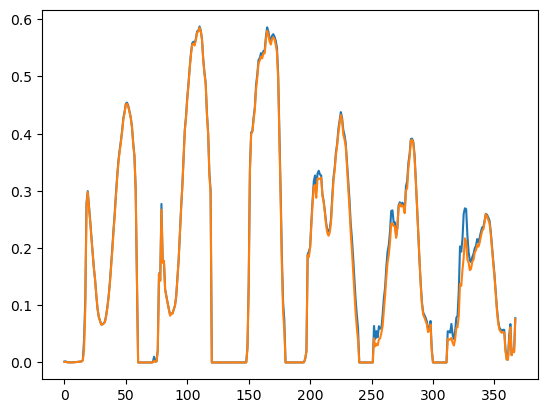

In [ ]:
# %%

import matplotlib.pyplot as plt

plt.plot(r2_base_lst)
plt.plot(r2_gb_lst)

In [ ]:
# %%

np.mean(r2_base_lst)

0.18486999385348832

In [ ]:
# %%

np.mean(r2_gb_lst)

0.17935844373864177

In [ ]:
# %%

# 0.7877
0.886 / (0.7877 / 0.78298)

0.88069097372096

In [ ]:
# %%

(1.0 - 0.00477 - np.mean(r2_gb_lst) / 0.8806)

0.7915524577121942

In [ ]:
# %%

1 - np.mean(r2_base_lst) / 0.8806

0.7900635999846828

In [ ]:
#%%

(1.0 - np.mean(r2_gb_lst) / 0.8806)

0.7963224577121942

In [ ]:
# %%

n_components = 50

In [ ]:
# %%

x_val_cat = np.concatenate(
    [val_data_dict["x_1d"][:, 0:360], val_data_dict["x_p"]], axis=1
)

In [ ]:
# %%

x_test_cat = np.concatenate(
    [test_data_dict["x_1d"][:, 0:360], test_data_dict["x_p"]], axis=1
)

In [ ]:
# %%

pca = PCA(n_components=n_components)
pca.fit(x_val_cat)

PCA(n_components=50)

In [ ]:
# %%

pca.explained_variance_ratio_.cumsum()

array([0.44345592, 0.55826121, 0.64297354, 0.71372536, 0.75923685,
       0.79266142, 0.82260635, 0.8460558 , 0.86105263, 0.8756071 ,
       0.88766283, 0.89717382, 0.90609108, 0.91414712, 0.92189931,
       0.92834235, 0.93343109, 0.93827262, 0.94266398, 0.94679099,
       0.95029796, 0.95329931, 0.95572571, 0.95799341, 0.96021398,
       0.96219005, 0.964008  , 0.96573651, 0.96730213, 0.96884045,
       0.97020116, 0.97151612, 0.9727312 , 0.97389652, 0.97494486,
       0.97597036, 0.97690104, 0.9778102 , 0.9786937 , 0.97951825,
       0.98031794, 0.98106791, 0.98180206, 0.98252737, 0.98318924,
       0.98383738, 0.9844607 , 0.98506072, 0.98562998, 0.98615532])

In [ ]:
# %%

x_val_pca = pca.transform(x_val_cat)
x_test_pca = pca.transform(x_test_cat)

In [ ]:
# %%

# val_data_y = []
# val_data_x = []
# for batch in val_dl:
#     val_data_y.append(batch["y"].numpy())

#     val_data_x.append(batch["x"].numpy())

In [ ]:
# %%

# val_data = np.concatenate(val_data, axis=0)
# # %%
# torch.save(val_data, "val_data_y.pt")

In [ ]:
# %%

# Take average# %%

In [ ]:
# %%

r2_score(val_data_y, all_val_av)

KeyboardInterrupt: 

In [ ]:
# %%

def run_xgb(i):
    y_val = val_data_y[x_val_mask, i] - all_val_av[x_val_mask, i]
    y_train = val_data_y[x_train_mask, i] - all_val_av[x_train_mask, i]

    x_val = np.concatenate(
        [a[x_val_mask, i : i + 1] for a in all_val]
        + [x_val_cat[x_val_mask, i : i + 1]]
        + [x_val_pca[x_val_mask, :]],
        axis=1,
    )
    x_train = np.concatenate(
        [a[x_train_mask, i : i + 1] for a in all_val]
        + [x_val_cat[x_train_mask, i : i + 1]]
        + [x_val_pca[x_train_mask, :]],
        axis=1,
    )

    x_test = np.concatenate(
        [a[:, i : i + 1] for a in all_test] + [x_test_cat[:, i : i + 1]] + [x_test_pca],
        axis=1,
    )

    # model = sklearn.linear_model.LinearRegression()
    # model.fit(x_train_cat, y_xgb)

    model = lgb.LGBMRegressor(**lgbm_params)

    model.fit(
        x_train,
        y_train,
        eval_set=[(x_val, y_val)],
        eval_metric="mean_squared_error",
        callbacks=[lgb.log_evaluation(10), lgb.early_stopping(10)],
    )
    preds_gbm = model.predict(x_test)

    mse_gb = ((y_val - model.predict(x_val)) ** 2).mean()
    mse_base = (y_val**2).mean()

    return {
        "model": model,
        "preds_gbm": preds_gbm,
        "mse_gb": mse_gb,
        "mse_base": mse_base,
    }

: 

In [ ]:
# %%

preds_model = []
ratios = []

r2_base_lst = []
r2_gb_lst = []

for i, w in enumerate(norm_y.zero_mask):
    if w == False:
        out_dict = run_xgb(i)
        preds_gbm = out_dict["preds_gbm"]
        mse_gb = out_dict["mse_gb"]
        mse_base = out_dict["mse_base"]
    else:
        print(f"Skipping {i}")
        mse_base = 0  # r2_score(y_test[:, i], preds_test[:, i])
        mse_gb = 0
        preds_gbm = np.zeros(all_val_av.shape[0])

    r2_base_lst.append(mse_base)
    r2_gb_lst.append(mse_gb)
    # r2_ratio_lst.append(r2_ratio)
    preds_model.append(preds_gbm)
    print(f"Base: {mse_base:.5f}, GB: {mse_gb:.5f} diff: {mse_gb - mse_base:.5f} {i}")

: 

In [ ]:
# %%

def run_xgb(i):
    y_val = val_data_y[x_val_mask, i] - all_val_av[x_val_mask, i]
    y_train = val_data_y[x_train_mask, i] - all_val_av[x_train_mask, i]

    x_val = np.concatenate(
        [a[x_val_mask, i : i + 1] for a in all_val]
        + [x_val_cat[x_val_mask, i : i + 1]]
        + [x_val_pca[x_val_mask, :]],
        axis=1,
    )
    x_train = np.concatenate(
        [a[x_train_mask, i : i + 1] for a in all_val]
        + [x_val_cat[x_train_mask, i : i + 1]]
        + [x_val_pca[x_train_mask, :]],
        axis=1,
    )

    x_test = np.concatenate(
        [a[:, i : i + 1] for a in all_test] + [x_test_cat[:, i : i + 1]] + [x_test_pca],
        axis=1,
    )

    # model = sklearn.linear_model.LinearRegression()
    # model.fit(x_train_cat, y_xgb)

    model = lgb.LGBMRegressor(**lgbm_params)

    model.fit(
        x_train,
        y_train,
        eval_set=[(x_val, y_val)],
        eval_metric="mean_squared_error",
        callbacks=[lgb.log_evaluation(10), lgb.early_stopping(10)],
    )
    preds_gbm = model.predict(x_test)

    mse_gb = ((y_val - model.predict(x_val)) ** 2).mean()
    mse_base = (y_val**2).mean()

    return {
        "model": model,
        "preds_gbm": preds_gbm,
        "mse_gb": mse_gb,
        "mse_base": mse_base,
    }

In [ ]:
# %%

preds_model = []
ratios = []

r2_base_lst = []
r2_gb_lst = []

for i, w in enumerate(norm_y.zero_mask):
    if w == False:
        out_dict = run_xgb(i)
        preds_gbm = out_dict["preds_gbm"]
        mse_gb = out_dict["mse_gb"]
        mse_base = out_dict["mse_base"]
    else:
        print(f"Skipping {i}")
        mse_base = 0  # r2_score(y_test[:, i], preds_test[:, i])
        mse_gb = 0
        preds_gbm = np.zeros(x_test_cat.shape[0])

    r2_base_lst.append(mse_base)
    r2_gb_lst.append(mse_gb)
    # r2_ratio_lst.append(r2_ratio)
    preds_model.append(preds_gbm)
    print(f"Base: {mse_base:.5f}, GB: {mse_gb:.5f} diff: {mse_gb - mse_base:.5f} {i}")

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.029478 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.003918
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.00119372
[20]	valid_0's l2: 0.00106053
[30]	valid_0's l2: 0.000963596
[40]	valid_0's l2: 0.000907671
[50]	valid_0's l2: 0.000874885
[60]	valid_0's l2: 0.000854765
[70]	valid_0's l2: 0.000842596
[80]	valid_0's l2: 0.000833424
[90]	valid_0's l2: 0.00082201
[100]	valid_0's l2: 0.000814926
Did not meet early stopping. Best iteration is:


KeyboardInterrupt: 

In [ ]:
# %%

lgbm_params = {
    "boosting_type": "gbdt",
    "objective": "regression",
    "metric": ["l2"],
    "num_iterations": 400,
    # "reg_alpha": 0.1,
    # "reg_lambda": 3.25,
    "device": "gpu",
    "random_state": 42,
}

In [ ]:
# %%

def run_xgb(i):
    y_val = val_data_y[x_val_mask, i] - all_val_av[x_val_mask, i]
    y_train = val_data_y[x_train_mask, i] - all_val_av[x_train_mask, i]

    x_val = np.concatenate(
        [a[x_val_mask, i : i + 1] for a in all_val]
        + [x_val_cat[x_val_mask, i : i + 1]]
        + [x_val_pca[x_val_mask, :]],
        axis=1,
    )
    x_train = np.concatenate(
        [a[x_train_mask, i : i + 1] for a in all_val]
        + [x_val_cat[x_train_mask, i : i + 1]]
        + [x_val_pca[x_train_mask, :]],
        axis=1,
    )

    x_test = np.concatenate(
        [a[:, i : i + 1] for a in all_test] + [x_test_cat[:, i : i + 1]] + [x_test_pca],
        axis=1,
    )

    # model = sklearn.linear_model.LinearRegression()
    # model.fit(x_train_cat, y_xgb)

    model = lgb.LGBMRegressor(**lgbm_params)

    model.fit(
        x_train,
        y_train,
        eval_set=[(x_val, y_val)],
        eval_metric="mean_squared_error",
        callbacks=[lgb.log_evaluation(10), lgb.early_stopping(10)],
    )
    preds_gbm = model.predict(x_test)

    mse_gb = ((y_val - model.predict(x_val)) ** 2).mean()
    mse_base = (y_val**2).mean()

    return {
        "model": model,
        "preds_gbm": preds_gbm,
        "mse_gb": mse_gb,
        "mse_base": mse_base,
    }

In [ ]:
# %%

preds_model = []
ratios = []

r2_base_lst = []
r2_gb_lst = []

for i, w in enumerate(norm_y.zero_mask):
    if w == False:
        out_dict = run_xgb(i)
        preds_gbm = out_dict["preds_gbm"]
        mse_gb = out_dict["mse_gb"]
        mse_base = out_dict["mse_base"]
    else:
        print(f"Skipping {i}")
        mse_base = 0  # r2_score(y_test[:, i], preds_test[:, i])
        mse_gb = 0
        preds_gbm = np.zeros(x_test_cat.shape[0])

    r2_base_lst.append(mse_base)
    r2_gb_lst.append(mse_gb)
    # r2_ratio_lst.append(r2_ratio)
    preds_model.append(preds_gbm)
    print(f"Base: {mse_base:.5f}, GB: {mse_gb:.5f} diff: {mse_gb - mse_base:.5f} {i}")

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028831 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.003918
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.00119372
[20]	valid_0's l2: 0.00106053
[30]	valid_0's l2: 0.000963603
[40]	valid_0's l2: 0.000907682
[50]	valid_0's l2: 0.000874896
[60]	valid_0's l2: 0.000854774
[70]	valid_0's l2: 0.000842605
[80]	valid_0's l2: 0.000833432
[90]	valid_0's l2: 0.000822018
[100]	valid_0's l2: 0.000814934
[110]	valid_0's l2: 0.000804704
[120]	valid_0's

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028804 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.002849
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.00125334
[20]	valid_0's l2: 0.00108419
[30]	valid_0's l2: 0.00103076
[40]	valid_0's l2: 0.00100535
[50]	valid_0's l2: 0.000987806
[60]	valid_0's l2: 0.0009744
[70]	valid_0's l2: 0.000961652
[80]	valid_0's l2: 0.000952883
[90]	valid_0's l2: 0.000944041
[100]	valid_0's l2: 0.000936751
[110]	valid_0's l2: 0.000929412
[120]	valid_0's l2:

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028587 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.002636
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.000466217
[20]	valid_0's l2: 0.000427477
[30]	valid_0's l2: 0.000410561
[40]	valid_0's l2: 0.00039971
[50]	valid_0's l2: 0.000392863
[60]	valid_0's l2: 0.000387443
[70]	valid_0's l2: 0.000382391
[80]	valid_0's l2: 0.00037758
[90]	valid_0's l2: 0.000373934
[100]	valid_0's l2: 0.000370347
[110]	valid_0's l2: 0.000366902
[120]	valid_0's

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028574 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.002515
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.000206511
[20]	valid_0's l2: 0.00019101
[30]	valid_0's l2: 0.000183155
[40]	valid_0's l2: 0.000178211
[50]	valid_0's l2: 0.000174109
[60]	valid_0's l2: 0.000170837
[70]	valid_0's l2: 0.000168148
[80]	valid_0's l2: 0.000165682
[90]	valid_0's l2: 0.00016362
[100]	valid_0's l2: 0.000161672
[110]	valid_0's l2: 0.000159738
[120]	valid_0's

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028734 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.002286
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.000158809
[20]	valid_0's l2: 0.000144479
[30]	valid_0's l2: 0.000137993
[40]	valid_0's l2: 0.00013382
[50]	valid_0's l2: 0.000130284
[60]	valid_0's l2: 0.000127543
[70]	valid_0's l2: 0.00012516
[80]	valid_0's l2: 0.000123261
[90]	valid_0's l2: 0.000121615
[100]	valid_0's l2: 0.000120175
[110]	valid_0's l2: 0.000118842
[120]	valid_0's

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.029238 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.003099
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.000121062
[20]	valid_0's l2: 0.000110134
[30]	valid_0's l2: 0.000104831
[40]	valid_0's l2: 0.000101178
[50]	valid_0's l2: 9.85067e-05
[60]	valid_0's l2: 9.61429e-05
[70]	valid_0's l2: 9.43823e-05
[80]	valid_0's l2: 9.28473e-05
[90]	valid_0's l2: 9.14134e-05
[100]	valid_0's l2: 9.02521e-05
[110]	valid_0's l2: 8.92718e-05
[120]	valid_0

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028618 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.002217
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.00013959
[20]	valid_0's l2: 0.000129348
[30]	valid_0's l2: 0.000124239
[40]	valid_0's l2: 0.000120384
[50]	valid_0's l2: 0.000117352
[60]	valid_0's l2: 0.000115014
[70]	valid_0's l2: 0.000112983
[80]	valid_0's l2: 0.000111148
[90]	valid_0's l2: 0.000109387
[100]	valid_0's l2: 0.000108
[110]	valid_0's l2: 0.000106802
[120]	valid_0's l

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028709 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.000421
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.000231163
[20]	valid_0's l2: 0.00021913
[30]	valid_0's l2: 0.000212103
[40]	valid_0's l2: 0.000207094
[50]	valid_0's l2: 0.000203096
[60]	valid_0's l2: 0.000199729
[70]	valid_0's l2: 0.000197049
[80]	valid_0's l2: 0.000194416
[90]	valid_0's l2: 0.000192336
[100]	valid_0's l2: 0.000190436
[110]	valid_0's l2: 0.000188867
[120]	valid_0'

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.029632 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.001166
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.000369633
[20]	valid_0's l2: 0.000353804
[30]	valid_0's l2: 0.000345109
[40]	valid_0's l2: 0.000339603
[50]	valid_0's l2: 0.000334964
[60]	valid_0's l2: 0.0003312
[70]	valid_0's l2: 0.000328196
[80]	valid_0's l2: 0.000324914
[90]	valid_0's l2: 0.000322408
[100]	valid_0's l2: 0.000320288
[110]	valid_0's l2: 0.000318113
[120]	valid_0's

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.029644 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.001786
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.000566119
[20]	valid_0's l2: 0.000550748
[30]	valid_0's l2: 0.0005426
[40]	valid_0's l2: 0.000536318
[50]	valid_0's l2: 0.000531909
[60]	valid_0's l2: 0.000528062
[70]	valid_0's l2: 0.000524226
[80]	valid_0's l2: 0.000521808
[90]	valid_0's l2: 0.000519497
[100]	valid_0's l2: 0.000517354
[110]	valid_0's l2: 0.000515107
[120]	valid_0's

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.029072 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.000801
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.000817908
[20]	valid_0's l2: 0.000802123
[30]	valid_0's l2: 0.0007915
[40]	valid_0's l2: 0.000783843
[50]	valid_0's l2: 0.000777439
[60]	valid_0's l2: 0.000773256
[70]	valid_0's l2: 0.0007693
[80]	valid_0's l2: 0.000765722
[90]	valid_0's l2: 0.000762742
[100]	valid_0's l2: 0.000760341
[110]	valid_0's l2: 0.000757794
[120]	valid_0's l

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028452 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.000566
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.00103196
[20]	valid_0's l2: 0.00101994
[30]	valid_0's l2: 0.00101235
[40]	valid_0's l2: 0.00100717
[50]	valid_0's l2: 0.00100296
[60]	valid_0's l2: 0.000999186
[70]	valid_0's l2: 0.000996202
[80]	valid_0's l2: 0.000993289
[90]	valid_0's l2: 0.000991365
[100]	valid_0's l2: 0.000988931
[110]	valid_0's l2: 0.000986336
[120]	valid_0's l

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028625 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.000388
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.00125585
[20]	valid_0's l2: 0.0012405
[30]	valid_0's l2: 0.00123183
[40]	valid_0's l2: 0.00122538
[50]	valid_0's l2: 0.00122022
[60]	valid_0's l2: 0.00121668
[70]	valid_0's l2: 0.00121306
[80]	valid_0's l2: 0.00121045
[90]	valid_0's l2: 0.00120772
[100]	valid_0's l2: 0.00120525
[110]	valid_0's l2: 0.00120322
[120]	valid_0's l2: 0.00

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028450 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.000008
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.00150622
[20]	valid_0's l2: 0.00148965
[30]	valid_0's l2: 0.00147828
[40]	valid_0's l2: 0.00147066
[50]	valid_0's l2: 0.00146498
[60]	valid_0's l2: 0.0014601
[70]	valid_0's l2: 0.00145632
[80]	valid_0's l2: 0.00145254
[90]	valid_0's l2: 0.0014492
[100]	valid_0's l2: 0.00144645
[110]	valid_0's l2: 0.00144336
[120]	valid_0's l2: 0.001

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028462 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.002496
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.00182602
[20]	valid_0's l2: 0.00180092
[30]	valid_0's l2: 0.00178407
[40]	valid_0's l2: 0.00176958
[50]	valid_0's l2: 0.00175951
[60]	valid_0's l2: 0.00175039
[70]	valid_0's l2: 0.00174415
[80]	valid_0's l2: 0.00173658
[90]	valid_0's l2: 0.00173167
[100]	valid_0's l2: 0.00172703
[110]	valid_0's l2: 0.00172231
[120]	valid_0's l2: 0.0

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028348 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.002265
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.00382966
[20]	valid_0's l2: 0.00372334
[30]	valid_0's l2: 0.00365869
[40]	valid_0's l2: 0.00361513
[50]	valid_0's l2: 0.0035859
[60]	valid_0's l2: 0.00356083
[70]	valid_0's l2: 0.00353994
[80]	valid_0's l2: 0.00352347
[90]	valid_0's l2: 0.00350027
[100]	valid_0's l2: 0.00347205
[110]	valid_0's l2: 0.00345441
[120]	valid_0's l2: 0.00

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.029484 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.005188
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.0274255
[20]	valid_0's l2: 0.0250096
[30]	valid_0's l2: 0.0236968
[40]	valid_0's l2: 0.0232614
[50]	valid_0's l2: 0.0229214
[60]	valid_0's l2: 0.022723
[70]	valid_0's l2: 0.022328
[80]	valid_0's l2: 0.0222102
[90]	valid_0's l2: 0.0220928
[100]	valid_0's l2: 0.0219254
[110]	valid_0's l2: 0.0217854
[120]	valid_0's l2: 0.0216614
[130]	

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028655 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.004778
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.101352
[20]	valid_0's l2: 0.0990496
[30]	valid_0's l2: 0.0971958
[40]	valid_0's l2: 0.0961065
[50]	valid_0's l2: 0.0951903
[60]	valid_0's l2: 0.0944215
[70]	valid_0's l2: 0.0938866
[80]	valid_0's l2: 0.0937263
[90]	valid_0's l2: 0.0935129
[100]	valid_0's l2: 0.0933473
[110]	valid_0's l2: 0.0930537
[120]	valid_0's l2: 0.0928045
[130]	

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028606 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.004000
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.275857
[20]	valid_0's l2: 0.273977
[30]	valid_0's l2: 0.272587
[40]	valid_0's l2: 0.271762
[50]	valid_0's l2: 0.271543
Early stopping, best iteration is:
[48]	valid_0's l2: 0.270749
Base: 0.27915, GB: 0.27075 diff: -0.00840 18


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.029155 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.003535
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.298168
[20]	valid_0's l2: 0.299091
Early stopping, best iteration is:
[11]	valid_0's l2: 0.298132
Base: 0.29953, GB: 0.29813 diff: -0.00139 19


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028553 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.000368
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.272882
[20]	valid_0's l2: 0.27229
[30]	valid_0's l2: 0.271827
[40]	valid_0's l2: 0.271152
[50]	valid_0's l2: 0.270896
[60]	valid_0's l2: 0.270496
[70]	valid_0's l2: 0.269877
[80]	valid_0's l2: 0.269431
[90]	valid_0's l2: 0.26918
[100]	valid_0's l2: 0.269017
[110]	valid_0's l2: 0.268895
[120]	valid_0's l2: 0.268556
[130]	valid_0's l2:

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028790 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.001833
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.246521
[20]	valid_0's l2: 0.246473
Early stopping, best iteration is:
[19]	valid_0's l2: 0.246169
Base: 0.24822, GB: 0.24617 diff: -0.00206 21


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.029686 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.000274
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.218355
Early stopping, best iteration is:
[3]	valid_0's l2: 0.218094
Base: 0.21883, GB: 0.21809 diff: -0.00074 22


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.029768 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.001321
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.191651
Early stopping, best iteration is:
[5]	valid_0's l2: 0.191084
Base: 0.19131, GB: 0.19108 diff: -0.00023 23


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028645 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.002589
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.164154
[20]	valid_0's l2: 0.163895
[30]	valid_0's l2: 0.163796
Early stopping, best iteration is:
[26]	valid_0's l2: 0.163752
Base: 0.16495, GB: 0.16375 diff: -0.00120 24


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.029309 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.001097
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.144746
Early stopping, best iteration is:
[2]	valid_0's l2: 0.144213
Base: 0.14443, GB: 0.14421 diff: -0.00021 25


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028529 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.000099
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.118043
Early stopping, best iteration is:
[1]	valid_0's l2: 0.116841
Base: 0.11665, GB: 0.11684 diff: 0.00019 26


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028656 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.000929
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.0938799
Early stopping, best iteration is:
[5]	valid_0's l2: 0.0936073
Base: 0.09369, GB: 0.09361 diff: -0.00008 27


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028579 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.000767
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.0800391
Early stopping, best iteration is:
[3]	valid_0's l2: 0.0797857
Base: 0.07984, GB: 0.07979 diff: -0.00005 28


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028364 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.001116
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.0731536
Early stopping, best iteration is:
[1]	valid_0's l2: 0.0728763
Base: 0.07277, GB: 0.07288 diff: 0.00011 29


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.029693 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.000814
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.0661434
[20]	valid_0's l2: 0.0662982
Early stopping, best iteration is:
[11]	valid_0's l2: 0.0661292
Base: 0.06645, GB: 0.06613 diff: -0.00032 30


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.029173 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.001775
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.0664396
[20]	valid_0's l2: 0.066218
[30]	valid_0's l2: 0.0663995
Early stopping, best iteration is:
[20]	valid_0's l2: 0.066218
Base: 0.06675, GB: 0.06622 diff: -0.00053 31


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.030078 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.002248
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.0682582
[20]	valid_0's l2: 0.0680498
[30]	valid_0's l2: 0.0679163
[40]	valid_0's l2: 0.0678876
[50]	valid_0's l2: 0.0678117
Early stopping, best iteration is:
[48]	valid_0's l2: 0.0677966
Base: 0.06868, GB: 0.06780 diff: -0.00089 32


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.029848 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.002691
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.0713889
[20]	valid_0's l2: 0.0712396
[30]	valid_0's l2: 0.071106
[40]	valid_0's l2: 0.0710342
[50]	valid_0's l2: 0.070911
[60]	valid_0's l2: 0.0708101
[70]	valid_0's l2: 0.0707501
[80]	valid_0's l2: 0.0706302
[90]	valid_0's l2: 0.0706186
[100]	valid_0's l2: 0.0706049
Early stopping, best iteration is:
[97]	valid_0's l2: 0.0705478
Ba

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.031768 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.003166
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.0819956
[20]	valid_0's l2: 0.0816979
[30]	valid_0's l2: 0.0814184
[40]	valid_0's l2: 0.0812485
[50]	valid_0's l2: 0.0810993
[60]	valid_0's l2: 0.0811069
Early stopping, best iteration is:
[53]	valid_0's l2: 0.0810663
Base: 0.08243, GB: 0.08107 diff: -0.00136 34


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028668 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.003971
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.0968696
[20]	valid_0's l2: 0.0966146
[30]	valid_0's l2: 0.0963786
[40]	valid_0's l2: 0.0961997
[50]	valid_0's l2: 0.0959363
[60]	valid_0's l2: 0.095825
[70]	valid_0's l2: 0.0957377
[80]	valid_0's l2: 0.0958175
Early stopping, best iteration is:
[75]	valid_0's l2: 0.095722
Base: 0.09755, GB: 0.09572 diff: -0.00182 35


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.029573 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.003061
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.115423
[20]	valid_0's l2: 0.115156
[30]	valid_0's l2: 0.114897
[40]	valid_0's l2: 0.114643
[50]	valid_0's l2: 0.114518
[60]	valid_0's l2: 0.114412
[70]	valid_0's l2: 0.114173
[80]	valid_0's l2: 0.114041
[90]	valid_0's l2: 0.114032
[100]	valid_0's l2: 0.113923
[110]	valid_0's l2: 0.113911
[120]	valid_0's l2: 0.11383
[130]	valid_0's l

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.029468 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.004679
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.138976
[20]	valid_0's l2: 0.138659
[30]	valid_0's l2: 0.138356
[40]	valid_0's l2: 0.138074
[50]	valid_0's l2: 0.137791
[60]	valid_0's l2: 0.13769
[70]	valid_0's l2: 0.137592
[80]	valid_0's l2: 0.137498
[90]	valid_0's l2: 0.137357
[100]	valid_0's l2: 0.137191
[110]	valid_0's l2: 0.13698
[120]	valid_0's l2: 0.136849
[130]	valid_0's l2

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028572 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.003641
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.168289
[20]	valid_0's l2: 0.167662
[30]	valid_0's l2: 0.167334
[40]	valid_0's l2: 0.166947
[50]	valid_0's l2: 0.166551
[60]	valid_0's l2: 0.166201
[70]	valid_0's l2: 0.165943
[80]	valid_0's l2: 0.165627
[90]	valid_0's l2: 0.165374
[100]	valid_0's l2: 0.165155
[110]	valid_0's l2: 0.164832
[120]	valid_0's l2: 0.164778
[130]	valid_0's 

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028771 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.002364
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.198659
[20]	valid_0's l2: 0.197943
[30]	valid_0's l2: 0.197383
[40]	valid_0's l2: 0.196943
[50]	valid_0's l2: 0.196631
[60]	valid_0's l2: 0.196493
[70]	valid_0's l2: 0.196099
[80]	valid_0's l2: 0.195988
[90]	valid_0's l2: 0.195673
[100]	valid_0's l2: 0.195333
[110]	valid_0's l2: 0.195308
[120]	valid_0's l2: 0.195262
[130]	valid_0's 

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.030322 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.004025
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.232031
[20]	valid_0's l2: 0.231456
[30]	valid_0's l2: 0.230977
[40]	valid_0's l2: 0.230564
[50]	valid_0's l2: 0.230438
[60]	valid_0's l2: 0.230058
[70]	valid_0's l2: 0.229821
[80]	valid_0's l2: 0.229386
[90]	valid_0's l2: 0.229072
[100]	valid_0's l2: 0.228754
[110]	valid_0's l2: 0.228572
[120]	valid_0's l2: 0.228482
[130]	valid_0's 

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.029576 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.003134
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.261017
[20]	valid_0's l2: 0.260307
[30]	valid_0's l2: 0.260024
[40]	valid_0's l2: 0.259504
[50]	valid_0's l2: 0.259139
[60]	valid_0's l2: 0.258733
[70]	valid_0's l2: 0.25828
[80]	valid_0's l2: 0.258088
[90]	valid_0's l2: 0.257638
[100]	valid_0's l2: 0.257373
[110]	valid_0's l2: 0.257161
[120]	valid_0's l2: 0.256766
[130]	valid_0's l

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.030033 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.004051
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.29504
[20]	valid_0's l2: 0.294532
[30]	valid_0's l2: 0.294129
[40]	valid_0's l2: 0.293682
[50]	valid_0's l2: 0.293386
[60]	valid_0's l2: 0.293135
[70]	valid_0's l2: 0.292934
[80]	valid_0's l2: 0.292753
[90]	valid_0's l2: 0.292592
[100]	valid_0's l2: 0.292379
[110]	valid_0's l2: 0.292247
[120]	valid_0's l2: 0.292158
[130]	valid_0's l

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.035786 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.004417
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.325639
[20]	valid_0's l2: 0.32493
[30]	valid_0's l2: 0.324491
[40]	valid_0's l2: 0.324144
[50]	valid_0's l2: 0.323831
[60]	valid_0's l2: 0.323473
[70]	valid_0's l2: 0.323142
[80]	valid_0's l2: 0.322945
[90]	valid_0's l2: 0.322816
[100]	valid_0's l2: 0.322782
[110]	valid_0's l2: 0.322457
[120]	valid_0's l2: 0.322309
[130]	valid_0's l

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028430 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.006450
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.352372
[20]	valid_0's l2: 0.351987
[30]	valid_0's l2: 0.351657
[40]	valid_0's l2: 0.351555
[50]	valid_0's l2: 0.351473
[60]	valid_0's l2: 0.351192
[70]	valid_0's l2: 0.350945
[80]	valid_0's l2: 0.350613
[90]	valid_0's l2: 0.350519
[100]	valid_0's l2: 0.350266
[110]	valid_0's l2: 0.350095
[120]	valid_0's l2: 0.34987
[130]	valid_0's l

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.030412 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.006666
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.370806
[20]	valid_0's l2: 0.370274
[30]	valid_0's l2: 0.37001
[40]	valid_0's l2: 0.369677
[50]	valid_0's l2: 0.369449
[60]	valid_0's l2: 0.369365
[70]	valid_0's l2: 0.369204
[80]	valid_0's l2: 0.369085
[90]	valid_0's l2: 0.368935
[100]	valid_0's l2: 0.368873
[110]	valid_0's l2: 0.368693
[120]	valid_0's l2: 0.368692
Early stopping, b

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.030171 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.006820
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.386764
[20]	valid_0's l2: 0.386533
[30]	valid_0's l2: 0.386183
[40]	valid_0's l2: 0.385877
[50]	valid_0's l2: 0.385653
[60]	valid_0's l2: 0.385569
[70]	valid_0's l2: 0.385392
[80]	valid_0's l2: 0.385168
[90]	valid_0's l2: 0.385127
[100]	valid_0's l2: 0.384952
[110]	valid_0's l2: 0.384791
[120]	valid_0's l2: 0.384705
[130]	valid_0's 

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028744 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.007887
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.404746
[20]	valid_0's l2: 0.404494
[30]	valid_0's l2: 0.404152
[40]	valid_0's l2: 0.40389
[50]	valid_0's l2: 0.403652
[60]	valid_0's l2: 0.403616
[70]	valid_0's l2: 0.403304
[80]	valid_0's l2: 0.403218
[90]	valid_0's l2: 0.403032
[100]	valid_0's l2: 0.402925
[110]	valid_0's l2: 0.402876
[120]	valid_0's l2: 0.402821
[130]	valid_0's l

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028629 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.006873
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.426493
[20]	valid_0's l2: 0.426246
[30]	valid_0's l2: 0.425998
[40]	valid_0's l2: 0.425743
[50]	valid_0's l2: 0.425527
[60]	valid_0's l2: 0.425207
[70]	valid_0's l2: 0.424872
[80]	valid_0's l2: 0.424667
[90]	valid_0's l2: 0.424544
[100]	valid_0's l2: 0.424398
[110]	valid_0's l2: 0.424252
[120]	valid_0's l2: 0.424093
[130]	valid_0's 

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028557 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.009562
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.437458
[20]	valid_0's l2: 0.437135
[30]	valid_0's l2: 0.436816
[40]	valid_0's l2: 0.436663
[50]	valid_0's l2: 0.436494
[60]	valid_0's l2: 0.436287
[70]	valid_0's l2: 0.436233
[80]	valid_0's l2: 0.436114
[90]	valid_0's l2: 0.436111
Early stopping, best iteration is:
[86]	valid_0's l2: 0.436063
Base: 0.43860, GB: 0.43606 diff: -0.0025

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.031857 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.009910
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.451378
[20]	valid_0's l2: 0.450987
[30]	valid_0's l2: 0.450769
[40]	valid_0's l2: 0.450509
[50]	valid_0's l2: 0.450414
[60]	valid_0's l2: 0.450411
Early stopping, best iteration is:
[58]	valid_0's l2: 0.45036
Base: 0.45247, GB: 0.45036 diff: -0.00211 50


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028608 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.009885
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.453194
[20]	valid_0's l2: 0.452904
[30]	valid_0's l2: 0.452671
[40]	valid_0's l2: 0.45234
[50]	valid_0's l2: 0.452208
[60]	valid_0's l2: 0.452016
[70]	valid_0's l2: 0.452131
Early stopping, best iteration is:
[61]	valid_0's l2: 0.451997
Base: 0.45422, GB: 0.45200 diff: -0.00222 51


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.029408 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.010078
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.447829
[20]	valid_0's l2: 0.44739
[30]	valid_0's l2: 0.44713
[40]	valid_0's l2: 0.447034
[50]	valid_0's l2: 0.446812
[60]	valid_0's l2: 0.446673
[70]	valid_0's l2: 0.446529
[80]	valid_0's l2: 0.446451
[90]	valid_0's l2: 0.446278
[100]	valid_0's l2: 0.446193
[110]	valid_0's l2: 0.446099
Early stopping, best iteration is:
[109]	valid_

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.029779 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.010005
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.437499
[20]	valid_0's l2: 0.437374
[30]	valid_0's l2: 0.437064
[40]	valid_0's l2: 0.436972
Early stopping, best iteration is:
[38]	valid_0's l2: 0.43695
Base: 0.43875, GB: 0.43695 diff: -0.00180 53


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028892 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.008955
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.427842
[20]	valid_0's l2: 0.42776
[30]	valid_0's l2: 0.427631
[40]	valid_0's l2: 0.427563
[50]	valid_0's l2: 0.427501
[60]	valid_0's l2: 0.427337
Early stopping, best iteration is:
[59]	valid_0's l2: 0.427285
Base: 0.42877, GB: 0.42728 diff: -0.00149 54


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028811 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.010432
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.411139
[20]	valid_0's l2: 0.411005
[30]	valid_0's l2: 0.410958
[40]	valid_0's l2: 0.410897
[50]	valid_0's l2: 0.410838
[60]	valid_0's l2: 0.410718
[70]	valid_0's l2: 0.410463
[80]	valid_0's l2: 0.410562
Early stopping, best iteration is:
[71]	valid_0's l2: 0.410461
Base: 0.41202, GB: 0.41046 diff: -0.00156 55


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028639 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.011251
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.382584
[20]	valid_0's l2: 0.382199
[30]	valid_0's l2: 0.382008
[40]	valid_0's l2: 0.3818
[50]	valid_0's l2: 0.381824
Early stopping, best iteration is:
[42]	valid_0's l2: 0.381763
Base: 0.38348, GB: 0.38176 diff: -0.00171 56


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.029101 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.011601
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.360701
[20]	valid_0's l2: 0.360253
[30]	valid_0's l2: 0.36014
[40]	valid_0's l2: 0.360101
Early stopping, best iteration is:
[33]	valid_0's l2: 0.360049
Base: 0.36196, GB: 0.36005 diff: -0.00191 57


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028548 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.008648
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.303809
[20]	valid_0's l2: 0.303428
[30]	valid_0's l2: 0.302893
[40]	valid_0's l2: 0.302806
[50]	valid_0's l2: 0.302754
[60]	valid_0's l2: 0.302563
[70]	valid_0's l2: 0.302531
Early stopping, best iteration is:
[64]	valid_0's l2: 0.302441
Base: 0.30468, GB: 0.30244 diff: -0.00224 58


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028671 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.002943
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.154107
[20]	valid_0's l2: 0.153822
[30]	valid_0's l2: 0.153557
[40]	valid_0's l2: 0.153415
[50]	valid_0's l2: 0.153175
[60]	valid_0's l2: 0.153065
[70]	valid_0's l2: 0.152904
[80]	valid_0's l2: 0.152833
[90]	valid_0's l2: 0.152706
[100]	valid_0's l2: 0.152671
[110]	valid_0's l2: 0.152624
[120]	valid_0's l2: 0.152525
[130]	valid_0's 

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.029818 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.001362
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.000475243
[20]	valid_0's l2: 0.000414118
[30]	valid_0's l2: 0.00037774
[40]	valid_0's l2: 0.000351516
[50]	valid_0's l2: 0.000331784
[60]	valid_0's l2: 0.000314594
[70]	valid_0's l2: 0.000302528
[80]	valid_0's l2: 0.000289684
[90]	valid_0's l2: 0.000278622
[100]	valid_0's l2: 0.000270644
[110]	valid_0's l2: 0.000260822
[120]	valid_0

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.029194 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.002011
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.00595925
[20]	valid_0's l2: 0.00490358
[30]	valid_0's l2: 0.00444012
[40]	valid_0's l2: 0.00413754
[50]	valid_0's l2: 0.00384083
[60]	valid_0's l2: 0.00362528
[70]	valid_0's l2: 0.00342074
[80]	valid_0's l2: 0.00327755
[90]	valid_0's l2: 0.003125
[100]	valid_0's l2: 0.00301724
[110]	valid_0's l2: 0.00290618
[120]	valid_0's l2: 0.0028

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.029504 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.000296
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.00128036
Early stopping, best iteration is:
[6]	valid_0's l2: 0.00123805
Base: 0.00133, GB: 0.00124 diff: -0.00009 74


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028826 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.000699
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.00245526
Early stopping, best iteration is:
[2]	valid_0's l2: 0.00206299
Base: 0.00206, GB: 0.00206 diff: 0.00000 75


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.029631 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.000917
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.0212072
Early stopping, best iteration is:
[6]	valid_0's l2: 0.020857
Base: 0.02162, GB: 0.02086 diff: -0.00076 76


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028575 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.007299
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.157608
Early stopping, best iteration is:
[1]	valid_0's l2: 0.155726
Base: 0.15590, GB: 0.15573 diff: -0.00017 77


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028744 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.005098
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.138935
[20]	valid_0's l2: 0.139363
Early stopping, best iteration is:
[16]	valid_0's l2: 0.138462
Base: 0.14372, GB: 0.13846 diff: -0.00526 78


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.029747 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.003364
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.280822
Early stopping, best iteration is:
[2]	valid_0's l2: 0.27608
Base: 0.27717, GB: 0.27608 diff: -0.00109 79


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.029894 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.000650
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.175788
[20]	valid_0's l2: 0.175332
Early stopping, best iteration is:
[16]	valid_0's l2: 0.175046
Base: 0.17746, GB: 0.17505 diff: -0.00241 80


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.029802 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.000286
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.177854
Early stopping, best iteration is:
[4]	valid_0's l2: 0.177418
Base: 0.17744, GB: 0.17742 diff: -0.00002 81


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.029628 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.001328
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.127687
Early stopping, best iteration is:
[2]	valid_0's l2: 0.127216
Base: 0.12773, GB: 0.12722 diff: -0.00052 82


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.029774 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.002205
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.115123
[20]	valid_0's l2: 0.114939
Early stopping, best iteration is:
[17]	valid_0's l2: 0.114614
Base: 0.11591, GB: 0.11461 diff: -0.00130 83


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028856 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.003267
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.104338
[20]	valid_0's l2: 0.104427
Early stopping, best iteration is:
[11]	valid_0's l2: 0.104281
Base: 0.10451, GB: 0.10428 diff: -0.00023 84


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.029773 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.002102
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.0933392
[20]	valid_0's l2: 0.0932048
[30]	valid_0's l2: 0.092934
[40]	valid_0's l2: 0.0927373
[50]	valid_0's l2: 0.0925683
[60]	valid_0's l2: 0.0924694
[70]	valid_0's l2: 0.0923338
[80]	valid_0's l2: 0.0922834
[90]	valid_0's l2: 0.0922627
[100]	valid_0's l2: 0.0922879
Early stopping, best iteration is:
[92]	valid_0's l2: 0.0922433
B

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028760 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.000857
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.0833498
[20]	valid_0's l2: 0.0832514
[30]	valid_0's l2: 0.082949
[40]	valid_0's l2: 0.0827076
[50]	valid_0's l2: 0.0824917
[60]	valid_0's l2: 0.0824027
[70]	valid_0's l2: 0.0822548
[80]	valid_0's l2: 0.0822108
[90]	valid_0's l2: 0.0819647
[100]	valid_0's l2: 0.0818141
[110]	valid_0's l2: 0.0818029
[120]	valid_0's l2: 0.081784
[130]	

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028528 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.000708
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.0851082
[20]	valid_0's l2: 0.0849949
[30]	valid_0's l2: 0.0850069
Early stopping, best iteration is:
[27]	valid_0's l2: 0.084862
Base: 0.08542, GB: 0.08486 diff: -0.00056 87


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.030037 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.001104
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.0858717
[20]	valid_0's l2: 0.0858159
[30]	valid_0's l2: 0.0856752
Early stopping, best iteration is:
[26]	valid_0's l2: 0.0854616
Base: 0.08592, GB: 0.08546 diff: -0.00046 88


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.029995 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.001839
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.092451
[20]	valid_0's l2: 0.0923388
Early stopping, best iteration is:
[17]	valid_0's l2: 0.0921405
Base: 0.09288, GB: 0.09214 diff: -0.00074 89


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.030505 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.001999
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.0995838
Early stopping, best iteration is:
[2]	valid_0's l2: 0.0994565
Base: 0.09958, GB: 0.09946 diff: -0.00013 90


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028436 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.002011
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.115733
Early stopping, best iteration is:
[1]	valid_0's l2: 0.115508
Base: 0.11558, GB: 0.11551 diff: -0.00007 91


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028688 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.002675
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.146588
Early stopping, best iteration is:
[6]	valid_0's l2: 0.146543
Base: 0.14700, GB: 0.14654 diff: -0.00046 92


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028482 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.002456
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.179708
[20]	valid_0's l2: 0.179373
[30]	valid_0's l2: 0.179159
[40]	valid_0's l2: 0.179283
Early stopping, best iteration is:
[37]	valid_0's l2: 0.179144
Base: 0.18015, GB: 0.17914 diff: -0.00100 93


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028590 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.000942
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.226118
[20]	valid_0's l2: 0.226027
[30]	valid_0's l2: 0.225706
[40]	valid_0's l2: 0.225715
Early stopping, best iteration is:
[34]	valid_0's l2: 0.225612
Base: 0.22647, GB: 0.22561 diff: -0.00086 94


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.029534 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.004430
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.269428
[20]	valid_0's l2: 0.26902
[30]	valid_0's l2: 0.26932
Early stopping, best iteration is:
[20]	valid_0's l2: 0.26902
Base: 0.27014, GB: 0.26902 diff: -0.00112 95


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028883 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.004237
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.308594
[20]	valid_0's l2: 0.308311
[30]	valid_0's l2: 0.307936
[40]	valid_0's l2: 0.307384
[50]	valid_0's l2: 0.307616
Early stopping, best iteration is:
[40]	valid_0's l2: 0.307384
Base: 0.30865, GB: 0.30738 diff: -0.00127 96


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028567 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.006246
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.358563
[20]	valid_0's l2: 0.358124
[30]	valid_0's l2: 0.357744
[40]	valid_0's l2: 0.357589
[50]	valid_0's l2: 0.357446
[60]	valid_0's l2: 0.35729
Early stopping, best iteration is:
[54]	valid_0's l2: 0.357256
Base: 0.35935, GB: 0.35726 diff: -0.00210 97


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028771 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.005279
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.404977
[20]	valid_0's l2: 0.404399
[30]	valid_0's l2: 0.404095
[40]	valid_0's l2: 0.403754
[50]	valid_0's l2: 0.403758
[60]	valid_0's l2: 0.403713
[70]	valid_0's l2: 0.403559
Early stopping, best iteration is:
[68]	valid_0's l2: 0.403399
Base: 0.40678, GB: 0.40340 diff: -0.00338 98


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028642 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.001921
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.42934
[20]	valid_0's l2: 0.429115
Early stopping, best iteration is:
[16]	valid_0's l2: 0.428997
Base: 0.43059, GB: 0.42900 diff: -0.00159 99


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.029171 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.004792
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.462869
[20]	valid_0's l2: 0.462467
[30]	valid_0's l2: 0.462017
[40]	valid_0's l2: 0.461887
[50]	valid_0's l2: 0.46207
Early stopping, best iteration is:
[40]	valid_0's l2: 0.461887
Base: 0.46338, GB: 0.46189 diff: -0.00149 100


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028566 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.004325
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.486544
[20]	valid_0's l2: 0.485652
[30]	valid_0's l2: 0.485287
[40]	valid_0's l2: 0.485157
[50]	valid_0's l2: 0.484938
[60]	valid_0's l2: 0.484836
[70]	valid_0's l2: 0.484439
[80]	valid_0's l2: 0.484308
[90]	valid_0's l2: 0.48399
[100]	valid_0's l2: 0.484041
Early stopping, best iteration is:
[95]	valid_0's l2: 0.483943
Base: 0.48770

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028772 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.007201
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.515014
[20]	valid_0's l2: 0.514503
[30]	valid_0's l2: 0.514056
[40]	valid_0's l2: 0.513663
[50]	valid_0's l2: 0.513363
[60]	valid_0's l2: 0.513243
[70]	valid_0's l2: 0.512962
[80]	valid_0's l2: 0.512927
[90]	valid_0's l2: 0.512885
[100]	valid_0's l2: 0.512847
Early stopping, best iteration is:
[96]	valid_0's l2: 0.512724
Base: 0.5158

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.030302 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.007650
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.539501
[20]	valid_0's l2: 0.53895
[30]	valid_0's l2: 0.538593
[40]	valid_0's l2: 0.538325
[50]	valid_0's l2: 0.537976
[60]	valid_0's l2: 0.537639
Early stopping, best iteration is:
[58]	valid_0's l2: 0.537587
Base: 0.54034, GB: 0.53759 diff: -0.00276 103


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028195 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.007037
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.557117
[20]	valid_0's l2: 0.556614
[30]	valid_0's l2: 0.556196
[40]	valid_0's l2: 0.555742
[50]	valid_0's l2: 0.555605
[60]	valid_0's l2: 0.555267
[70]	valid_0's l2: 0.555252
[80]	valid_0's l2: 0.554962
[90]	valid_0's l2: 0.554698
[100]	valid_0's l2: 0.554505
[110]	valid_0's l2: 0.554412
[120]	valid_0's l2: 0.554155
[130]	valid_0's l

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028605 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.004801
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.559789
[20]	valid_0's l2: 0.559073
[30]	valid_0's l2: 0.558818
[40]	valid_0's l2: 0.558403
[50]	valid_0's l2: 0.55801
[60]	valid_0's l2: 0.55769
[70]	valid_0's l2: 0.557604
[80]	valid_0's l2: 0.557394
[90]	valid_0's l2: 0.557266
[100]	valid_0's l2: 0.557006
Early stopping, best iteration is:
[98]	valid_0's l2: 0.556979
Base: 0.56076,

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028494 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.003432
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.556495
[20]	valid_0's l2: 0.556195
[30]	valid_0's l2: 0.555837
[40]	valid_0's l2: 0.555546
[50]	valid_0's l2: 0.555249
[60]	valid_0's l2: 0.554987
[70]	valid_0's l2: 0.554801
[80]	valid_0's l2: 0.554628
[90]	valid_0's l2: 0.5543
[100]	valid_0's l2: 0.554163
[110]	valid_0's l2: 0.55392
[120]	valid_0's l2: 0.55378
[130]	valid_0's l2: 0

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028353 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.005762
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.565137
[20]	valid_0's l2: 0.564692
[30]	valid_0's l2: 0.564503
[40]	valid_0's l2: 0.564172
[50]	valid_0's l2: 0.563749
[60]	valid_0's l2: 0.56349
[70]	valid_0's l2: 0.563216
[80]	valid_0's l2: 0.563048
[90]	valid_0's l2: 0.562769
[100]	valid_0's l2: 0.562467
[110]	valid_0's l2: 0.562389
Early stopping, best iteration is:
[109]	valid_

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.029804 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.005354
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.578447
[20]	valid_0's l2: 0.57814
[30]	valid_0's l2: 0.577949
[40]	valid_0's l2: 0.577649
[50]	valid_0's l2: 0.577356
[60]	valid_0's l2: 0.577287
[70]	valid_0's l2: 0.577121
[80]	valid_0's l2: 0.576858
[90]	valid_0's l2: 0.57666
[100]	valid_0's l2: 0.576471
[110]	valid_0's l2: 0.576381
[120]	valid_0's l2: 0.576165
[130]	valid_0's l2:

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.029983 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.009476
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.579235
[20]	valid_0's l2: 0.578945
[30]	valid_0's l2: 0.578821
[40]	valid_0's l2: 0.578733
[50]	valid_0's l2: 0.578459
[60]	valid_0's l2: 0.57828
[70]	valid_0's l2: 0.57806
[80]	valid_0's l2: 0.577925
[90]	valid_0's l2: 0.577791
[100]	valid_0's l2: 0.577637
[110]	valid_0's l2: 0.577449
[120]	valid_0's l2: 0.577299
[130]	valid_0's l2:

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.029681 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.010017
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.586995
[20]	valid_0's l2: 0.586602
[30]	valid_0's l2: 0.586353
[40]	valid_0's l2: 0.585992
[50]	valid_0's l2: 0.585631
[60]	valid_0's l2: 0.58544
[70]	valid_0's l2: 0.585208
[80]	valid_0's l2: 0.585055
[90]	valid_0's l2: 0.584971
[100]	valid_0's l2: 0.58489
[110]	valid_0's l2: 0.584853
[120]	valid_0's l2: 0.58474
[130]	valid_0's l2: 

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.029353 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.009597
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.580213
[20]	valid_0's l2: 0.579981
[30]	valid_0's l2: 0.579678
[40]	valid_0's l2: 0.579505
[50]	valid_0's l2: 0.579488
[60]	valid_0's l2: 0.579324
[70]	valid_0's l2: 0.579164
[80]	valid_0's l2: 0.578984
[90]	valid_0's l2: 0.578825
[100]	valid_0's l2: 0.578701
[110]	valid_0's l2: 0.578505
[120]	valid_0's l2: 0.578389
[130]	valid_0's l

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028619 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.006712
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.565027
[20]	valid_0's l2: 0.564819
[30]	valid_0's l2: 0.564766
Early stopping, best iteration is:
[28]	valid_0's l2: 0.56475
Base: 0.56549, GB: 0.56475 diff: -0.00074 112


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028809 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.005423
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.529665
[20]	valid_0's l2: 0.529471
[30]	valid_0's l2: 0.529192
[40]	valid_0's l2: 0.528908
[50]	valid_0's l2: 0.528597
[60]	valid_0's l2: 0.528474
[70]	valid_0's l2: 0.528381
[80]	valid_0's l2: 0.528357
Early stopping, best iteration is:
[74]	valid_0's l2: 0.528247
Base: 0.53023, GB: 0.52825 diff: -0.00198 113


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028579 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.004928
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.506702
[20]	valid_0's l2: 0.506408
[30]	valid_0's l2: 0.506242
[40]	valid_0's l2: 0.506042
[50]	valid_0's l2: 0.50585
[60]	valid_0's l2: 0.505765
[70]	valid_0's l2: 0.505531
[80]	valid_0's l2: 0.50531
[90]	valid_0's l2: 0.505232
[100]	valid_0's l2: 0.505067
[110]	valid_0's l2: 0.504977
[120]	valid_0's l2: 0.504912
[130]	valid_0's l2:

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028694 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.005428
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.48805
[20]	valid_0's l2: 0.487711
[30]	valid_0's l2: 0.487601
[40]	valid_0's l2: 0.487436
[50]	valid_0's l2: 0.487263
[60]	valid_0's l2: 0.487157
[70]	valid_0's l2: 0.486923
[80]	valid_0's l2: 0.486917
Early stopping, best iteration is:
[75]	valid_0's l2: 0.486885
Base: 0.48879, GB: 0.48689 diff: -0.00190 115


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028718 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.007080
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.435422
[20]	valid_0's l2: 0.43511
[30]	valid_0's l2: 0.434911
[40]	valid_0's l2: 0.434661
[50]	valid_0's l2: 0.4344
[60]	valid_0's l2: 0.43426
[70]	valid_0's l2: 0.434119
Early stopping, best iteration is:
[69]	valid_0's l2: 0.434103
Base: 0.43613, GB: 0.43410 diff: -0.00202 116


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.029727 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.007133
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.400709
[20]	valid_0's l2: 0.400464
[30]	valid_0's l2: 0.400389
[40]	valid_0's l2: 0.400085
[50]	valid_0's l2: 0.399862
[60]	valid_0's l2: 0.399891
[70]	valid_0's l2: 0.399651
[80]	valid_0's l2: 0.399619
[90]	valid_0's l2: 0.39951
[100]	valid_0's l2: 0.399258
[110]	valid_0's l2: 0.399193
[120]	valid_0's l2: 0.3991
[130]	valid_0's l2: 

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.030838 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.006622
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.330633
[20]	valid_0's l2: 0.330112
[30]	valid_0's l2: 0.32987
[40]	valid_0's l2: 0.329674
[50]	valid_0's l2: 0.329499
[60]	valid_0's l2: 0.329257
[70]	valid_0's l2: 0.329139
[80]	valid_0's l2: 0.328724
[90]	valid_0's l2: 0.328469
[100]	valid_0's l2: 0.328214
[110]	valid_0's l2: 0.328084
[120]	valid_0's l2: 0.327966
[130]	valid_0's l2

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028486 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.001925
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.300118
[20]	valid_0's l2: 0.299137
[30]	valid_0's l2: 0.298275
[40]	valid_0's l2: 0.297573
[50]	valid_0's l2: 0.296988
[60]	valid_0's l2: 0.296367
[70]	valid_0's l2: 0.295621
[80]	valid_0's l2: 0.295084
[90]	valid_0's l2: 0.294674
[100]	valid_0's l2: 0.294057
[110]	valid_0's l2: 0.293639
[120]	valid_0's l2: 0.293205
[130]	valid_0's 

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 59 dense feature groups (38.18 MB) transferred to GPU in 0.029399 secs. 1 sparse feature groups
[LightGBM] [Info] Start training from score 0.000431
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 4.41283e-05
[20]	valid_0's l2: 2.30363e-05
[30]	valid_0's l2: 1.48951e-05
[40]	valid_0's l2: 1.16337e-05
[50]	valid_0's l2: 1.00925e-05
[60]	valid_0's l2: 9.31885e-06
[70]	valid_0's l2: 8.86946e-06
[80]	valid_0's l2: 8.63699e-06
[90]	valid_0's l2: 8.44986e-06
[100]	valid_0's l2: 8.33556e-06
[110]	valid_0's l2: 8.18014e-06
[120]	valid_0

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 59 dense feature groups (38.18 MB) transferred to GPU in 0.027501 secs. 1 sparse feature groups
[LightGBM] [Info] Start training from score 0.000462
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.00011494
[20]	valid_0's l2: 8.07189e-05
[30]	valid_0's l2: 6.41407e-05
[40]	valid_0's l2: 5.45872e-05
[50]	valid_0's l2: 4.94174e-05
[60]	valid_0's l2: 4.62028e-05
[70]	valid_0's l2: 4.38977e-05
[80]	valid_0's l2: 4.27404e-05
[90]	valid_0's l2: 4.19874e-05
[100]	valid_0's l2: 4.11469e-05
[110]	valid_0's l2: 4.04546e-05
[120]	valid_0'

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.029499 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.002304
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.0247568
[20]	valid_0's l2: 0.0245663
[30]	valid_0's l2: 0.0245598
Early stopping, best iteration is:
[21]	valid_0's l2: 0.0244985
Base: 0.02643, GB: 0.02450 diff: -0.00193 149


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028231 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.006605
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.133413
[20]	valid_0's l2: 0.133649
Early stopping, best iteration is:
[10]	valid_0's l2: 0.133413
Base: 0.13693, GB: 0.13341 diff: -0.00352 150


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.029118 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.006737
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.334112
[20]	valid_0's l2: 0.33309
[30]	valid_0's l2: 0.332714
Early stopping, best iteration is:
[22]	valid_0's l2: 0.33249
Base: 0.33847, GB: 0.33249 diff: -0.00598 151


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028866 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.004910
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.400539
[20]	valid_0's l2: 0.399365
[30]	valid_0's l2: 0.398634
[40]	valid_0's l2: 0.398902
Early stopping, best iteration is:
[38]	valid_0's l2: 0.398477
Base: 0.40199, GB: 0.39848 diff: -0.00351 152


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028601 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.003014
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.402426
[20]	valid_0's l2: 0.402344
[30]	valid_0's l2: 0.401072
[40]	valid_0's l2: 0.40115
[50]	valid_0's l2: 0.40091
Early stopping, best iteration is:
[42]	valid_0's l2: 0.40087
Base: 0.40485, GB: 0.40087 diff: -0.00398 153


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028514 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.003530
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.427296
[20]	valid_0's l2: 0.426301
[30]	valid_0's l2: 0.425539
Early stopping, best iteration is:
[27]	valid_0's l2: 0.425281
Base: 0.42866, GB: 0.42528 diff: -0.00338 154


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.029631 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.006613
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.443085
[20]	valid_0's l2: 0.442416
[30]	valid_0's l2: 0.441983
[40]	valid_0's l2: 0.441611
[50]	valid_0's l2: 0.442527
Early stopping, best iteration is:
[40]	valid_0's l2: 0.441611
Base: 0.44566, GB: 0.44161 diff: -0.00405 155


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028231 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.009311
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.481665
[20]	valid_0's l2: 0.479339
[30]	valid_0's l2: 0.47945
Early stopping, best iteration is:
[25]	valid_0's l2: 0.478965
Base: 0.48527, GB: 0.47897 diff: -0.00631 156


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028520 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.011441
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.4999
[20]	valid_0's l2: 0.49795
[30]	valid_0's l2: 0.497087
[40]	valid_0's l2: 0.496092
[50]	valid_0's l2: 0.495113
[60]	valid_0's l2: 0.494173
[70]	valid_0's l2: 0.493881
[80]	valid_0's l2: 0.493682
[90]	valid_0's l2: 0.493843
Early stopping, best iteration is:
[81]	valid_0's l2: 0.493573
Base: 0.50348, GB: 0.49357 diff: -0.00990 15

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.030453 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.011935
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.525132
[20]	valid_0's l2: 0.524404
[30]	valid_0's l2: 0.523279
[40]	valid_0's l2: 0.522426
[50]	valid_0's l2: 0.522343
[60]	valid_0's l2: 0.522414
Early stopping, best iteration is:
[54]	valid_0's l2: 0.522064
Base: 0.52865, GB: 0.52206 diff: -0.00659 158


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028188 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.011537
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.528696
[20]	valid_0's l2: 0.527589
[30]	valid_0's l2: 0.527243
Early stopping, best iteration is:
[29]	valid_0's l2: 0.527163
Base: 0.53225, GB: 0.52716 diff: -0.00509 159


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028761 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.013435
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.53781
[20]	valid_0's l2: 0.536753
[30]	valid_0's l2: 0.535833
[40]	valid_0's l2: 0.535058
[50]	valid_0's l2: 0.534426
[60]	valid_0's l2: 0.534011
[70]	valid_0's l2: 0.533599
[80]	valid_0's l2: 0.533918
Early stopping, best iteration is:
[70]	valid_0's l2: 0.533599
Base: 0.54084, GB: 0.53360 diff: -0.00724 160


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.029688 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.012976
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.535205
[20]	valid_0's l2: 0.534083
[30]	valid_0's l2: 0.533384
[40]	valid_0's l2: 0.532887
[50]	valid_0's l2: 0.532584
[60]	valid_0's l2: 0.532438
[70]	valid_0's l2: 0.53218
[80]	valid_0's l2: 0.531812
[90]	valid_0's l2: 0.531389
[100]	valid_0's l2: 0.53119
[110]	valid_0's l2: 0.5309
Early stopping, best iteration is:
[109]	valid_0's

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028332 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.010710
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.543283
[20]	valid_0's l2: 0.542635
[30]	valid_0's l2: 0.542033
[40]	valid_0's l2: 0.541725
[50]	valid_0's l2: 0.54104
[60]	valid_0's l2: 0.540571
[70]	valid_0's l2: 0.540215
[80]	valid_0's l2: 0.539615
[90]	valid_0's l2: 0.539188
[100]	valid_0's l2: 0.538929
[110]	valid_0's l2: 0.538444
[120]	valid_0's l2: 0.538218
[130]	valid_0's l2

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028669 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.010622
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.543332
[20]	valid_0's l2: 0.542518
[30]	valid_0's l2: 0.541872
[40]	valid_0's l2: 0.54145
[50]	valid_0's l2: 0.540856
[60]	valid_0's l2: 0.540485
[70]	valid_0's l2: 0.540219
[80]	valid_0's l2: 0.540031
[90]	valid_0's l2: 0.539721
[100]	valid_0's l2: 0.539585
[110]	valid_0's l2: 0.539528
[120]	valid_0's l2: 0.539319
[130]	valid_0's l2

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028471 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.010441
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.567034
[20]	valid_0's l2: 0.566273
[30]	valid_0's l2: 0.56586
[40]	valid_0's l2: 0.565597
[50]	valid_0's l2: 0.564979
[60]	valid_0's l2: 0.564761
[70]	valid_0's l2: 0.564277
[80]	valid_0's l2: 0.564094
[90]	valid_0's l2: 0.563589
[100]	valid_0's l2: 0.563415
[110]	valid_0's l2: 0.563188
[120]	valid_0's l2: 0.562916
[130]	valid_0's l2

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028651 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.010543
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.584263
[20]	valid_0's l2: 0.583095
[30]	valid_0's l2: 0.582555
[40]	valid_0's l2: 0.581726
[50]	valid_0's l2: 0.581085
[60]	valid_0's l2: 0.580602
[70]	valid_0's l2: 0.580208
[80]	valid_0's l2: 0.57963
[90]	valid_0's l2: 0.579123
[100]	valid_0's l2: 0.578906
[110]	valid_0's l2: 0.578595
[120]	valid_0's l2: 0.57832
[130]	valid_0's l2:

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028553 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.007107
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.577567
[20]	valid_0's l2: 0.576823
[30]	valid_0's l2: 0.575921
[40]	valid_0's l2: 0.575332
[50]	valid_0's l2: 0.574861
[60]	valid_0's l2: 0.5743
[70]	valid_0's l2: 0.573843
[80]	valid_0's l2: 0.573417
[90]	valid_0's l2: 0.573043
[100]	valid_0's l2: 0.57256
[110]	valid_0's l2: 0.572222
[120]	valid_0's l2: 0.571792
[130]	valid_0's l2: 

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028303 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.007459
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.565436
[20]	valid_0's l2: 0.564551
[30]	valid_0's l2: 0.563994
[40]	valid_0's l2: 0.563323
[50]	valid_0's l2: 0.56282
[60]	valid_0's l2: 0.562314
[70]	valid_0's l2: 0.561991
[80]	valid_0's l2: 0.561535
[90]	valid_0's l2: 0.560993
[100]	valid_0's l2: 0.560709
[110]	valid_0's l2: 0.560315
[120]	valid_0's l2: 0.560035
[130]	valid_0's l2

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.029295 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.006105
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.559962
[20]	valid_0's l2: 0.559309
[30]	valid_0's l2: 0.558669
[40]	valid_0's l2: 0.55803
[50]	valid_0's l2: 0.557219
[60]	valid_0's l2: 0.55671
[70]	valid_0's l2: 0.556232
[80]	valid_0's l2: 0.555718
[90]	valid_0's l2: 0.555291
[100]	valid_0's l2: 0.554815
[110]	valid_0's l2: 0.554455
[120]	valid_0's l2: 0.554074
[130]	valid_0's l2:

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.029035 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.003156
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.569339
[20]	valid_0's l2: 0.568563
[30]	valid_0's l2: 0.567911
[40]	valid_0's l2: 0.567411
[50]	valid_0's l2: 0.566871
[60]	valid_0's l2: 0.566426
[70]	valid_0's l2: 0.566089
[80]	valid_0's l2: 0.565556
[90]	valid_0's l2: 0.565257
[100]	valid_0's l2: 0.564938
[110]	valid_0's l2: 0.564497
[120]	valid_0's l2: 0.564212
[130]	valid_0's l

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028589 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.003773
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.572747
[20]	valid_0's l2: 0.571765
[30]	valid_0's l2: 0.571059
[40]	valid_0's l2: 0.570627
[50]	valid_0's l2: 0.56987
[60]	valid_0's l2: 0.569352
[70]	valid_0's l2: 0.568838
[80]	valid_0's l2: 0.568381
[90]	valid_0's l2: 0.567834
[100]	valid_0's l2: 0.567444
[110]	valid_0's l2: 0.567146
[120]	valid_0's l2: 0.566741
[130]	valid_0's l2

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028661 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.004431
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.568503
[20]	valid_0's l2: 0.567875
[30]	valid_0's l2: 0.567173
[40]	valid_0's l2: 0.566555
[50]	valid_0's l2: 0.566104
[60]	valid_0's l2: 0.565615
[70]	valid_0's l2: 0.565059
[80]	valid_0's l2: 0.56443
[90]	valid_0's l2: 0.564122
[100]	valid_0's l2: 0.563569
[110]	valid_0's l2: 0.563327
[120]	valid_0's l2: 0.562898
[130]	valid_0's l2

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.031127 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.002699
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.560896
[20]	valid_0's l2: 0.56007
[30]	valid_0's l2: 0.559345
[40]	valid_0's l2: 0.558379
[50]	valid_0's l2: 0.557635
[60]	valid_0's l2: 0.556893
[70]	valid_0's l2: 0.556421
[80]	valid_0's l2: 0.555883
[90]	valid_0's l2: 0.555359
[100]	valid_0's l2: 0.55497
[110]	valid_0's l2: 0.554507
[120]	valid_0's l2: 0.554323
[130]	valid_0's l2:

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028658 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.002151
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.548477
[20]	valid_0's l2: 0.547346
[30]	valid_0's l2: 0.546221
[40]	valid_0's l2: 0.545177
[50]	valid_0's l2: 0.544279
[60]	valid_0's l2: 0.543629
[70]	valid_0's l2: 0.543155
[80]	valid_0's l2: 0.542606
[90]	valid_0's l2: 0.542134
[100]	valid_0's l2: 0.541499
[110]	valid_0's l2: 0.540885
[120]	valid_0's l2: 0.540341
[130]	valid_0's l

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.029453 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.001748
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.500387
[20]	valid_0's l2: 0.499286
[30]	valid_0's l2: 0.498316
[40]	valid_0's l2: 0.497662
[50]	valid_0's l2: 0.496784
[60]	valid_0's l2: 0.496074
[70]	valid_0's l2: 0.495308
[80]	valid_0's l2: 0.494546
[90]	valid_0's l2: 0.493763
[100]	valid_0's l2: 0.49329
[110]	valid_0's l2: 0.492924
[120]	valid_0's l2: 0.492453
[130]	valid_0's l2

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028370 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.001012
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.400989
[20]	valid_0's l2: 0.399405
[30]	valid_0's l2: 0.397718
[40]	valid_0's l2: 0.396752
[50]	valid_0's l2: 0.395723
[60]	valid_0's l2: 0.394742
[70]	valid_0's l2: 0.393677
[80]	valid_0's l2: 0.392835
[90]	valid_0's l2: 0.392071
[100]	valid_0's l2: 0.39095
[110]	valid_0's l2: 0.390119
[120]	valid_0's l2: 0.38946
[130]	valid_0's l2:

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028633 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.002887
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.295475
[20]	valid_0's l2: 0.293254
[30]	valid_0's l2: 0.291868
[40]	valid_0's l2: 0.29032
[50]	valid_0's l2: 0.28879
[60]	valid_0's l2: 0.287701
[70]	valid_0's l2: 0.286594
[80]	valid_0's l2: 0.28571
[90]	valid_0's l2: 0.284878
[100]	valid_0's l2: 0.283879
[110]	valid_0's l2: 0.282702
[120]	valid_0's l2: 0.281945
[130]	valid_0's l2: 

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.032033 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.001022
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.182127
[20]	valid_0's l2: 0.179572
[30]	valid_0's l2: 0.177212
[40]	valid_0's l2: 0.175374
[50]	valid_0's l2: 0.173526
[60]	valid_0's l2: 0.171879
[70]	valid_0's l2: 0.170665
[80]	valid_0's l2: 0.169691
[90]	valid_0's l2: 0.168655
[100]	valid_0's l2: 0.167639
[110]	valid_0's l2: 0.166685
[120]	valid_0's l2: 0.165964
[130]	valid_0's l

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028527 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.002532
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.100894
[20]	valid_0's l2: 0.0976386
[30]	valid_0's l2: 0.0952497
[40]	valid_0's l2: 0.0934897
[50]	valid_0's l2: 0.0920319
[60]	valid_0's l2: 0.0909094
[70]	valid_0's l2: 0.0899669
[80]	valid_0's l2: 0.0892153
[90]	valid_0's l2: 0.0883922
[100]	valid_0's l2: 0.0874683
[110]	valid_0's l2: 0.0866649
[120]	valid_0's l2: 0.0858347
[130]	

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028909 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.003148
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.0681985
[20]	valid_0's l2: 0.0643555
[30]	valid_0's l2: 0.0616791
[40]	valid_0's l2: 0.0596526
[50]	valid_0's l2: 0.0580428
[60]	valid_0's l2: 0.0567476
[70]	valid_0's l2: 0.0552897
[80]	valid_0's l2: 0.0541245
[90]	valid_0's l2: 0.0532861
[100]	valid_0's l2: 0.0524638
[110]	valid_0's l2: 0.0517134
[120]	valid_0's l2: 0.0510353
[130]

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028740 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.000926
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 1.25918e-05
[20]	valid_0's l2: 5.49269e-06
[30]	valid_0's l2: 2.79693e-06
[40]	valid_0's l2: 1.6939e-06
[50]	valid_0's l2: 1.2432e-06
[60]	valid_0's l2: 1.06107e-06
[70]	valid_0's l2: 9.66202e-07
[80]	valid_0's l2: 9.12024e-07
[90]	valid_0's l2: 8.75323e-07
[100]	valid_0's l2: 8.49436e-07
[110]	valid_0's l2: 8.23791e-07
[120]	valid_0'

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15059
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 59 dense feature groups (38.18 MB) transferred to GPU in 0.027764 secs. 1 sparse feature groups
[LightGBM] [Info] Start training from score -0.000785
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 9.86983e-06
[20]	valid_0's l2: 4.2632e-06
[30]	valid_0's l2: 2.18639e-06
[40]	valid_0's l2: 1.38829e-06
[50]	valid_0's l2: 1.04807e-06
[60]	valid_0's l2: 9.05853e-07
[70]	valid_0's l2: 8.33942e-07
[80]	valid_0's l2: 7.87556e-07
[90]	valid_0's l2: 7.52907e-07
[100]	valid_0's l2: 7.26879e-07
[110]	valid_0's l2: 7.06093e-07
[120]	valid_0

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 59 dense feature groups (38.18 MB) transferred to GPU in 0.027211 secs. 1 sparse feature groups
[LightGBM] [Info] Start training from score -0.000176
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.000124647
Early stopping, best iteration is:
[4]	valid_0's l2: 8.52761e-05
Base: 0.00011, GB: 0.00009 diff: -0.00003 194


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 59 dense feature groups (38.18 MB) transferred to GPU in 0.028671 secs. 1 sparse feature groups
[LightGBM] [Info] Start training from score -0.001269
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.00214486
Early stopping, best iteration is:
[1]	valid_0's l2: 0.000408311
Base: 0.00037, GB: 0.00041 diff: 0.00004 195


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.029769 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.000142
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.00703899
Early stopping, best iteration is:
[2]	valid_0's l2: 0.00638208
Base: 0.00639, GB: 0.00638 diff: -0.00000 196


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028615 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.000956
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.0198857
Early stopping, best iteration is:
[2]	valid_0's l2: 0.0190128
Base: 0.01970, GB: 0.01901 diff: -0.00069 197


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.035082 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.000841
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.193857
Early stopping, best iteration is:
[2]	valid_0's l2: 0.187938
Base: 0.18893, GB: 0.18794 diff: -0.00099 198


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.029979 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.002180
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.187258
[20]	valid_0's l2: 0.182601
[30]	valid_0's l2: 0.181094
[40]	valid_0's l2: 0.179891
Early stopping, best iteration is:
[39]	valid_0's l2: 0.179787
Base: 0.19405, GB: 0.17979 diff: -0.01427 199


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028780 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.003274
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.202195
Early stopping, best iteration is:
[1]	valid_0's l2: 0.199665
Base: 0.20151, GB: 0.19966 diff: -0.00185 200


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028777 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.003107
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.242392
[20]	valid_0's l2: 0.241708
[30]	valid_0's l2: 0.239209
Early stopping, best iteration is:
[25]	valid_0's l2: 0.238517
Base: 0.24595, GB: 0.23852 diff: -0.00743 201


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028588 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.004629
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.273699
[20]	valid_0's l2: 0.273756
Early stopping, best iteration is:
[15]	valid_0's l2: 0.273261
Base: 0.28338, GB: 0.27326 diff: -0.01012 202


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028762 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.006180
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.309647
[20]	valid_0's l2: 0.310024
Early stopping, best iteration is:
[13]	valid_0's l2: 0.308236
Base: 0.31689, GB: 0.30824 diff: -0.00866 203


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.029396 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.005290
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.319515
[20]	valid_0's l2: 0.315493
[30]	valid_0's l2: 0.314465
Early stopping, best iteration is:
[24]	valid_0's l2: 0.313558
Base: 0.32689, GB: 0.31356 diff: -0.01333 204


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.029184 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.004223
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.293599
[20]	valid_0's l2: 0.289604
[30]	valid_0's l2: 0.289238
[40]	valid_0's l2: 0.288692
[50]	valid_0's l2: 0.287431
[60]	valid_0's l2: 0.286958
[70]	valid_0's l2: 0.286503
Early stopping, best iteration is:
[65]	valid_0's l2: 0.286218
Base: 0.30028, GB: 0.28622 diff: -0.01407 205


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.029529 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.004738
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.326172
[20]	valid_0's l2: 0.324641
[30]	valid_0's l2: 0.323778
[40]	valid_0's l2: 0.323166
Early stopping, best iteration is:
[37]	valid_0's l2: 0.322446
Base: 0.33005, GB: 0.32245 diff: -0.00760 206


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028350 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.002981
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.331094
[20]	valid_0's l2: 0.327927
[30]	valid_0's l2: 0.326447
[40]	valid_0's l2: 0.326039
[50]	valid_0's l2: 0.326049
Early stopping, best iteration is:
[40]	valid_0's l2: 0.326039
Base: 0.33516, GB: 0.32604 diff: -0.00912 207


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.029534 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.001730
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.323009
[20]	valid_0's l2: 0.321792
[30]	valid_0's l2: 0.320804
[40]	valid_0's l2: 0.321089
Early stopping, best iteration is:
[31]	valid_0's l2: 0.320503
Base: 0.32853, GB: 0.32050 diff: -0.00803 208


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.029100 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.000678
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.324637
[20]	valid_0's l2: 0.323808
[30]	valid_0's l2: 0.322904
[40]	valid_0's l2: 0.323011
Early stopping, best iteration is:
[36]	valid_0's l2: 0.322659
Base: 0.32708, GB: 0.32266 diff: -0.00442 209


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028453 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.000283
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.292734
[20]	valid_0's l2: 0.292294
[30]	valid_0's l2: 0.292054
[40]	valid_0's l2: 0.291406
[50]	valid_0's l2: 0.291207
[60]	valid_0's l2: 0.290839
[70]	valid_0's l2: 0.290549
[80]	valid_0's l2: 0.290477
[90]	valid_0's l2: 0.290594
[100]	valid_0's l2: 0.29003
[110]	valid_0's l2: 0.290313
Early stopping, best iteration is:
[100]	valid_

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028420 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.001625
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.281688
[20]	valid_0's l2: 0.281265
[30]	valid_0's l2: 0.280843
[40]	valid_0's l2: 0.280372
[50]	valid_0's l2: 0.280285
[60]	valid_0's l2: 0.279816
[70]	valid_0's l2: 0.279721
[80]	valid_0's l2: 0.279595
[90]	valid_0's l2: 0.279543
[100]	valid_0's l2: 0.279235
[110]	valid_0's l2: 0.279432
Early stopping, best iteration is:
[102]	vali

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028103 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.003955
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.263101
[20]	valid_0's l2: 0.26193
[30]	valid_0's l2: 0.261097
[40]	valid_0's l2: 0.260614
[50]	valid_0's l2: 0.260312
[60]	valid_0's l2: 0.259902
[70]	valid_0's l2: 0.259371
[80]	valid_0's l2: 0.259728
Early stopping, best iteration is:
[70]	valid_0's l2: 0.259371
Base: 0.26474, GB: 0.25937 diff: -0.00537 212


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.029914 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.003001
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.243003
[20]	valid_0's l2: 0.242184
[30]	valid_0's l2: 0.241545
[40]	valid_0's l2: 0.241264
[50]	valid_0's l2: 0.240953
[60]	valid_0's l2: 0.240728
[70]	valid_0's l2: 0.24015
[80]	valid_0's l2: 0.239959
[90]	valid_0's l2: 0.240043
Early stopping, best iteration is:
[85]	valid_0's l2: 0.239896
Base: 0.24472, GB: 0.23990 diff: -0.00483

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.029341 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.002650
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.229096
[20]	valid_0's l2: 0.228301
[30]	valid_0's l2: 0.227556
[40]	valid_0's l2: 0.227015
[50]	valid_0's l2: 0.226758
[60]	valid_0's l2: 0.226325
[70]	valid_0's l2: 0.226032
[80]	valid_0's l2: 0.225982
[90]	valid_0's l2: 0.225843
[100]	valid_0's l2: 0.225842
Early stopping, best iteration is:
[96]	valid_0's l2: 0.225748
Base: 0.231

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028244 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.000948
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.225611
[20]	valid_0's l2: 0.224057
[30]	valid_0's l2: 0.223077
[40]	valid_0's l2: 0.222307
[50]	valid_0's l2: 0.221663
[60]	valid_0's l2: 0.221349
[70]	valid_0's l2: 0.22084
[80]	valid_0's l2: 0.220707
[90]	valid_0's l2: 0.220593
[100]	valid_0's l2: 0.220123
[110]	valid_0's l2: 0.219815
[120]	valid_0's l2: 0.219529
[130]	valid_0's l

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028543 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.000306
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.230689
[20]	valid_0's l2: 0.229375
[30]	valid_0's l2: 0.228288
[40]	valid_0's l2: 0.2275
[50]	valid_0's l2: 0.226714
[60]	valid_0's l2: 0.226867
[70]	valid_0's l2: 0.226529
Early stopping, best iteration is:
[67]	valid_0's l2: 0.226472
Base: 0.23356, GB: 0.22647 diff: -0.00709 216


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028342 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.000642
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.24892
[20]	valid_0's l2: 0.247459
[30]	valid_0's l2: 0.246833
[40]	valid_0's l2: 0.246168
[50]	valid_0's l2: 0.245664
[60]	valid_0's l2: 0.244196
[70]	valid_0's l2: 0.244243
[80]	valid_0's l2: 0.243423
[90]	valid_0's l2: 0.243211
[100]	valid_0's l2: 0.242859
Early stopping, best iteration is:
[99]	valid_0's l2: 0.242767
Base: 0.2507

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028405 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.000536
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.287097
[20]	valid_0's l2: 0.284958
[30]	valid_0's l2: 0.283703
[40]	valid_0's l2: 0.283343
[50]	valid_0's l2: 0.281669
[60]	valid_0's l2: 0.281863
Early stopping, best iteration is:
[53]	valid_0's l2: 0.281631
Base: 0.28979, GB: 0.28163 diff: -0.00816 218


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028641 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.000594
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.321173
[20]	valid_0's l2: 0.319012
[30]	valid_0's l2: 0.319133
[40]	valid_0's l2: 0.318846
Early stopping, best iteration is:
[35]	valid_0's l2: 0.318406
Base: 0.32309, GB: 0.31841 diff: -0.00469 219


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028403 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.001374
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.339407
Early stopping, best iteration is:
[9]	valid_0's l2: 0.338923
Base: 0.34031, GB: 0.33892 diff: -0.00139 220


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028369 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.002515
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.366069
[20]	valid_0's l2: 0.365261
Early stopping, best iteration is:
[13]	valid_0's l2: 0.365189
Base: 0.36771, GB: 0.36519 diff: -0.00253 221


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028470 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.001802
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.380359
[20]	valid_0's l2: 0.379426
[30]	valid_0's l2: 0.378123
[40]	valid_0's l2: 0.378164
Early stopping, best iteration is:
[36]	valid_0's l2: 0.377894
Base: 0.38233, GB: 0.37789 diff: -0.00444 222


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028334 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.001214
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.405666
[20]	valid_0's l2: 0.403896
[30]	valid_0's l2: 0.403068
[40]	valid_0's l2: 0.401567
[50]	valid_0's l2: 0.400942
[60]	valid_0's l2: 0.40019
Early stopping, best iteration is:
[59]	valid_0's l2: 0.399987
Base: 0.40792, GB: 0.39999 diff: -0.00793 223


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028118 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.000382
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.419793
[20]	valid_0's l2: 0.41831
[30]	valid_0's l2: 0.417681
[40]	valid_0's l2: 0.416662
[50]	valid_0's l2: 0.41631
[60]	valid_0's l2: 0.416836
Early stopping, best iteration is:
[55]	valid_0's l2: 0.416273
Base: 0.42279, GB: 0.41627 diff: -0.00652 224


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028541 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.001088
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.435469
[20]	valid_0's l2: 0.43481
[30]	valid_0's l2: 0.433387
[40]	valid_0's l2: 0.432995
[50]	valid_0's l2: 0.43269
[60]	valid_0's l2: 0.432674
Early stopping, best iteration is:
[51]	valid_0's l2: 0.432634
Base: 0.43777, GB: 0.43263 diff: -0.00514 225


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028372 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.000615
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.425271
[20]	valid_0's l2: 0.423498
[30]	valid_0's l2: 0.423105
[40]	valid_0's l2: 0.42201
[50]	valid_0's l2: 0.421677
Early stopping, best iteration is:
[49]	valid_0's l2: 0.42156
Base: 0.42790, GB: 0.42156 diff: -0.00634 226


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028379 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.000750
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.404143
[20]	valid_0's l2: 0.402451
[30]	valid_0's l2: 0.402137
[40]	valid_0's l2: 0.401108
[50]	valid_0's l2: 0.400504
[60]	valid_0's l2: 0.399489
[70]	valid_0's l2: 0.399393
[80]	valid_0's l2: 0.3996
Early stopping, best iteration is:
[71]	valid_0's l2: 0.399311
Base: 0.40646, GB: 0.39931 diff: -0.00715 227


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028512 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.000298
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.394405
[20]	valid_0's l2: 0.39346
[30]	valid_0's l2: 0.392562
[40]	valid_0's l2: 0.391862
[50]	valid_0's l2: 0.391423
[60]	valid_0's l2: 0.39129
[70]	valid_0's l2: 0.390509
[80]	valid_0's l2: 0.390493
Early stopping, best iteration is:
[71]	valid_0's l2: 0.390426
Base: 0.39721, GB: 0.39043 diff: -0.00679 228


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028587 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.001182
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.380539
[20]	valid_0's l2: 0.378677
[30]	valid_0's l2: 0.377715
[40]	valid_0's l2: 0.377337
[50]	valid_0's l2: 0.37699
[60]	valid_0's l2: 0.376396
[70]	valid_0's l2: 0.376084
Early stopping, best iteration is:
[69]	valid_0's l2: 0.376047
Base: 0.38323, GB: 0.37605 diff: -0.00718 229


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028710 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.002356
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.34974
[20]	valid_0's l2: 0.347624
[30]	valid_0's l2: 0.346477
[40]	valid_0's l2: 0.345539
[50]	valid_0's l2: 0.344984
[60]	valid_0's l2: 0.344089
[70]	valid_0's l2: 0.342942
[80]	valid_0's l2: 0.342329
[90]	valid_0's l2: 0.341643
[100]	valid_0's l2: 0.341228
[110]	valid_0's l2: 0.341217
[120]	valid_0's l2: 0.340782
Early stopping, b

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028284 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.002905
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.313263
[20]	valid_0's l2: 0.310927
[30]	valid_0's l2: 0.30984
[40]	valid_0's l2: 0.308547
[50]	valid_0's l2: 0.307367
[60]	valid_0's l2: 0.306789
[70]	valid_0's l2: 0.30627
[80]	valid_0's l2: 0.30574
[90]	valid_0's l2: 0.305191
[100]	valid_0's l2: 0.304613
[110]	valid_0's l2: 0.304154
[120]	valid_0's l2: 0.303749
[130]	valid_0's l2:

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028671 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.004316
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.281568
[20]	valid_0's l2: 0.279062
[30]	valid_0's l2: 0.277645
[40]	valid_0's l2: 0.276129
[50]	valid_0's l2: 0.275171
[60]	valid_0's l2: 0.274494
[70]	valid_0's l2: 0.273626
[80]	valid_0's l2: 0.273497
[90]	valid_0's l2: 0.27291
[100]	valid_0's l2: 0.272593
[110]	valid_0's l2: 0.272168
[120]	valid_0's l2: 0.271743
[130]	valid_0's l

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028260 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.003857
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.240331
[20]	valid_0's l2: 0.237112
[30]	valid_0's l2: 0.235445
[40]	valid_0's l2: 0.233915
[50]	valid_0's l2: 0.232504
[60]	valid_0's l2: 0.231551
[70]	valid_0's l2: 0.2308
[80]	valid_0's l2: 0.230115
[90]	valid_0's l2: 0.229321
[100]	valid_0's l2: 0.228772
[110]	valid_0's l2: 0.228199
[120]	valid_0's l2: 0.227817
[130]	valid_0's l2

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028395 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.004172
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.211639
[20]	valid_0's l2: 0.208379
[30]	valid_0's l2: 0.204965
[40]	valid_0's l2: 0.202736
[50]	valid_0's l2: 0.200511
[60]	valid_0's l2: 0.198988
[70]	valid_0's l2: 0.197972
[80]	valid_0's l2: 0.197001
[90]	valid_0's l2: 0.196313
[100]	valid_0's l2: 0.195508
[110]	valid_0's l2: 0.194757
[120]	valid_0's l2: 0.194213
[130]	valid_0's 

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028429 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.003686
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.176197
[20]	valid_0's l2: 0.171574
[30]	valid_0's l2: 0.168347
[40]	valid_0's l2: 0.16585
[50]	valid_0's l2: 0.164075
[60]	valid_0's l2: 0.162379
[70]	valid_0's l2: 0.161036
[80]	valid_0's l2: 0.16002
[90]	valid_0's l2: 0.158992
[100]	valid_0's l2: 0.158234
[110]	valid_0's l2: 0.157626
[120]	valid_0's l2: 0.157019
[130]	valid_0's l2

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028515 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.001413
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.137757
[20]	valid_0's l2: 0.133934
[30]	valid_0's l2: 0.130712
[40]	valid_0's l2: 0.128675
[50]	valid_0's l2: 0.127055
[60]	valid_0's l2: 0.125385
[70]	valid_0's l2: 0.124088
[80]	valid_0's l2: 0.122886
[90]	valid_0's l2: 0.121924
[100]	valid_0's l2: 0.121217
[110]	valid_0's l2: 0.120644
[120]	valid_0's l2: 0.119955
[130]	valid_0's 

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.031472 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.001653
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.103609
[20]	valid_0's l2: 0.099175
[30]	valid_0's l2: 0.0961225
[40]	valid_0's l2: 0.0939215
[50]	valid_0's l2: 0.0918834
[60]	valid_0's l2: 0.0904902
[70]	valid_0's l2: 0.0892181
[80]	valid_0's l2: 0.0884136
[90]	valid_0's l2: 0.0875169
[100]	valid_0's l2: 0.0867076
[110]	valid_0's l2: 0.0859637
[120]	valid_0's l2: 0.0853332
[130]	

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028691 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.000129
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.0752246
[20]	valid_0's l2: 0.0708982
[30]	valid_0's l2: 0.068324
[40]	valid_0's l2: 0.066474
[50]	valid_0's l2: 0.064953
[60]	valid_0's l2: 0.063639
[70]	valid_0's l2: 0.062424
[80]	valid_0's l2: 0.0615805
[90]	valid_0's l2: 0.0607672
[100]	valid_0's l2: 0.0601197
[110]	valid_0's l2: 0.0593932
[120]	valid_0's l2: 0.0587366
[130]	val

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.029774 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.000181
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.0503912
[20]	valid_0's l2: 0.046915
[30]	valid_0's l2: 0.0445066
[40]	valid_0's l2: 0.0428421
[50]	valid_0's l2: 0.0414188
[60]	valid_0's l2: 0.0404672
[70]	valid_0's l2: 0.0394554
[80]	valid_0's l2: 0.0387396
[90]	valid_0's l2: 0.0381095
[100]	valid_0's l2: 0.0375738
[110]	valid_0's l2: 0.0370808
[120]	valid_0's l2: 0.0366756
[130]	

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.029824 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.000821
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.0544367
[20]	valid_0's l2: 0.0498183
[30]	valid_0's l2: 0.0468745
[40]	valid_0's l2: 0.0449935
[50]	valid_0's l2: 0.043919
[60]	valid_0's l2: 0.0428077
[70]	valid_0's l2: 0.0420033
[80]	valid_0's l2: 0.0412939
[90]	valid_0's l2: 0.0407053
[100]	valid_0's l2: 0.0400533
[110]	valid_0's l2: 0.0395221
[120]	valid_0's l2: 0.0387868
[130]	

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028514 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.000909
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.0371829
[20]	valid_0's l2: 0.0342624
[30]	valid_0's l2: 0.0323013
[40]	valid_0's l2: 0.0309408
[50]	valid_0's l2: 0.030006
[60]	valid_0's l2: 0.0292405
[70]	valid_0's l2: 0.0287295
[80]	valid_0's l2: 0.0282846
[90]	valid_0's l2: 0.0279161
[100]	valid_0's l2: 0.0274251
[110]	valid_0's l2: 0.0271109
[120]	valid_0's l2: 0.0267225
[130]	

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.030797 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.000314
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.0407292
[20]	valid_0's l2: 0.0375628
[30]	valid_0's l2: 0.0355428
[40]	valid_0's l2: 0.0344556
[50]	valid_0's l2: 0.0336544
[60]	valid_0's l2: 0.033045
[70]	valid_0's l2: 0.0324728
[80]	valid_0's l2: 0.0320507
[90]	valid_0's l2: 0.0315851
[100]	valid_0's l2: 0.0310864
[110]	valid_0's l2: 0.0307105
[120]	valid_0's l2: 0.0301175
[130]

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.029584 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.000570
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.0394532
[20]	valid_0's l2: 0.0360512
[30]	valid_0's l2: 0.034154
[40]	valid_0's l2: 0.032924
[50]	valid_0's l2: 0.0321592
[60]	valid_0's l2: 0.0315745
[70]	valid_0's l2: 0.0309299
[80]	valid_0's l2: 0.0304058
[90]	valid_0's l2: 0.0299741
[100]	valid_0's l2: 0.0295513
[110]	valid_0's l2: 0.0292047
[120]	valid_0's l2: 0.0288429
[130]	

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028753 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.002739
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.0527159
[20]	valid_0's l2: 0.0493869
[30]	valid_0's l2: 0.0464278
[40]	valid_0's l2: 0.0445243
[50]	valid_0's l2: 0.0432671
[60]	valid_0's l2: 0.0422102
[70]	valid_0's l2: 0.0415124
[80]	valid_0's l2: 0.0407703
[90]	valid_0's l2: 0.0401437
[100]	valid_0's l2: 0.0395671
[110]	valid_0's l2: 0.0390882
[120]	valid_0's l2: 0.0386928
[130]

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028854 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.001455
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.0509912
[20]	valid_0's l2: 0.0481633
[30]	valid_0's l2: 0.0464795
[40]	valid_0's l2: 0.0456605
[50]	valid_0's l2: 0.0451086
[60]	valid_0's l2: 0.0445556
[70]	valid_0's l2: 0.0441352
[80]	valid_0's l2: 0.0436705
[90]	valid_0's l2: 0.0432911
[100]	valid_0's l2: 0.0429547
[110]	valid_0's l2: 0.0426712
[120]	valid_0's l2: 0.0424002
[130

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028632 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.002090
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.0567372
[20]	valid_0's l2: 0.0554013
[30]	valid_0's l2: 0.0541607
[40]	valid_0's l2: 0.0534999
[50]	valid_0's l2: 0.0530676
[60]	valid_0's l2: 0.0526647
[70]	valid_0's l2: 0.0520805
[80]	valid_0's l2: 0.0515627
[90]	valid_0's l2: 0.0512349
[100]	valid_0's l2: 0.0511541
[110]	valid_0's l2: 0.0509757
[120]	valid_0's l2: 0.0507523
[130

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028640 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.001146
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.0755371
[20]	valid_0's l2: 0.0720758
[30]	valid_0's l2: 0.0703744
[40]	valid_0's l2: 0.0694004
[50]	valid_0's l2: 0.0684251
[60]	valid_0's l2: 0.0673221
[70]	valid_0's l2: 0.0665695
[80]	valid_0's l2: 0.0657192
[90]	valid_0's l2: 0.0651633
[100]	valid_0's l2: 0.0645781
[110]	valid_0's l2: 0.0638647
[120]	valid_0's l2: 0.0634687
[130

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028581 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.000584
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.102143
[20]	valid_0's l2: 0.0987085
[30]	valid_0's l2: 0.0964689
[40]	valid_0's l2: 0.0952691
[50]	valid_0's l2: 0.0940228
[60]	valid_0's l2: 0.0928028
[70]	valid_0's l2: 0.092188
[80]	valid_0's l2: 0.0913785
[90]	valid_0's l2: 0.0908381
[100]	valid_0's l2: 0.0901568
[110]	valid_0's l2: 0.0897695
[120]	valid_0's l2: 0.0889704
[130]	v

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028270 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.000500
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.126906
[20]	valid_0's l2: 0.124582
[30]	valid_0's l2: 0.122837
[40]	valid_0's l2: 0.121631
[50]	valid_0's l2: 0.120052
[60]	valid_0's l2: 0.118773
[70]	valid_0's l2: 0.118792
[80]	valid_0's l2: 0.118279
[90]	valid_0's l2: 0.117814
[100]	valid_0's l2: 0.117077
[110]	valid_0's l2: 0.116289
[120]	valid_0's l2: 0.11553
[130]	valid_0's l

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028364 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.000571
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.158367
[20]	valid_0's l2: 0.155567
[30]	valid_0's l2: 0.152552
[40]	valid_0's l2: 0.151016
[50]	valid_0's l2: 0.149783
[60]	valid_0's l2: 0.148818
[70]	valid_0's l2: 0.147121
[80]	valid_0's l2: 0.14618
[90]	valid_0's l2: 0.145547
[100]	valid_0's l2: 0.14478
[110]	valid_0's l2: 0.144068
[120]	valid_0's l2: 0.143436
[130]	valid_0's l2:

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.029294 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.000971
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.184462
[20]	valid_0's l2: 0.180401
[30]	valid_0's l2: 0.178365
[40]	valid_0's l2: 0.176937
[50]	valid_0's l2: 0.176031
[60]	valid_0's l2: 0.17544
[70]	valid_0's l2: 0.174968
[80]	valid_0's l2: 0.174222
[90]	valid_0's l2: 0.173445
[100]	valid_0's l2: 0.172988
[110]	valid_0's l2: 0.172564
[120]	valid_0's l2: 0.171987
[130]	valid_0's l

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.029700 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.000232
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.199025
[20]	valid_0's l2: 0.195727
[30]	valid_0's l2: 0.194131
[40]	valid_0's l2: 0.193125
[50]	valid_0's l2: 0.191117
[60]	valid_0's l2: 0.190081
[70]	valid_0's l2: 0.188769
[80]	valid_0's l2: 0.187938
[90]	valid_0's l2: 0.187152
[100]	valid_0's l2: 0.186037
[110]	valid_0's l2: 0.186007
[120]	valid_0's l2: 0.185665
[130]	valid_0's 

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.029422 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.002364
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.220334
[20]	valid_0's l2: 0.218163
[30]	valid_0's l2: 0.215806
[40]	valid_0's l2: 0.213964
[50]	valid_0's l2: 0.213132
[60]	valid_0's l2: 0.212074
[70]	valid_0's l2: 0.211373
[80]	valid_0's l2: 0.210742
[90]	valid_0's l2: 0.210106
[100]	valid_0's l2: 0.209539
[110]	valid_0's l2: 0.209192
[120]	valid_0's l2: 0.208788
[130]	valid_0's 

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.029604 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.002184
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.254842
[20]	valid_0's l2: 0.249844
[30]	valid_0's l2: 0.247011
[40]	valid_0's l2: 0.245828
[50]	valid_0's l2: 0.245123
[60]	valid_0's l2: 0.244647
[70]	valid_0's l2: 0.244215
[80]	valid_0's l2: 0.243657
[90]	valid_0's l2: 0.243245
[100]	valid_0's l2: 0.243387
Early stopping, best iteration is:
[95]	valid_0's l2: 0.243103
Base: 0.264

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.029486 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.006054
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.256155
[20]	valid_0's l2: 0.253061
[30]	valid_0's l2: 0.249588
[40]	valid_0's l2: 0.246918
[50]	valid_0's l2: 0.244561
[60]	valid_0's l2: 0.242876
[70]	valid_0's l2: 0.241822
[80]	valid_0's l2: 0.241148
[90]	valid_0's l2: 0.240307
[100]	valid_0's l2: 0.240023
Early stopping, best iteration is:
[98]	valid_0's l2: 0.239985
Base: 0.265

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028311 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.001424
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.241388
[20]	valid_0's l2: 0.240479
[30]	valid_0's l2: 0.240519
[40]	valid_0's l2: 0.239781
[50]	valid_0's l2: 0.239323
[60]	valid_0's l2: 0.239177
[70]	valid_0's l2: 0.23842
[80]	valid_0's l2: 0.237897
[90]	valid_0's l2: 0.237453
[100]	valid_0's l2: 0.236978
[110]	valid_0's l2: 0.23669
[120]	valid_0's l2: 0.235663
[130]	valid_0's l2

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028342 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.001631
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.240672
[20]	valid_0's l2: 0.238133
[30]	valid_0's l2: 0.236717
[40]	valid_0's l2: 0.235942
[50]	valid_0's l2: 0.235326
[60]	valid_0's l2: 0.234966
Early stopping, best iteration is:
[59]	valid_0's l2: 0.234704
Base: 0.24490, GB: 0.23470 diff: -0.01019 269


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028349 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.002064
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.218308
[20]	valid_0's l2: 0.217632
[30]	valid_0's l2: 0.217232
Early stopping, best iteration is:
[28]	valid_0's l2: 0.217102
Base: 0.22131, GB: 0.21710 diff: -0.00421 270


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028378 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.001033
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.235645
Early stopping, best iteration is:
[1]	valid_0's l2: 0.235062
Base: 0.23499, GB: 0.23506 diff: 0.00007 271


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.030167 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.001357
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.272262
[20]	valid_0's l2: 0.27143
[30]	valid_0's l2: 0.271346
[40]	valid_0's l2: 0.270754
[50]	valid_0's l2: 0.270856
Early stopping, best iteration is:
[40]	valid_0's l2: 0.270754
Base: 0.27471, GB: 0.27075 diff: -0.00395 272


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.030933 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.004114
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.278764
[20]	valid_0's l2: 0.277802
[30]	valid_0's l2: 0.277939
Early stopping, best iteration is:
[23]	valid_0's l2: 0.277666
Base: 0.28021, GB: 0.27767 diff: -0.00254 273


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028634 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.002494
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.273353
Early stopping, best iteration is:
[9]	valid_0's l2: 0.273183
Base: 0.27398, GB: 0.27318 diff: -0.00079 274


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.029754 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.004944
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.277394
[20]	valid_0's l2: 0.276921
[30]	valid_0's l2: 0.276434
[40]	valid_0's l2: 0.276444
Early stopping, best iteration is:
[36]	valid_0's l2: 0.276198
Base: 0.27933, GB: 0.27620 diff: -0.00313 275


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028662 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.005213
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.275303
[20]	valid_0's l2: 0.274361
[30]	valid_0's l2: 0.274076
[40]	valid_0's l2: 0.273908
Early stopping, best iteration is:
[37]	valid_0's l2: 0.273618
Base: 0.27715, GB: 0.27362 diff: -0.00353 276


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028529 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.005856
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.26184
[20]	valid_0's l2: 0.262029
[30]	valid_0's l2: 0.261612
Early stopping, best iteration is:
[22]	valid_0's l2: 0.261519
Base: 0.26251, GB: 0.26152 diff: -0.00099 277


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028733 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.006077
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.300945
[20]	valid_0's l2: 0.300273
[30]	valid_0's l2: 0.299317
[40]	valid_0's l2: 0.298642
[50]	valid_0's l2: 0.298593
Early stopping, best iteration is:
[43]	valid_0's l2: 0.298346
Base: 0.30820, GB: 0.29835 diff: -0.00985 278


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.029261 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.005940
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.308598
[20]	valid_0's l2: 0.306035
[30]	valid_0's l2: 0.305301
Early stopping, best iteration is:
[27]	valid_0's l2: 0.305056
Base: 0.31701, GB: 0.30506 diff: -0.01195 279


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028643 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.005855
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.347088
[20]	valid_0's l2: 0.345517
[30]	valid_0's l2: 0.344784
[40]	valid_0's l2: 0.343476
[50]	valid_0's l2: 0.343331
[60]	valid_0's l2: 0.343406
Early stopping, best iteration is:
[52]	valid_0's l2: 0.343015
Base: 0.34913, GB: 0.34301 diff: -0.00611 280


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028737 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.007445
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.359716
[20]	valid_0's l2: 0.357887
[30]	valid_0's l2: 0.35755
[40]	valid_0's l2: 0.35676
[50]	valid_0's l2: 0.356425
Early stopping, best iteration is:
[44]	valid_0's l2: 0.356323
Base: 0.36487, GB: 0.35632 diff: -0.00855 281


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028502 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.006087
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.389004
[20]	valid_0's l2: 0.38948
Early stopping, best iteration is:
[10]	valid_0's l2: 0.389004
Base: 0.39060, GB: 0.38900 diff: -0.00159 282


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028819 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.005538
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.390492
[20]	valid_0's l2: 0.389898
[30]	valid_0's l2: 0.389574
[40]	valid_0's l2: 0.390006
Early stopping, best iteration is:
[30]	valid_0's l2: 0.389574
Base: 0.39135, GB: 0.38957 diff: -0.00178 283


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028773 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.004797
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.38402
[20]	valid_0's l2: 0.383306
[30]	valid_0's l2: 0.382847
[40]	valid_0's l2: 0.382331
[50]	valid_0's l2: 0.381729
[60]	valid_0's l2: 0.381387
[70]	valid_0's l2: 0.380928
[80]	valid_0's l2: 0.380707
[90]	valid_0's l2: 0.380074
[100]	valid_0's l2: 0.379801
Early stopping, best iteration is:
[97]	valid_0's l2: 0.379748
Base: 0.3851

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.029390 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.004994
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.361673
[20]	valid_0's l2: 0.360458
[30]	valid_0's l2: 0.359844
[40]	valid_0's l2: 0.359373
[50]	valid_0's l2: 0.358953
[60]	valid_0's l2: 0.358684
[70]	valid_0's l2: 0.358081
[80]	valid_0's l2: 0.357611
[90]	valid_0's l2: 0.357315
[100]	valid_0's l2: 0.356932
[110]	valid_0's l2: 0.356739
[120]	valid_0's l2: 0.356476
[130]	valid_0's 

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028767 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.003370
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.318795
[20]	valid_0's l2: 0.318393
[30]	valid_0's l2: 0.318075
[40]	valid_0's l2: 0.317693
[50]	valid_0's l2: 0.317211
[60]	valid_0's l2: 0.316935
[70]	valid_0's l2: 0.3167
[80]	valid_0's l2: 0.316316
[90]	valid_0's l2: 0.316172
[100]	valid_0's l2: 0.315869
[110]	valid_0's l2: 0.315631
[120]	valid_0's l2: 0.31541
[130]	valid_0's l2:

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.029929 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.001083
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.273723
[20]	valid_0's l2: 0.273234
[30]	valid_0's l2: 0.272749
[40]	valid_0's l2: 0.272408
[50]	valid_0's l2: 0.272146
[60]	valid_0's l2: 0.271827
[70]	valid_0's l2: 0.271683
[80]	valid_0's l2: 0.271576
[90]	valid_0's l2: 0.271231
[100]	valid_0's l2: 0.27118
[110]	valid_0's l2: 0.270876
[120]	valid_0's l2: 0.270608
[130]	valid_0's l

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028514 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.000439
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.223975
[20]	valid_0's l2: 0.223025
[30]	valid_0's l2: 0.222396
[40]	valid_0's l2: 0.221981
[50]	valid_0's l2: 0.221537
[60]	valid_0's l2: 0.221143
[70]	valid_0's l2: 0.220897
[80]	valid_0's l2: 0.220658
[90]	valid_0's l2: 0.220313
[100]	valid_0's l2: 0.220208
[110]	valid_0's l2: 0.220049
[120]	valid_0's l2: 0.219975
[130]	valid_0's 

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028584 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.000380
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.177083
[20]	valid_0's l2: 0.176503
[30]	valid_0's l2: 0.17608
[40]	valid_0's l2: 0.175764
[50]	valid_0's l2: 0.17532
[60]	valid_0's l2: 0.175087
[70]	valid_0's l2: 0.17486
[80]	valid_0's l2: 0.17457
[90]	valid_0's l2: 0.174391
[100]	valid_0's l2: 0.174197
[110]	valid_0's l2: 0.173963
[120]	valid_0's l2: 0.173762
[130]	valid_0's l2: 0

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.029145 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.000171
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.138032
[20]	valid_0's l2: 0.137469
[30]	valid_0's l2: 0.137047
[40]	valid_0's l2: 0.136712
[50]	valid_0's l2: 0.136272
[60]	valid_0's l2: 0.135938
[70]	valid_0's l2: 0.135662
[80]	valid_0's l2: 0.135373
[90]	valid_0's l2: 0.135141
[100]	valid_0's l2: 0.134927
[110]	valid_0's l2: 0.134736
[120]	valid_0's l2: 0.134561
[130]	valid_0's l

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.029542 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.000965
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.104509
[20]	valid_0's l2: 0.104035
[30]	valid_0's l2: 0.10346
[40]	valid_0's l2: 0.103052
[50]	valid_0's l2: 0.102761
[60]	valid_0's l2: 0.102552
[70]	valid_0's l2: 0.102311
[80]	valid_0's l2: 0.102166
[90]	valid_0's l2: 0.101913
[100]	valid_0's l2: 0.101755
[110]	valid_0's l2: 0.101598
[120]	valid_0's l2: 0.101433
[130]	valid_0's l

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028578 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.001893
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.0862143
[20]	valid_0's l2: 0.0856333
[30]	valid_0's l2: 0.0851834
[40]	valid_0's l2: 0.084861
[50]	valid_0's l2: 0.0845998
[60]	valid_0's l2: 0.0843641
[70]	valid_0's l2: 0.0841276
[80]	valid_0's l2: 0.083934
[90]	valid_0's l2: 0.0837039
[100]	valid_0's l2: 0.0835265
[110]	valid_0's l2: 0.0833918
[120]	valid_0's l2: 0.0832667
[130]	

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028832 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.000702
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.0818799
[20]	valid_0's l2: 0.0808738
[30]	valid_0's l2: 0.0803614
[40]	valid_0's l2: 0.079927
[50]	valid_0's l2: 0.0796317
[60]	valid_0's l2: 0.0793765
[70]	valid_0's l2: 0.0791623
[80]	valid_0's l2: 0.0789395
[90]	valid_0's l2: 0.0787017
[100]	valid_0's l2: 0.0785188
[110]	valid_0's l2: 0.0783587
[120]	valid_0's l2: 0.0781891
[130]	

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028783 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.003032
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.0771399
[20]	valid_0's l2: 0.0762073
[30]	valid_0's l2: 0.0757174
[40]	valid_0's l2: 0.0752579
[50]	valid_0's l2: 0.0748762
[60]	valid_0's l2: 0.0744961
[70]	valid_0's l2: 0.0742464
[80]	valid_0's l2: 0.0739394
[90]	valid_0's l2: 0.0735994
[100]	valid_0's l2: 0.0734033
[110]	valid_0's l2: 0.0731531
[120]	valid_0's l2: 0.0729335
[130

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.029980 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.001918
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.0701629
[20]	valid_0's l2: 0.0693278
[30]	valid_0's l2: 0.068719
[40]	valid_0's l2: 0.0682328
[50]	valid_0's l2: 0.0678958
[60]	valid_0's l2: 0.0676135
[70]	valid_0's l2: 0.0673301
[80]	valid_0's l2: 0.0671114
[90]	valid_0's l2: 0.066833
[100]	valid_0's l2: 0.0666508
[110]	valid_0's l2: 0.0664192
[120]	valid_0's l2: 0.0662445
[130]	

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.029895 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.000272
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.0560685
[20]	valid_0's l2: 0.0554428
[30]	valid_0's l2: 0.0549835
[40]	valid_0's l2: 0.0546176
[50]	valid_0's l2: 0.0543023
[60]	valid_0's l2: 0.0539256
[70]	valid_0's l2: 0.0536546
[80]	valid_0's l2: 0.0534107
[90]	valid_0's l2: 0.0531183
[100]	valid_0's l2: 0.0529111
[110]	valid_0's l2: 0.0526855
[120]	valid_0's l2: 0.0524869
[130]

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028701 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.002409
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.0586726
[20]	valid_0's l2: 0.05813
[30]	valid_0's l2: 0.057651
[40]	valid_0's l2: 0.0572444
[50]	valid_0's l2: 0.056903
[60]	valid_0's l2: 0.0566075
[70]	valid_0's l2: 0.0564112
[80]	valid_0's l2: 0.0560548
[90]	valid_0's l2: 0.0558128
[100]	valid_0's l2: 0.0554397
[110]	valid_0's l2: 0.0552351
[120]	valid_0's l2: 0.0550077
[130]	val

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028532 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.004601
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.0703883
[20]	valid_0's l2: 0.069348
[30]	valid_0's l2: 0.0687564
[40]	valid_0's l2: 0.068261
[50]	valid_0's l2: 0.0678398
[60]	valid_0's l2: 0.0674607
[70]	valid_0's l2: 0.0670224
[80]	valid_0's l2: 0.0666553
[90]	valid_0's l2: 0.0663187
[100]	valid_0's l2: 0.066021
[110]	valid_0's l2: 0.0657268
[120]	valid_0's l2: 0.0654696
[130]	va

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028880 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.001555
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.0227182
[20]	valid_0's l2: 0.0221549
[30]	valid_0's l2: 0.0218182
[40]	valid_0's l2: 0.0214923
[50]	valid_0's l2: 0.0212488
[60]	valid_0's l2: 0.0210521
[70]	valid_0's l2: 0.0208529
[80]	valid_0's l2: 0.0207064
[90]	valid_0's l2: 0.0205589
[100]	valid_0's l2: 0.0204284
[110]	valid_0's l2: 0.0202735
[120]	valid_0's l2: 0.0201186
[130]

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.029661 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.001915
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.0509801
[20]	valid_0's l2: 0.0486946
[30]	valid_0's l2: 0.0470934
[40]	valid_0's l2: 0.0457202
[50]	valid_0's l2: 0.0447446
[60]	valid_0's l2: 0.0435546
[70]	valid_0's l2: 0.0428559
[80]	valid_0's l2: 0.0422657
[90]	valid_0's l2: 0.0417598
[100]	valid_0's l2: 0.0413849
[110]	valid_0's l2: 0.0408426
[120]	valid_0's l2: 0.0404272
[130

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028326 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.000542
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.0507203
[20]	valid_0's l2: 0.0485915
[30]	valid_0's l2: 0.045392
[40]	valid_0's l2: 0.0439606
[50]	valid_0's l2: 0.0427469
[60]	valid_0's l2: 0.041779
[70]	valid_0's l2: 0.0410705
[80]	valid_0's l2: 0.040355
[90]	valid_0's l2: 0.0398296
[100]	valid_0's l2: 0.0392776
[110]	valid_0's l2: 0.0388153
[120]	valid_0's l2: 0.0383516
[130]	v

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028509 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.001637
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.0483704
[20]	valid_0's l2: 0.0460188
[30]	valid_0's l2: 0.0443306
[40]	valid_0's l2: 0.0433039
[50]	valid_0's l2: 0.0422692
[60]	valid_0's l2: 0.0414527
[70]	valid_0's l2: 0.0409574
[80]	valid_0's l2: 0.0401711
[90]	valid_0's l2: 0.039689
[100]	valid_0's l2: 0.0390876
[110]	valid_0's l2: 0.0385463
[120]	valid_0's l2: 0.0380504
[130]

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028502 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.000238
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.0569856
[20]	valid_0's l2: 0.0523384
[30]	valid_0's l2: 0.0496974
[40]	valid_0's l2: 0.048035
[50]	valid_0's l2: 0.0467049
[60]	valid_0's l2: 0.0455298
[70]	valid_0's l2: 0.0445787
[80]	valid_0's l2: 0.0437308
[90]	valid_0's l2: 0.0429215
[100]	valid_0's l2: 0.042387
[110]	valid_0's l2: 0.0415548
[120]	valid_0's l2: 0.0409412
[130]	

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.029150 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.000527
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.0443347
[20]	valid_0's l2: 0.0406866
[30]	valid_0's l2: 0.0385167
[40]	valid_0's l2: 0.0375303
[50]	valid_0's l2: 0.036551
[60]	valid_0's l2: 0.0359247
[70]	valid_0's l2: 0.0352764
[80]	valid_0's l2: 0.0348473
[90]	valid_0's l2: 0.0343303
[100]	valid_0's l2: 0.0339317
[110]	valid_0's l2: 0.0334932
[120]	valid_0's l2: 0.0330349
[130]	

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028276 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.002161
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.0356552
[20]	valid_0's l2: 0.0336924
[30]	valid_0's l2: 0.0323551
[40]	valid_0's l2: 0.0313021
[50]	valid_0's l2: 0.0306026
[60]	valid_0's l2: 0.0300534
[70]	valid_0's l2: 0.0295782
[80]	valid_0's l2: 0.0292057
[90]	valid_0's l2: 0.0287406
[100]	valid_0's l2: 0.0283905
[110]	valid_0's l2: 0.0280511
[120]	valid_0's l2: 0.0278122
[130

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028433 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.002360
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.0494504
[20]	valid_0's l2: 0.0468203
[30]	valid_0's l2: 0.0446332
[40]	valid_0's l2: 0.0433841
[50]	valid_0's l2: 0.0420033
[60]	valid_0's l2: 0.0409715
[70]	valid_0's l2: 0.0403497
[80]	valid_0's l2: 0.0396695
[90]	valid_0's l2: 0.0392466
[100]	valid_0's l2: 0.0388125
[110]	valid_0's l2: 0.0382931
[120]	valid_0's l2: 0.0380009
[130

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028723 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.000732
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.0687958
[20]	valid_0's l2: 0.0664316
[30]	valid_0's l2: 0.0648646
[40]	valid_0's l2: 0.0639939
[50]	valid_0's l2: 0.0631552
[60]	valid_0's l2: 0.0624195
[70]	valid_0's l2: 0.0619166
[80]	valid_0's l2: 0.0612309
[90]	valid_0's l2: 0.0606898
[100]	valid_0's l2: 0.0602475
[110]	valid_0's l2: 0.0599479
[120]	valid_0's l2: 0.0595132
[130

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.029570 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.003367
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.0724278
[20]	valid_0's l2: 0.0691237
[30]	valid_0's l2: 0.0668732
[40]	valid_0's l2: 0.0652183
[50]	valid_0's l2: 0.0640993
[60]	valid_0's l2: 0.0631752
[70]	valid_0's l2: 0.0622246
[80]	valid_0's l2: 0.0614268
[90]	valid_0's l2: 0.0607746
[100]	valid_0's l2: 0.0600411
[110]	valid_0's l2: 0.0596571
[120]	valid_0's l2: 0.0591679
[130

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.029550 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.001195
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.102056
[20]	valid_0's l2: 0.0960723
[30]	valid_0's l2: 0.0933569
[40]	valid_0's l2: 0.0900212
[50]	valid_0's l2: 0.0876848
[60]	valid_0's l2: 0.0849448
[70]	valid_0's l2: 0.0834315
[80]	valid_0's l2: 0.0819145
[90]	valid_0's l2: 0.0806449
[100]	valid_0's l2: 0.079524
[110]	valid_0's l2: 0.0783664
[120]	valid_0's l2: 0.0773204
[130]	

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028613 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.002656
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.162417
[20]	valid_0's l2: 0.153216
[30]	valid_0's l2: 0.148985
[40]	valid_0's l2: 0.145326
[50]	valid_0's l2: 0.143303
[60]	valid_0's l2: 0.141633
[70]	valid_0's l2: 0.140031
[80]	valid_0's l2: 0.138438
[90]	valid_0's l2: 0.137479
[100]	valid_0's l2: 0.136273
[110]	valid_0's l2: 0.13519
[120]	valid_0's l2: 0.134565
[130]	valid_0's l

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028637 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.002429
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.168774
[20]	valid_0's l2: 0.153993
[30]	valid_0's l2: 0.147505
[40]	valid_0's l2: 0.142737
[50]	valid_0's l2: 0.13909
[60]	valid_0's l2: 0.137199
[70]	valid_0's l2: 0.1357
[80]	valid_0's l2: 0.13484
[90]	valid_0's l2: 0.133464
[100]	valid_0's l2: 0.132732
[110]	valid_0's l2: 0.131402
[120]	valid_0's l2: 0.13067
[130]	valid_0's l2: 0

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028263 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.000172
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.19197
[20]	valid_0's l2: 0.180822
[30]	valid_0's l2: 0.174164
[40]	valid_0's l2: 0.170178
[50]	valid_0's l2: 0.16799
[60]	valid_0's l2: 0.165258
[70]	valid_0's l2: 0.163776
[80]	valid_0's l2: 0.162898
[90]	valid_0's l2: 0.161498
[100]	valid_0's l2: 0.160431
[110]	valid_0's l2: 0.159862
[120]	valid_0's l2: 0.159825
[130]	valid_0's l2:

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028355 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.002180
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.21467
[20]	valid_0's l2: 0.204775
[30]	valid_0's l2: 0.197354
[40]	valid_0's l2: 0.19318
[50]	valid_0's l2: 0.190501
[60]	valid_0's l2: 0.187776
[70]	valid_0's l2: 0.186856
[80]	valid_0's l2: 0.185442
[90]	valid_0's l2: 0.184384
[100]	valid_0's l2: 0.183342
[110]	valid_0's l2: 0.182804
[120]	valid_0's l2: 0.181706
[130]	valid_0's l2:

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028815 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.002194
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.246771
[20]	valid_0's l2: 0.238074
[30]	valid_0's l2: 0.230859
[40]	valid_0's l2: 0.223621
[50]	valid_0's l2: 0.220931
[60]	valid_0's l2: 0.218073
[70]	valid_0's l2: 0.216185
[80]	valid_0's l2: 0.214681
[90]	valid_0's l2: 0.213573
[100]	valid_0's l2: 0.212272
[110]	valid_0's l2: 0.210882
[120]	valid_0's l2: 0.2103
[130]	valid_0's l2:

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028342 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.004115
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.234093
[20]	valid_0's l2: 0.224858
[30]	valid_0's l2: 0.220307
[40]	valid_0's l2: 0.217806
[50]	valid_0's l2: 0.214529
[60]	valid_0's l2: 0.21151
[70]	valid_0's l2: 0.21052
[80]	valid_0's l2: 0.209404
[90]	valid_0's l2: 0.20828
[100]	valid_0's l2: 0.207407
[110]	valid_0's l2: 0.206299
[120]	valid_0's l2: 0.205624
[130]	valid_0's l2: 

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028513 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.005048
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.196506
[20]	valid_0's l2: 0.188306
[30]	valid_0's l2: 0.185257
[40]	valid_0's l2: 0.183161
[50]	valid_0's l2: 0.182052
[60]	valid_0's l2: 0.180918
[70]	valid_0's l2: 0.180147
[80]	valid_0's l2: 0.178993
[90]	valid_0's l2: 0.178455
[100]	valid_0's l2: 0.177738
[110]	valid_0's l2: 0.177131
[120]	valid_0's l2: 0.176634
[130]	valid_0's l

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028452 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.000274
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.183489
[20]	valid_0's l2: 0.180305
[30]	valid_0's l2: 0.178287
[40]	valid_0's l2: 0.177008
[50]	valid_0's l2: 0.175839
[60]	valid_0's l2: 0.174697
[70]	valid_0's l2: 0.17402
[80]	valid_0's l2: 0.173541
[90]	valid_0's l2: 0.173223
[100]	valid_0's l2: 0.172936
[110]	valid_0's l2: 0.172518
[120]	valid_0's l2: 0.172281
[130]	valid_0's l2

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028299 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.000283
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.169132
[20]	valid_0's l2: 0.166608
[30]	valid_0's l2: 0.164794
[40]	valid_0's l2: 0.163516
[50]	valid_0's l2: 0.162649
[60]	valid_0's l2: 0.162141
[70]	valid_0's l2: 0.161757
[80]	valid_0's l2: 0.161213
[90]	valid_0's l2: 0.160527
[100]	valid_0's l2: 0.160124
[110]	valid_0's l2: 0.159737
[120]	valid_0's l2: 0.159507
[130]	valid_0's l

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028483 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.000513
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.170093
[20]	valid_0's l2: 0.167747
[30]	valid_0's l2: 0.16665
[40]	valid_0's l2: 0.166259
[50]	valid_0's l2: 0.166014
[60]	valid_0's l2: 0.165682
[70]	valid_0's l2: 0.165217
[80]	valid_0's l2: 0.164783
[90]	valid_0's l2: 0.16449
[100]	valid_0's l2: 0.164298
[110]	valid_0's l2: 0.163954
[120]	valid_0's l2: 0.163866
[130]	valid_0's l2:

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028568 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.002669
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.177783
[20]	valid_0's l2: 0.176102
[30]	valid_0's l2: 0.175404
[40]	valid_0's l2: 0.175309
[50]	valid_0's l2: 0.174938
[60]	valid_0's l2: 0.174286
[70]	valid_0's l2: 0.174042
[80]	valid_0's l2: 0.173764
[90]	valid_0's l2: 0.173316
[100]	valid_0's l2: 0.173266
[110]	valid_0's l2: 0.173143
Early stopping, best iteration is:
[104]	vali

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.029012 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.004575
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.185968
[20]	valid_0's l2: 0.184304
[30]	valid_0's l2: 0.182945
[40]	valid_0's l2: 0.182206
[50]	valid_0's l2: 0.181579
[60]	valid_0's l2: 0.181208
[70]	valid_0's l2: 0.18075
[80]	valid_0's l2: 0.180512
[90]	valid_0's l2: 0.18017
[100]	valid_0's l2: 0.179861
[110]	valid_0's l2: 0.179645
[120]	valid_0's l2: 0.179433
[130]	valid_0's l2

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028871 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.004072
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.195935
[20]	valid_0's l2: 0.194752
[30]	valid_0's l2: 0.19378
[40]	valid_0's l2: 0.193119
[50]	valid_0's l2: 0.192414
[60]	valid_0's l2: 0.19183
[70]	valid_0's l2: 0.191314
[80]	valid_0's l2: 0.190853
[90]	valid_0's l2: 0.190323
[100]	valid_0's l2: 0.190089
[110]	valid_0's l2: 0.189826
[120]	valid_0's l2: 0.189787
Early stopping, be

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.029915 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.005229
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.200119
[20]	valid_0's l2: 0.198318
[30]	valid_0's l2: 0.197671
[40]	valid_0's l2: 0.197417
[50]	valid_0's l2: 0.197171
[60]	valid_0's l2: 0.196819
[70]	valid_0's l2: 0.196372
[80]	valid_0's l2: 0.196071
[90]	valid_0's l2: 0.195721
[100]	valid_0's l2: 0.195651
[110]	valid_0's l2: 0.195261
[120]	valid_0's l2: 0.195042
[130]	valid_0's 

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.029941 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.003173
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.209873
[20]	valid_0's l2: 0.207858
[30]	valid_0's l2: 0.207497
[40]	valid_0's l2: 0.206862
[50]	valid_0's l2: 0.206513
[60]	valid_0's l2: 0.206353
[70]	valid_0's l2: 0.206129
[80]	valid_0's l2: 0.206056
Early stopping, best iteration is:
[73]	valid_0's l2: 0.206003
Base: 0.21576, GB: 0.20600 diff: -0.00976 336


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.031429 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.003591
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.204294
[20]	valid_0's l2: 0.202461
[30]	valid_0's l2: 0.201891
[40]	valid_0's l2: 0.201641
[50]	valid_0's l2: 0.201385
[60]	valid_0's l2: 0.201203
[70]	valid_0's l2: 0.201026
[80]	valid_0's l2: 0.200314
[90]	valid_0's l2: 0.200208
[100]	valid_0's l2: 0.19975
[110]	valid_0's l2: 0.19959
[120]	valid_0's l2: 0.199512
Early stopping, be

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028479 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.002764
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.214069
[20]	valid_0's l2: 0.213443
[30]	valid_0's l2: 0.212624
[40]	valid_0's l2: 0.211943
[50]	valid_0's l2: 0.211739
[60]	valid_0's l2: 0.211218
[70]	valid_0's l2: 0.210841
[80]	valid_0's l2: 0.210304
[90]	valid_0's l2: 0.209887
[100]	valid_0's l2: 0.209754
[110]	valid_0's l2: 0.209655
[120]	valid_0's l2: 0.209408
Early stopping, 

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028665 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.003994
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.222527
[20]	valid_0's l2: 0.221064
[30]	valid_0's l2: 0.220551
[40]	valid_0's l2: 0.219879
[50]	valid_0's l2: 0.219964
Early stopping, best iteration is:
[42]	valid_0's l2: 0.219777
Base: 0.22813, GB: 0.21978 diff: -0.00835 339


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028432 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.005142
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.233333
[20]	valid_0's l2: 0.232909
[30]	valid_0's l2: 0.232478
[40]	valid_0's l2: 0.232121
[50]	valid_0's l2: 0.231627
[60]	valid_0's l2: 0.231483
[70]	valid_0's l2: 0.231484
Early stopping, best iteration is:
[64]	valid_0's l2: 0.231426
Base: 0.23624, GB: 0.23143 diff: -0.00482 340


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.029386 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.007008
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.233482
[20]	valid_0's l2: 0.233367
[30]	valid_0's l2: 0.232924
[40]	valid_0's l2: 0.232872
Early stopping, best iteration is:
[31]	valid_0's l2: 0.232828
Base: 0.23619, GB: 0.23283 diff: -0.00336 341


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028601 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.006528
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.244942
[20]	valid_0's l2: 0.244596
[30]	valid_0's l2: 0.244327
Early stopping, best iteration is:
[29]	valid_0's l2: 0.244193
Base: 0.24775, GB: 0.24419 diff: -0.00355 342


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028578 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.003333
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.258687
[20]	valid_0's l2: 0.257624
[30]	valid_0's l2: 0.257599
Early stopping, best iteration is:
[23]	valid_0's l2: 0.25748
Base: 0.26000, GB: 0.25748 diff: -0.00252 343


/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.029936 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.004248
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.256144
[20]	valid_0's l2: 0.255255
[30]	valid_0's l2: 0.255118
[40]	valid_0's l2: 0.254933
[50]	valid_0's l2: 0.254722
[60]	valid_0's l2: 0.254445
[70]	valid_0's l2: 0.254359
[80]	valid_0's l2: 0.254192
[90]	valid_0's l2: 0.253945
[100]	valid_0's l2: 0.253664
[110]	valid_0's l2: 0.2536
Early stopping, best iteration is:
[107]	valid_

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.029081 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.005290
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.250495
[20]	valid_0's l2: 0.249101
[30]	valid_0's l2: 0.248671
[40]	valid_0's l2: 0.248457
[50]	valid_0's l2: 0.247983
[60]	valid_0's l2: 0.247605
[70]	valid_0's l2: 0.247088
[80]	valid_0's l2: 0.246884
[90]	valid_0's l2: 0.246544
[100]	valid_0's l2: 0.246445
[110]	valid_0's l2: 0.246088
[120]	valid_0's l2: 0.245843
[130]	valid_0's 

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.029653 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.003704
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.246908
[20]	valid_0's l2: 0.246221
[30]	valid_0's l2: 0.245677
[40]	valid_0's l2: 0.245174
[50]	valid_0's l2: 0.244861
[60]	valid_0's l2: 0.244597
[70]	valid_0's l2: 0.244268
[80]	valid_0's l2: 0.244138
[90]	valid_0's l2: 0.243983
[100]	valid_0's l2: 0.244022
Early stopping, best iteration is:
[93]	valid_0's l2: 0.24395
Base: 0.2483

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.029463 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.000088
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.228166
[20]	valid_0's l2: 0.227463
[30]	valid_0's l2: 0.227215
[40]	valid_0's l2: 0.226981
[50]	valid_0's l2: 0.226825
[60]	valid_0's l2: 0.22658
[70]	valid_0's l2: 0.226101
[80]	valid_0's l2: 0.225826
[90]	valid_0's l2: 0.225578
[100]	valid_0's l2: 0.225352
[110]	valid_0's l2: 0.225196
[120]	valid_0's l2: 0.224834
[130]	valid_0's l2

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.029063 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.000831
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.202526
[20]	valid_0's l2: 0.201899
[30]	valid_0's l2: 0.201271
[40]	valid_0's l2: 0.200897
[50]	valid_0's l2: 0.200599
[60]	valid_0's l2: 0.200213
[70]	valid_0's l2: 0.20006
[80]	valid_0's l2: 0.199799
[90]	valid_0's l2: 0.199498
[100]	valid_0's l2: 0.199246
[110]	valid_0's l2: 0.198936
[120]	valid_0's l2: 0.198749
[130]	valid_0's l2

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028816 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.001966
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.177546
[20]	valid_0's l2: 0.176754
[30]	valid_0's l2: 0.176332
[40]	valid_0's l2: 0.17609
[50]	valid_0's l2: 0.175827
[60]	valid_0's l2: 0.175463
[70]	valid_0's l2: 0.175181
[80]	valid_0's l2: 0.174981
[90]	valid_0's l2: 0.174703
[100]	valid_0's l2: 0.174445
[110]	valid_0's l2: 0.174212
[120]	valid_0's l2: 0.174127
[130]	valid_0's l2

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.029032 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.001399
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.153388
[20]	valid_0's l2: 0.152793
[30]	valid_0's l2: 0.152442
[40]	valid_0's l2: 0.152157
[50]	valid_0's l2: 0.151877
[60]	valid_0's l2: 0.151703
[70]	valid_0's l2: 0.151415
[80]	valid_0's l2: 0.151169
[90]	valid_0's l2: 0.150997
[100]	valid_0's l2: 0.150804
[110]	valid_0's l2: 0.150614
[120]	valid_0's l2: 0.150496
[130]	valid_0's l

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028783 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.000526
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.124584
[20]	valid_0's l2: 0.124046
[30]	valid_0's l2: 0.123599
[40]	valid_0's l2: 0.123202
[50]	valid_0's l2: 0.122901
[60]	valid_0's l2: 0.122599
[70]	valid_0's l2: 0.122276
[80]	valid_0's l2: 0.12204
[90]	valid_0's l2: 0.121802
[100]	valid_0's l2: 0.121582
[110]	valid_0's l2: 0.121313
[120]	valid_0's l2: 0.121124
[130]	valid_0's l2

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.029207 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.000758
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.0947621
[20]	valid_0's l2: 0.0942202
[30]	valid_0's l2: 0.093846
[40]	valid_0's l2: 0.0934674
[50]	valid_0's l2: 0.0930406
[60]	valid_0's l2: 0.0927434
[70]	valid_0's l2: 0.0924902
[80]	valid_0's l2: 0.0922372
[90]	valid_0's l2: 0.0920124
[100]	valid_0's l2: 0.0918082
[110]	valid_0's l2: 0.0915737
[120]	valid_0's l2: 0.0913839
[130]	

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028578 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.000186
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.072773
[20]	valid_0's l2: 0.0722543
[30]	valid_0's l2: 0.0718146
[40]	valid_0's l2: 0.0714398
[50]	valid_0's l2: 0.0711293
[60]	valid_0's l2: 0.0708552
[70]	valid_0's l2: 0.0705689
[80]	valid_0's l2: 0.0703868
[90]	valid_0's l2: 0.0701572
[100]	valid_0's l2: 0.0699076
[110]	valid_0's l2: 0.0697373
[120]	valid_0's l2: 0.0695371
[130]

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028675 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.000672
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.0602739
[20]	valid_0's l2: 0.0596634
[30]	valid_0's l2: 0.0592627
[40]	valid_0's l2: 0.0589962
[50]	valid_0's l2: 0.0587297
[60]	valid_0's l2: 0.0585169
[70]	valid_0's l2: 0.0582557
[80]	valid_0's l2: 0.0580208
[90]	valid_0's l2: 0.0578611
[100]	valid_0's l2: 0.0576717
[110]	valid_0's l2: 0.0575074
[120]	valid_0's l2: 0.0573547
[130]

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.029909 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.000546
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.0569498
[20]	valid_0's l2: 0.056373
[30]	valid_0's l2: 0.0558715
[40]	valid_0's l2: 0.0556164
[50]	valid_0's l2: 0.0552863
[60]	valid_0's l2: 0.054982
[70]	valid_0's l2: 0.054692
[80]	valid_0's l2: 0.0544869
[90]	valid_0's l2: 0.0542597
[100]	valid_0's l2: 0.0540307
[110]	valid_0's l2: 0.0538458
[120]	valid_0's l2: 0.0536621
[130]	va

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028761 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.000712
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.0546448
[20]	valid_0's l2: 0.053998
[30]	valid_0's l2: 0.0535233
[40]	valid_0's l2: 0.0531992
[50]	valid_0's l2: 0.0529161
[60]	valid_0's l2: 0.0526842
[70]	valid_0's l2: 0.052477
[80]	valid_0's l2: 0.05222
[90]	valid_0's l2: 0.0519001
[100]	valid_0's l2: 0.0517598
[110]	valid_0's l2: 0.0515453
[120]	valid_0's l2: 0.0512445
[130]	va

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028841 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.001689
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.0562235
[20]	valid_0's l2: 0.0556621
[30]	valid_0's l2: 0.0551345
[40]	valid_0's l2: 0.0546304
[50]	valid_0's l2: 0.0542566
[60]	valid_0's l2: 0.0538333
[70]	valid_0's l2: 0.0535577
[80]	valid_0's l2: 0.0531852
[90]	valid_0's l2: 0.052924
[100]	valid_0's l2: 0.052738
[110]	valid_0's l2: 0.05245
[120]	valid_0's l2: 0.0522138
[130]	va

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028900 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.003404
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.056141
[20]	valid_0's l2: 0.0554487
[30]	valid_0's l2: 0.054873
[40]	valid_0's l2: 0.0544592
[50]	valid_0's l2: 0.0540588
[60]	valid_0's l2: 0.0537675
[70]	valid_0's l2: 0.0534088
[80]	valid_0's l2: 0.05313
[90]	valid_0's l2: 0.0528968
[100]	valid_0's l2: 0.0526316
[110]	valid_0's l2: 0.0523931
[120]	valid_0's l2: 0.052167
[130]	vali

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028781 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.001054
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.0227207
[20]	valid_0's l2: 0.0220787
[30]	valid_0's l2: 0.0215716
[40]	valid_0's l2: 0.0211675
[50]	valid_0's l2: 0.0208236
[60]	valid_0's l2: 0.0205015
[70]	valid_0's l2: 0.0202347
[80]	valid_0's l2: 0.020007
[90]	valid_0's l2: 0.019786
[100]	valid_0's l2: 0.019569
[110]	valid_0's l2: 0.0193472
[120]	valid_0's l2: 0.0191584
[130]	va

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028665 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.003707
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.00537345
[20]	valid_0's l2: 0.00529855
[30]	valid_0's l2: 0.00524238
[40]	valid_0's l2: 0.00520057
[50]	valid_0's l2: 0.00516821
[60]	valid_0's l2: 0.00513906
[70]	valid_0's l2: 0.00511533
[80]	valid_0's l2: 0.00508705
[90]	valid_0's l2: 0.00506134
[100]	valid_0's l2: 0.00504098
[110]	valid_0's l2: 0.00502544
[120]	valid_0's l2: 0.00

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028674 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.000033
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.00498898
[20]	valid_0's l2: 0.00496596
[30]	valid_0's l2: 0.00495014
[40]	valid_0's l2: 0.0049401
[50]	valid_0's l2: 0.00493055
[60]	valid_0's l2: 0.0049222
[70]	valid_0's l2: 0.00491435
[80]	valid_0's l2: 0.00490804
[90]	valid_0's l2: 0.0049006
[100]	valid_0's l2: 0.00489462
[110]	valid_0's l2: 0.00488866
[120]	valid_0's l2: 0.0048

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.030784 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.003971
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.0437165
[20]	valid_0's l2: 0.0422879
[30]	valid_0's l2: 0.0412625
[40]	valid_0's l2: 0.0404259
[50]	valid_0's l2: 0.0396751
[60]	valid_0's l2: 0.039089
[70]	valid_0's l2: 0.0385755
[80]	valid_0's l2: 0.0380745
[90]	valid_0's l2: 0.0377296
[100]	valid_0's l2: 0.0373243
[110]	valid_0's l2: 0.0369958
[120]	valid_0's l2: 0.0366881
[130]

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.029849 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.000922
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.0652177
[20]	valid_0's l2: 0.064121
[30]	valid_0's l2: 0.063431
[40]	valid_0's l2: 0.0629066
[50]	valid_0's l2: 0.0624958
[60]	valid_0's l2: 0.062144
[70]	valid_0's l2: 0.0617388
[80]	valid_0's l2: 0.0614409
[90]	valid_0's l2: 0.0611534
[100]	valid_0's l2: 0.0609315
[110]	valid_0's l2: 0.0607036
[120]	valid_0's l2: 0.0604516
[130]	v

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.029551 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.004263
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.0129195
[20]	valid_0's l2: 0.0128413
[30]	valid_0's l2: 0.0127825
[40]	valid_0's l2: 0.0127287
[50]	valid_0's l2: 0.0126736
[60]	valid_0's l2: 0.0126348
[70]	valid_0's l2: 0.0125952
[80]	valid_0's l2: 0.0125559
[90]	valid_0's l2: 0.0125216
[100]	valid_0's l2: 0.0124874
[110]	valid_0's l2: 0.0124516
[120]	valid_0's l2: 0.0124238
[130]

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028465 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.005250
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.0232329
[20]	valid_0's l2: 0.0231553
[30]	valid_0's l2: 0.0231085
[40]	valid_0's l2: 0.0230714
[50]	valid_0's l2: 0.0230279
[60]	valid_0's l2: 0.0230032
[70]	valid_0's l2: 0.0229743
[80]	valid_0's l2: 0.02295
[90]	valid_0's l2: 0.0229312
[100]	valid_0's l2: 0.022911
[110]	valid_0's l2: 0.0228879
[120]	valid_0's l2: 0.0228739
[130]	va

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.028726 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.000145
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.0185561
[20]	valid_0's l2: 0.0184232
[30]	valid_0's l2: 0.0183178
[40]	valid_0's l2: 0.0182189
[50]	valid_0's l2: 0.0181468
[60]	valid_0's l2: 0.0180723
[70]	valid_0's l2: 0.0180045
[80]	valid_0's l2: 0.0179403
[90]	valid_0's l2: 0.0178891
[100]	valid_0's l2: 0.0178302
[110]	valid_0's l2: 0.0177782
[120]	valid_0's l2: 0.0177336
[130

/home/leroy/conda/envs/torch2/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 667183, number of used features: 60
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 60 dense feature groups (38.18 MB) transferred to GPU in 0.029879 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.001565
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.0770286
[20]	valid_0's l2: 0.0768255
[30]	valid_0's l2: 0.0766004
[40]	valid_0's l2: 0.0764381
[50]	valid_0's l2: 0.0762573
[60]	valid_0's l2: 0.0761698
[70]	valid_0's l2: 0.0760278
[80]	valid_0's l2: 0.0759275
[90]	valid_0's l2: 0.0758261
[100]	valid_0's l2: 0.0757526
[110]	valid_0's l2: 0.0756918
[120]	valid_0's l2: 0.0755846
[130]

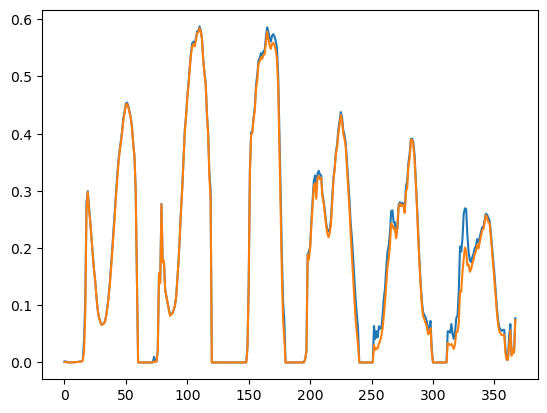

In [ ]:
# %%

import matplotlib.pyplot as plt

plt.plot(r2_base_lst)
plt.plot(r2_gb_lst)

In [ ]:
# %%

np.mean(r2_base_lst)

0.18486999385348832

In [ ]:
# %%

np.mean(r2_gb_lst)

0.17729001211753942

In [ ]:
# %%

# 0.7877
0.886 / (0.7877 / 0.78298)

0.88069097372096

In [ ]:
# %%

(1.0 - 0.00477 - np.mean(r2_gb_lst) / 0.8806)

0.7939013466755174

In [ ]:
# %%

(1.0 - np.mean(r2_gb_lst) / 0.8806)

0.7986713466755173

In [ ]:
# %%

1 - np.mean(r2_base_lst) / 0.8806

0.7900635999846828

In [ ]:
# %%

# Add average preds
preds_gbm = np.stack(preds_model, axis=1)

In [ ]:
# %%

test_av = np.stack(all_test, axis=0).mean(axis=0)
preds_final = preds_gbm + test_av

In [ ]:
# %%

torch.save(preds_final, "sub3.pt")